In [159]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as s
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
#optimum parameter choosing 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
import pickle
import os 
import warnings
warnings.filterwarnings('ignore')


In [11]:
os.chdir ('C:\\Users\\PRANAV BHANDAWAT\\Acmegrade-march-25\\Mar 25 ML Day 19 Projects\\PRJ Cancer Prediction\\')
df = pd.read_csv('data.csv')
display (df)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [9]:
display (data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
display (df.shape)

(569, 32)

In [ ]:
#Preprocessing 

In [13]:
display (df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
df['diagnosis'] = df['diagnosis']. astype('category')
print (df.dtypes)


id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

In [123]:
df['diagnosis'] = df['diagnosis'].cat.codes
print ('********')
print(df.dtypes)


********
id                           int64
diagnosis                     int8
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_w

In [22]:
x= df.drop ('diagnosis',axis =1).drop('id',axis =1)
display (x)


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [23]:
y = df['diagnosis']
display (y)


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int8

In [124]:
#Set 1

In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
pd.DataFrame(x_train)


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
68            0.14130         0.31300              0.04375         0.2111   
181           0.28320         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2743   
..                ...             ...                  ...            ...   
71            0.15310         0.08606              0.02872         0.1902   
106           0.10170         0.07070              0.03485         0.1801   
270           0.02675         0.00725              0.00625         0.1508   
435           0.11330         0.11260              0.06463         0.1669   
102           0.04038         0.02383              0.01770         0.1739   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
68                  0.08046  ...        10.310          22.65   
181                 0.07398  ...        26.680          33.48   
63                  0.06963  ...        10.010          19.23   
248                 0.06329  ...        12.250          35.19   
60                  0.06960  ...        11.020          17.45   
..                      ...  ...           ...            ...   
71                  0.08980  ...         9.733          15.67   
106                 0.06520  ...        13.140          29.26   
270                 0.05376  ...        14.910          20.65   
435                 0.06544  ...        17.040          30.80   
102                 0.05677  ...        13.340          32.84   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
68             65.50       324.7           0.14820            0.43650   
181           176.50      2089.0           0.14910            0.75840   
63             65.59       310.1           0.09836            0.16780   
248            77.98       455.7           0.14990            0.13980   
60             69.86       368.6           0.12750            0.09866   
..               ...         ...               ...                ...   
71             62.56       284.4           0.12070            0.24360   
106            85.51       521.7           0.16880            0.26600   
270            94.44       684.6           0.08567            0.05036   
435           113.90       869.3           0.16130            0.35680   
102            84.58       547.8           0.11230            0.08862   

     concavity_worst  concave points_worst  symmetry_worst  \
68           1.25200               0.17500          0.4228   
181          0.67800               0.29030          0.4098   
63           0.13970               0.05087          0.3282   
248          0.11250               0.06136          0.3409   
60           0.02168               0.02579          0.3557   
..               ...                   ...             ...   
71           0.14340               0.04786         

In [40]:
col = x. columns
display (col)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [41]:
display (x.isnull().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [45]:
co_rel= x.corr() #higher the corelation value, more is the possibility to consider one of those two columns
display (co_rel)


radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

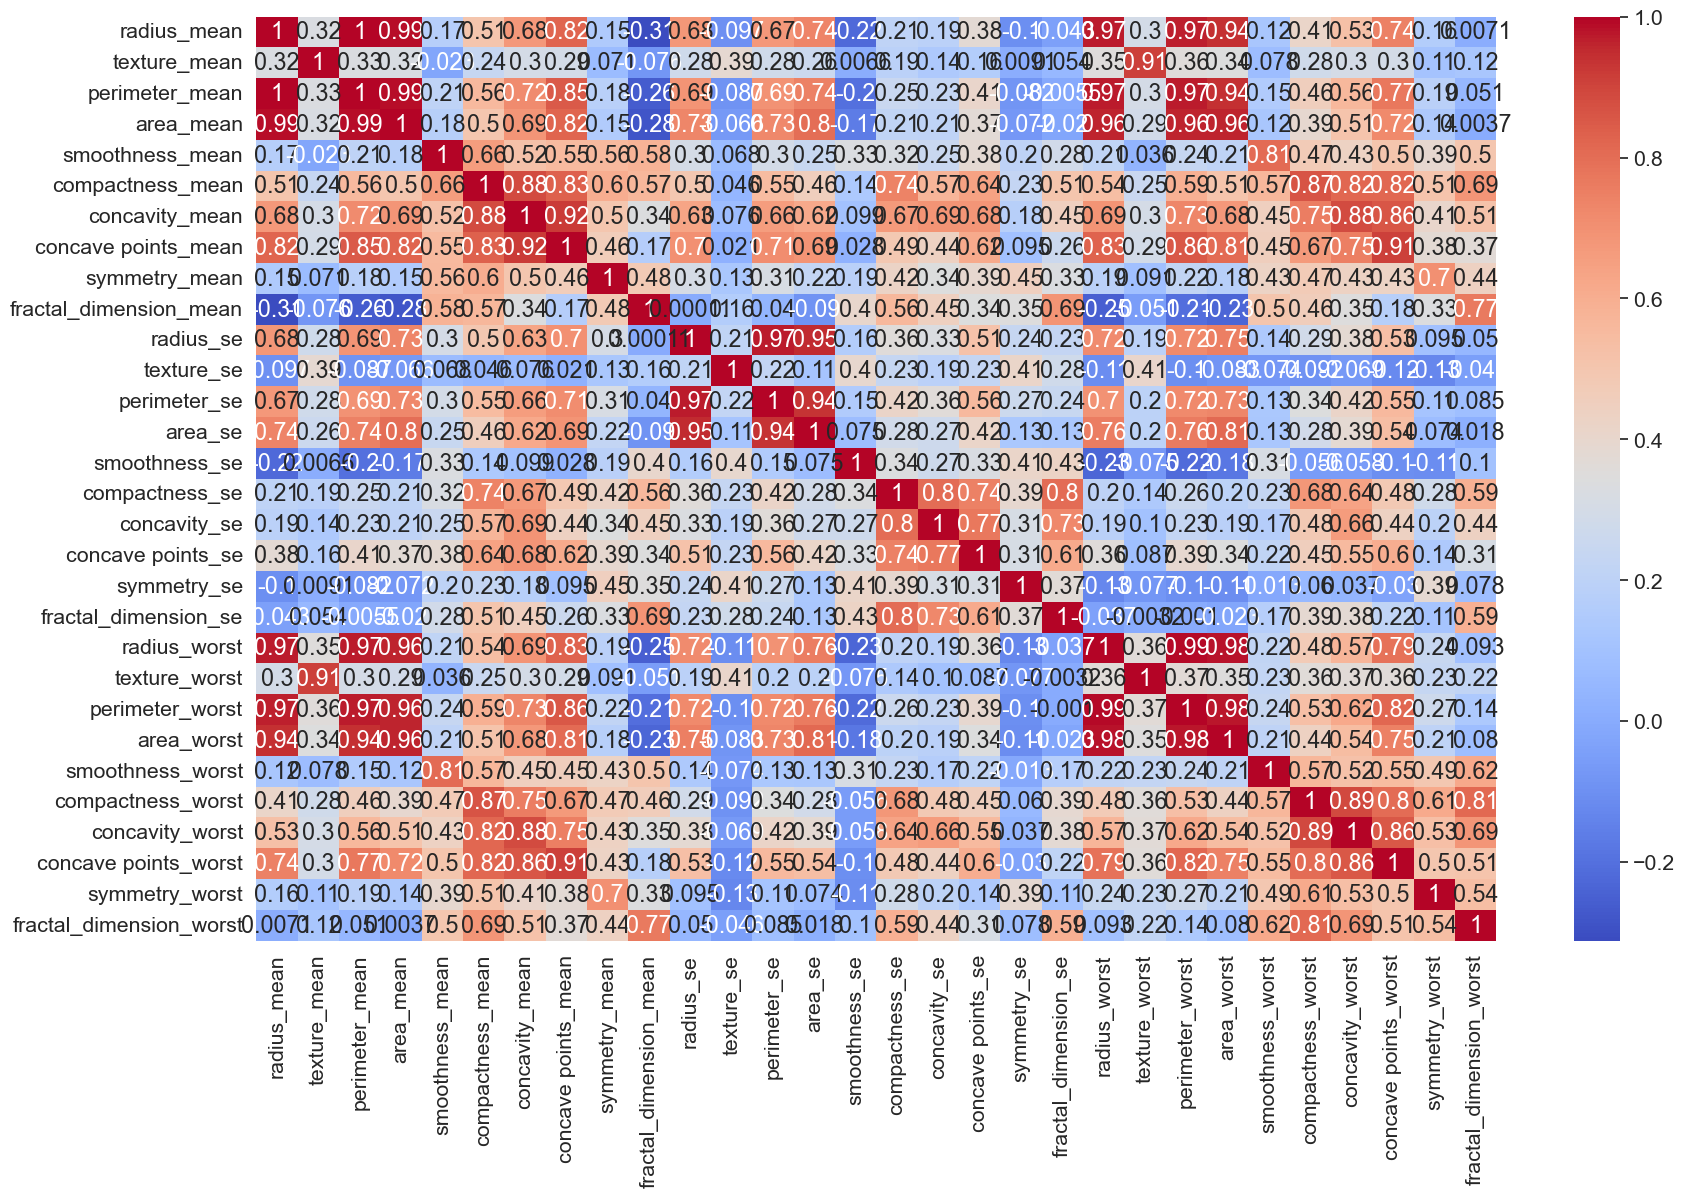

In [43]:
plt.rcParams['figure.figsize']=(20,12)
s.set(font_scale=1.4)
# In co relation 1 is the highest and -1 is lowest
s.heatmap (co_rel,cmap = 'coolwarm',annot = True)
plt.show()


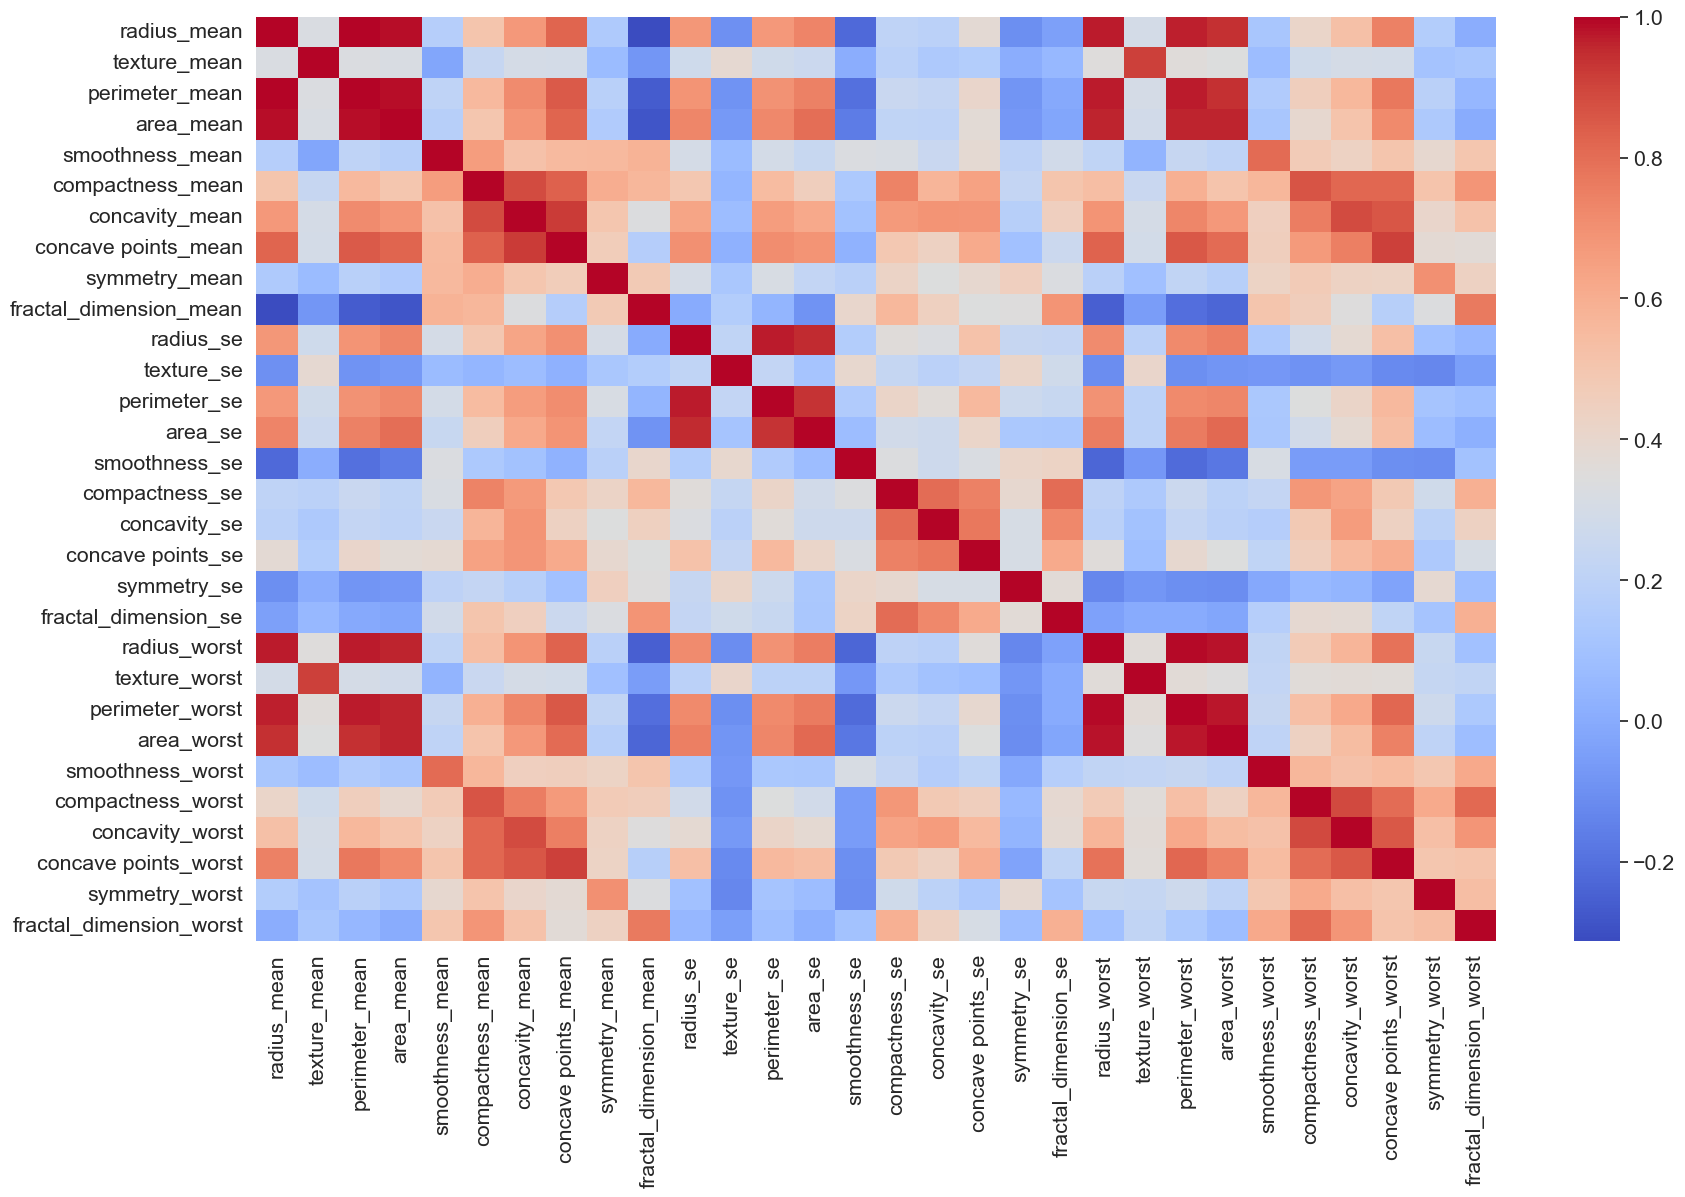

In [44]:
plt.rcParams['figure.figsize']=(20,12)
s.set(font_scale=1.4)
# In co relation 1 is the highest and -1 is lowest
s.heatmap (co_rel,cmap = 'coolwarm',annot = None)
plt.show()


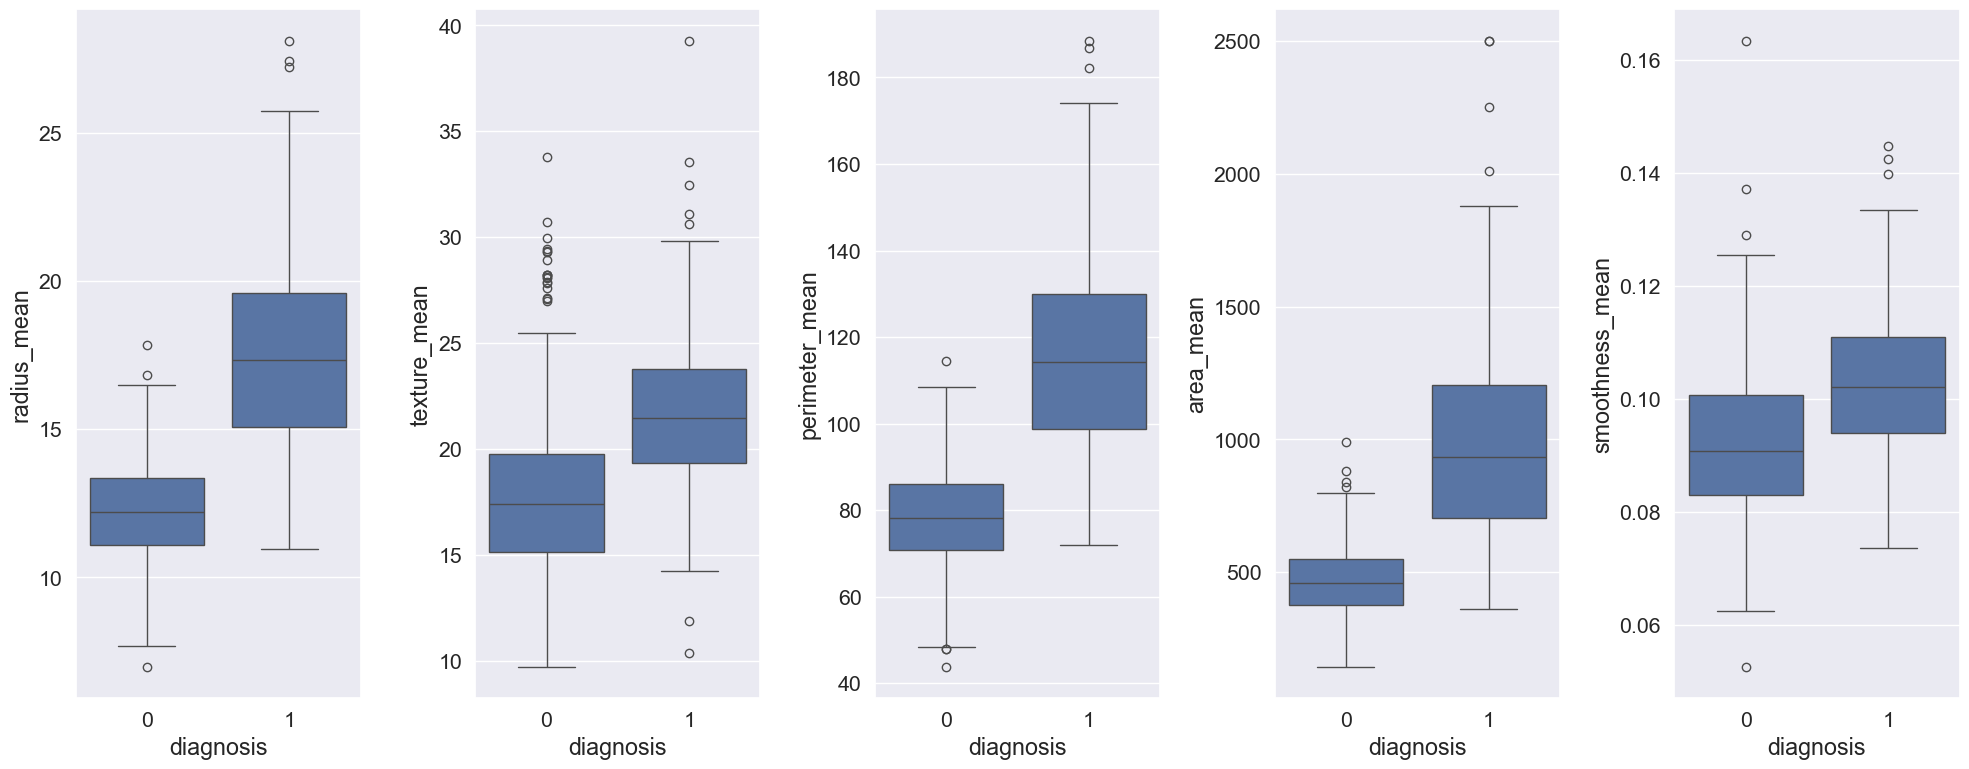

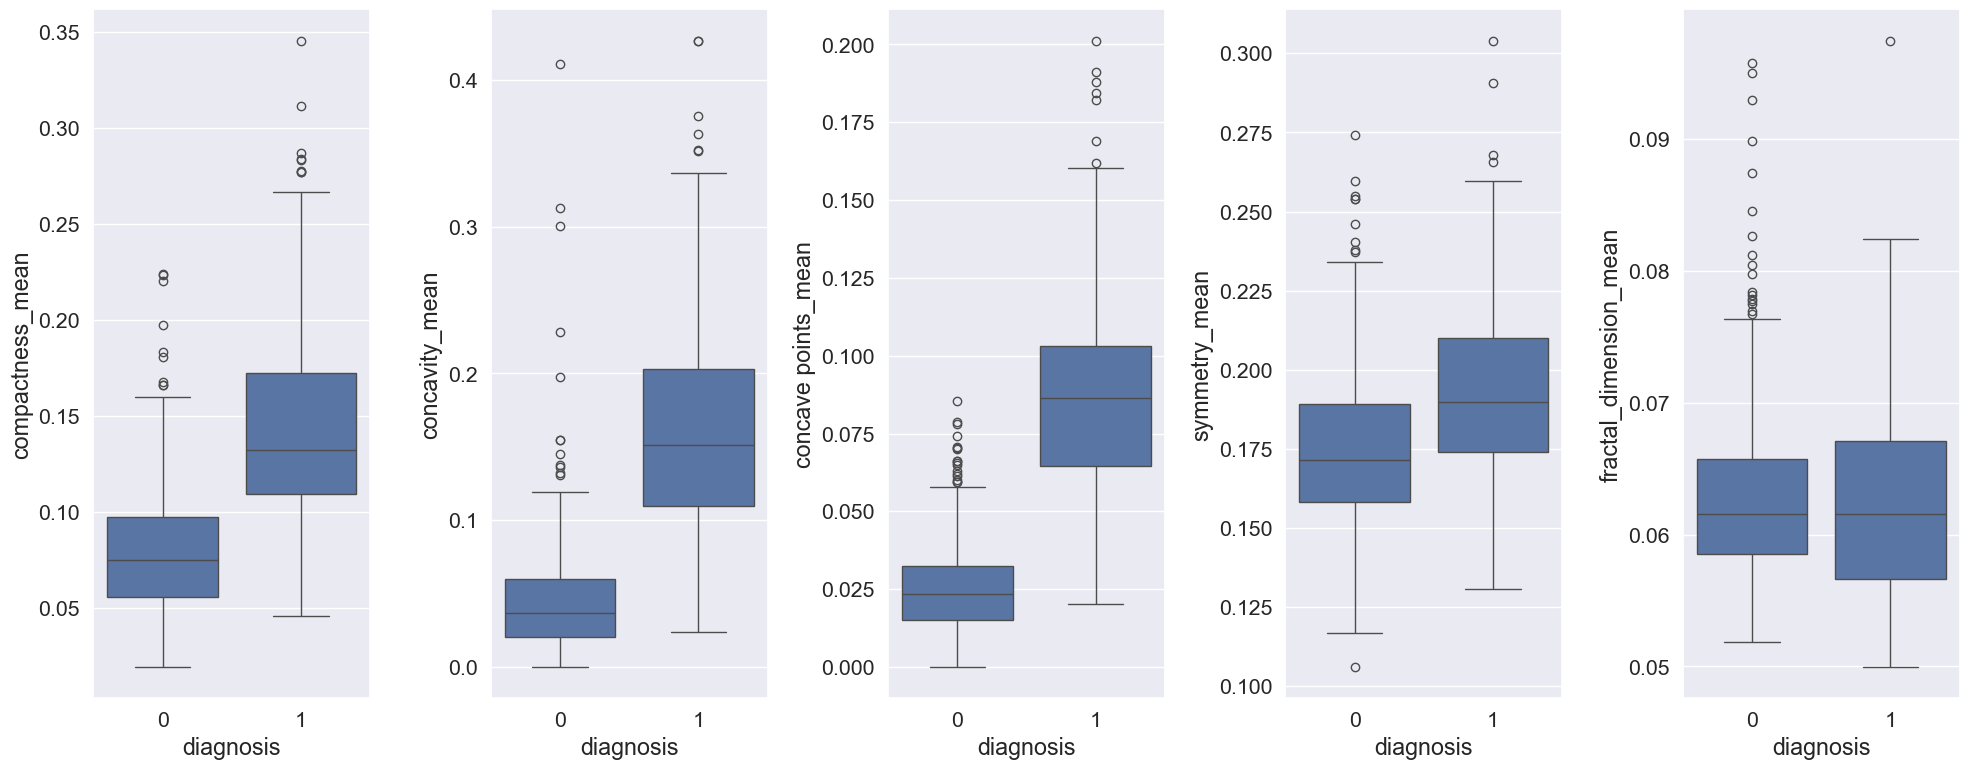

In [46]:
plt.rcParams['figure.figsize']=(20,8)
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot ( x= df['diagnosis'], y = df['radius_mean'], ax = ax1)
s.boxplot (x= df['diagnosis'], y = df['texture_mean'], ax = ax2)
s.boxplot (x= df['diagnosis'], y = df['perimeter_mean'], ax = ax3)
s.boxplot (x= df['diagnosis'], y = df['area_mean'] , ax = ax4)
s.boxplot (x= df['diagnosis'], y = df['smoothness_mean']  , ax = ax5)
f .tight_layout()

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot (x= df['diagnosis'], y = df['compactness_mean'], ax = ax1)
s.boxplot (x= df['diagnosis'], y = df['concavity_mean'] , ax = ax2)
s.boxplot (x= df['diagnosis'], y = df['concave points_mean'] , ax = ax3)
s.boxplot (x= df['diagnosis'], y = df['symmetry_mean'], ax = ax4)
s.boxplot (x= df['diagnosis'], y = df['fractal_dimension_mean'] , ax = ax5)
f .tight_layout()
plt.show()


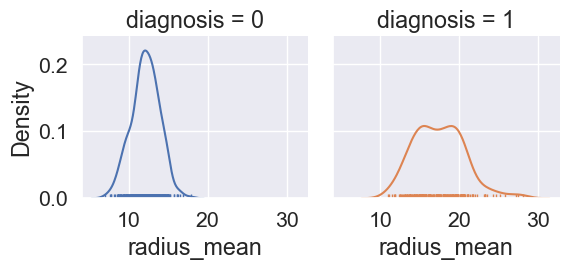

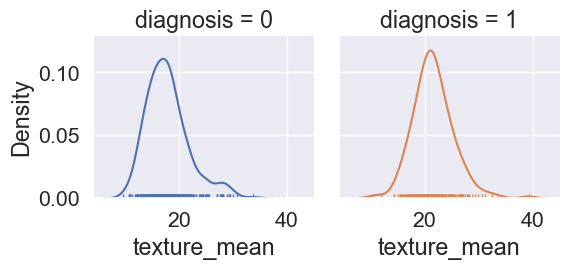

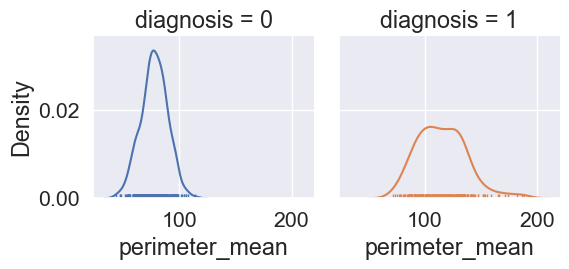

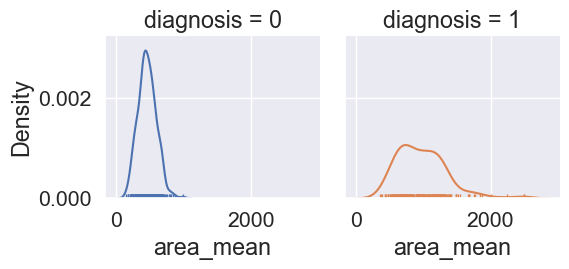

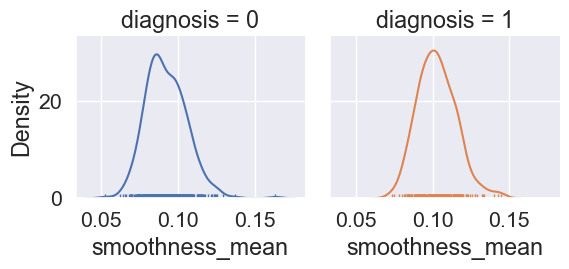

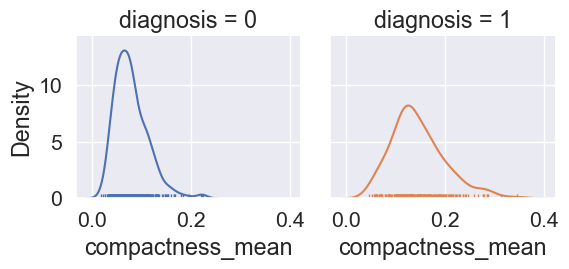

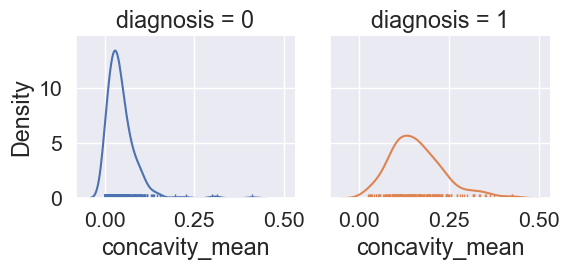

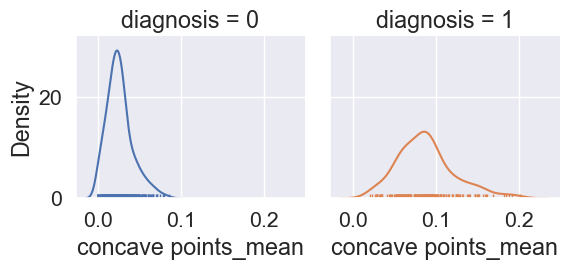

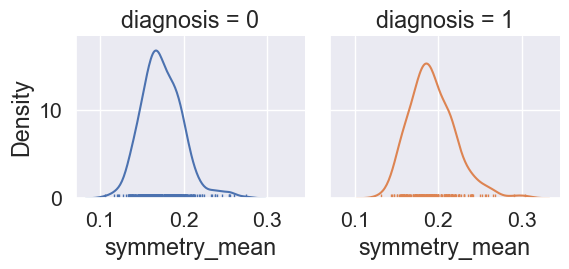

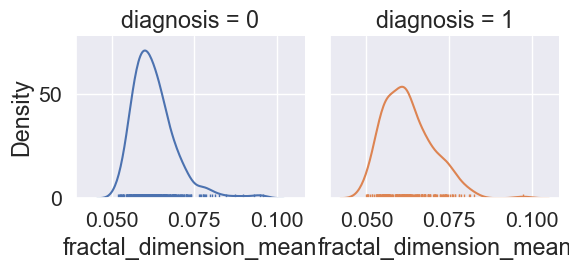

In [47]:
g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "radius_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, 'texture_mean', hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, 'perimeter_mean', hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "area_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "smoothness_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "compactness_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "concavity_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "concave points_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "symmetry_mean", hist = False, rug = True)

g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (s.distplot, "fractal_dimension_mean", hist = False, rug = True)
plt.show()



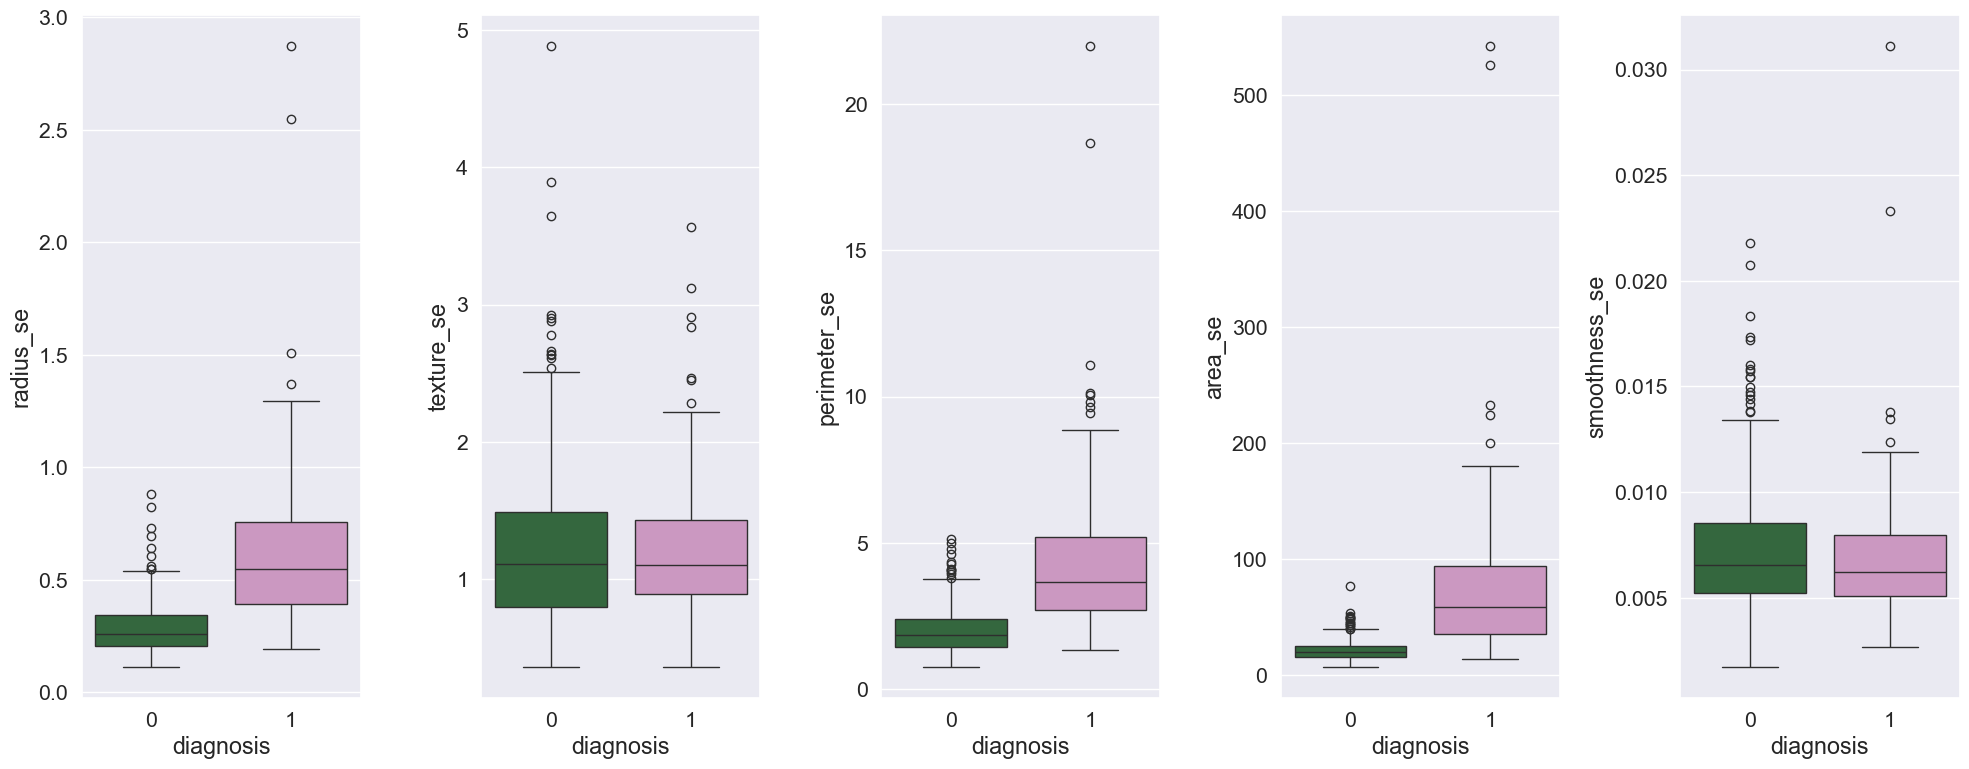

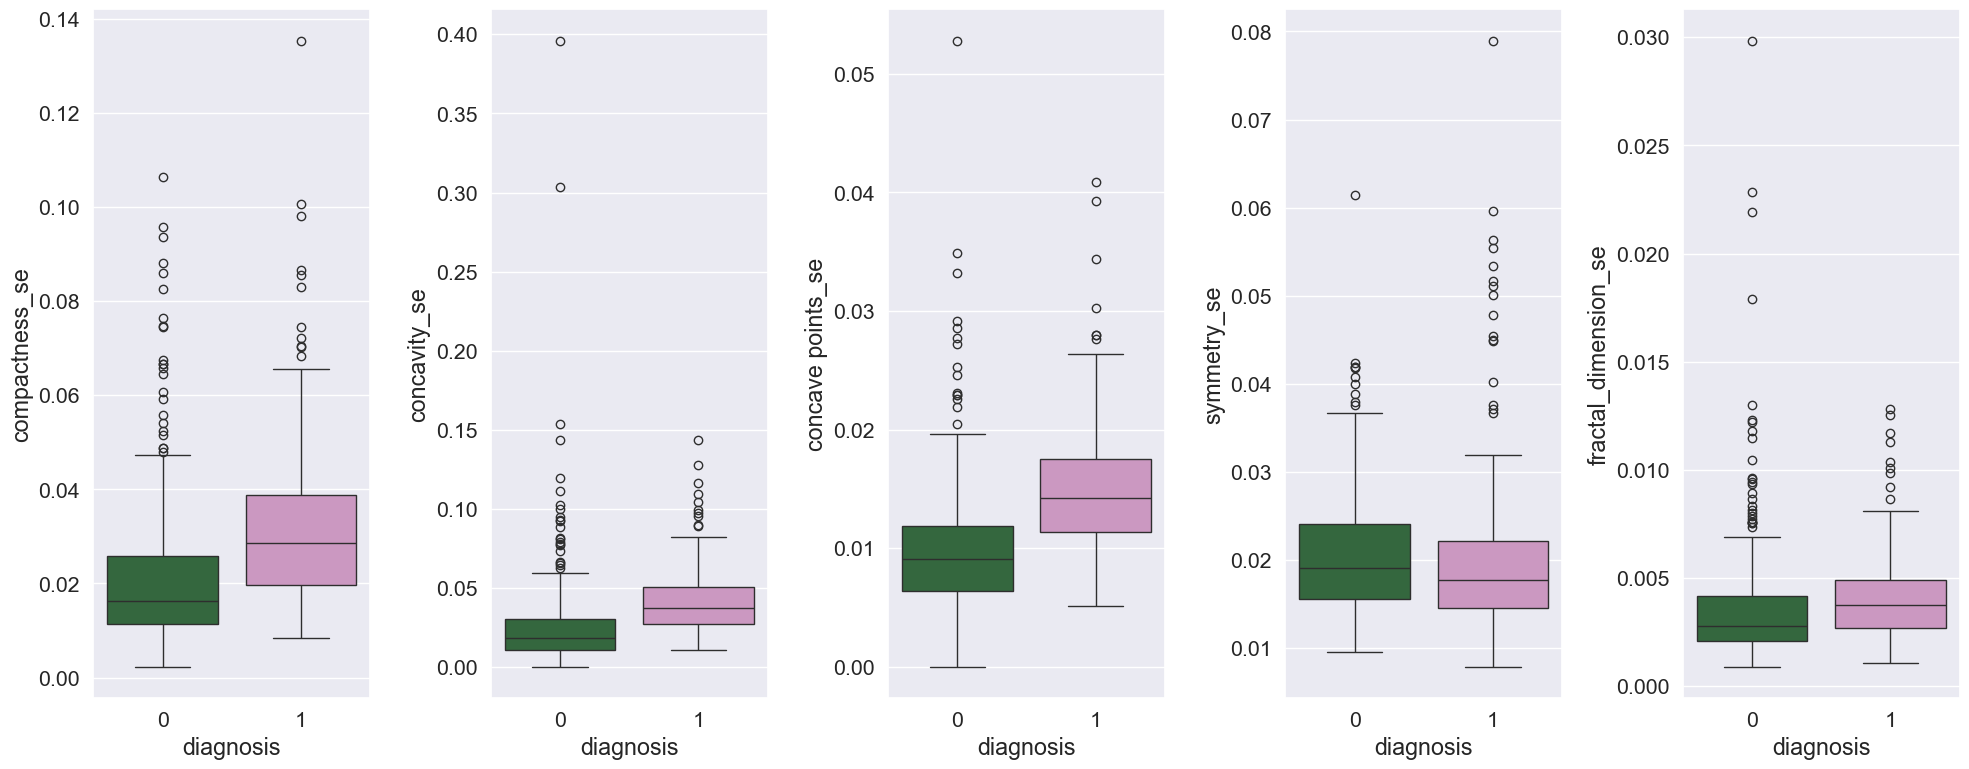

In [48]:
plt.rcParams['figure.figsize']=(20,8)
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot (x= df['diagnosis'], y = df['radius_se'], ax = ax1,palette = 'cubehelix')
s.boxplot (x= df['diagnosis'], y = df['texture_se'], ax = ax2,palette = 'cubehelix')
s.boxplot (x= df['diagnosis'], y = df['perimeter_se'] , ax = ax3,palette = 'cubehelix')
s.boxplot (x= df['diagnosis'], y = df['area_se'], ax = ax4,palette = 'cubehelix')
s.boxplot (x= df['diagnosis'], y = df['smoothness_se'], ax = ax5,palette = 'cubehelix')
f .tight_layout()

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot (x= df['diagnosis'], y = df['compactness_se'], ax = ax1,palette = 'cubehelix')
s.boxplot (x= df['diagnosis'], y = df['concavity_se'], ax = ax2,palette = 'cubehelix')
s.boxplot (x= df['diagnosis'], y = df['concave points_se'],  ax = ax3,palette = 'cubehelix')
s.boxplot (x= df['diagnosis'], y = df['symmetry_se'], ax = ax4,palette = 'cubehelix')
s.boxplot (x= df['diagnosis'], y = df['fractal_dimension_se'], ax = ax5,palette = 'cubehelix')
f .tight_layout()
plt.show()



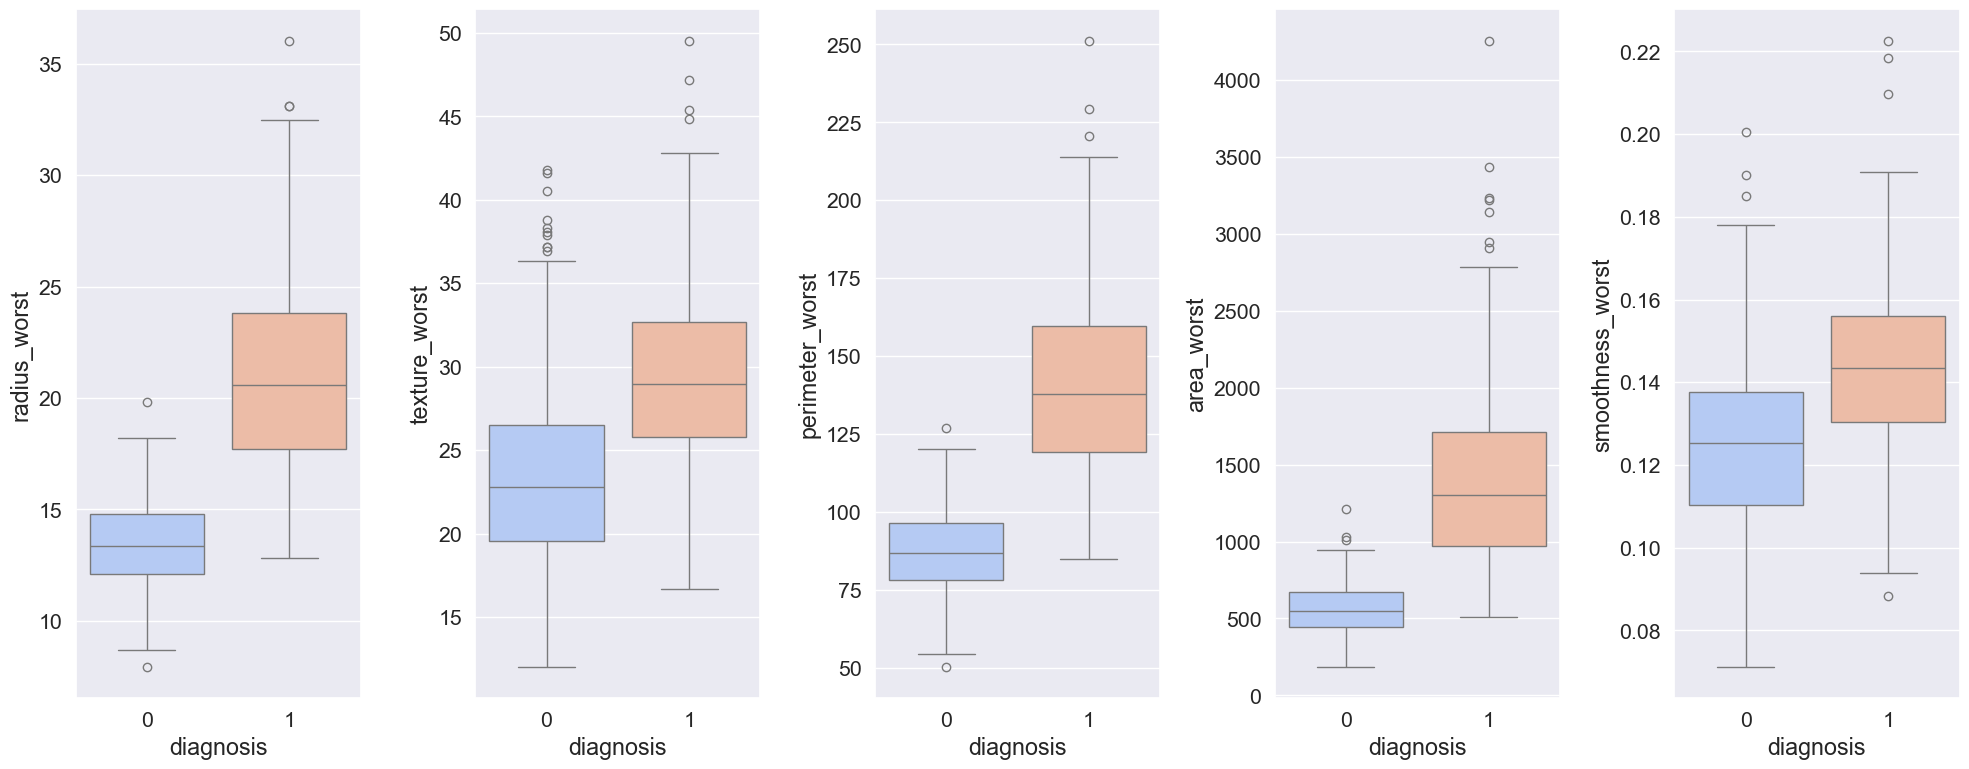

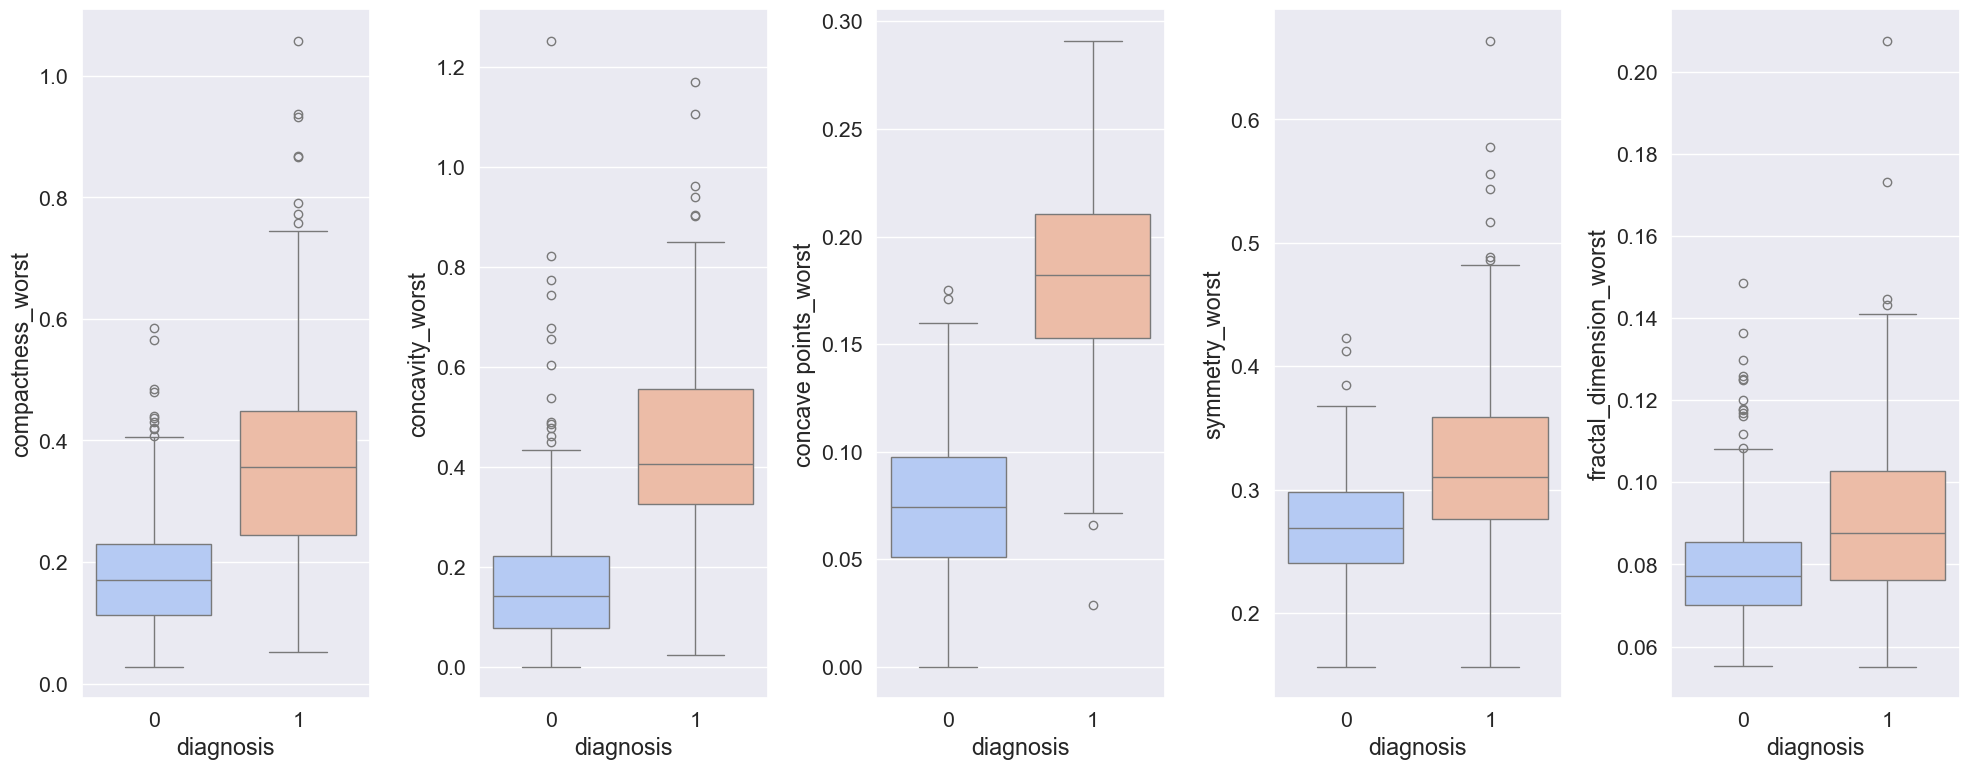

In [49]:
plt.rcParams['figure.figsize']=(20,8)
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot (x= df['diagnosis'], y = df['radius_worst'], ax = ax1,palette = 'coolwarm')
s.boxplot (x= df['diagnosis'], y = df['texture_worst'], ax = ax2,palette = 'coolwarm')
s.boxplot (x= df['diagnosis'], y = df['perimeter_worst'], ax = ax3,palette = 'coolwarm')
s.boxplot (x= df['diagnosis'], y = df['area_worst'], ax = ax4,palette = 'coolwarm')
s.boxplot (x= df['diagnosis'], y = df['smoothness_worst'], ax = ax5,palette = 'coolwarm')
f .tight_layout()

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot (x= df['diagnosis'], y = df['compactness_worst'], ax = ax1,palette = 'coolwarm')
s.boxplot (x= df['diagnosis'], y = df['concavity_worst'] , ax = ax2,palette = 'coolwarm')
s.boxplot (x= df['diagnosis'], y = df['concave points_worst'], ax = ax3,palette = 'coolwarm')
s.boxplot (x= df['diagnosis'], y = df['symmetry_worst'], ax = ax4,palette = 'coolwarm')
s.boxplot (x= df['diagnosis'], y = df['fractal_dimension_worst'], ax = ax5,palette = 'coolwarm')
f .tight_layout()
plt.show()


In [50]:
def FitModel (X,Y, algo_name , algorithm, gridSearchParams, cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size = 0.2)
    
    # Find the Parameters , then choose best parameters 

    grid = GridSearchCV(estimator = algorithm, param_grid = gridSearchParams,
                        cv = cv, scoring = 'accuracy', verbose = 1 , n_jobs = -1 )
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict (x_test)
    cm = confusion_matrix (y_test,pred)
    
    print (pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
    
    print ('Best Params :', best_params)
    print ('Classification Report:',classification_report(y_test,pred))
    print ('Accuracy Score', (accuracy_score(y_test,pred)))
    print ('Confusion Matrix :\n',cm)


In [ ]:
#Set 1

In [51]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }

FitModel (x,y,'SVC',SVC(), param, cv =10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'C': 1, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.90      0.90      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Accuracy Score 0.9298245614035088
Confusion Matrix :
 [[71  4]
 [ 4 35]]


In [52]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (x,y,'Random Forest',RandomForestClassifier(), param, cv =10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'n_estimators': 2000}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score 0.9824561403508771
Confusion Matrix :
 [[73  2]
 [ 0 39]]


In [54]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (x,y,'XGBoost', XGBClassifier(),param, cv = 10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score 0.9736842105263158
Confusion Matrix :
 [[73  2]
 [ 1 38]]


In [216]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_sc = sc_x.fit_transform(x)
print (x_sc)

x_sc_train, x_sc_test, y_train, y_test = train_test_split (x_sc,y,test_size = 0.2)
x_numpyArr = df.iloc[:,2:].values
print (x_numpyArr)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


Confusion Matrix:
 [[343  14]
 [ 21 191]]
Accuracy: 0.9384885764499121
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       357
           1       0.93      0.90      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569



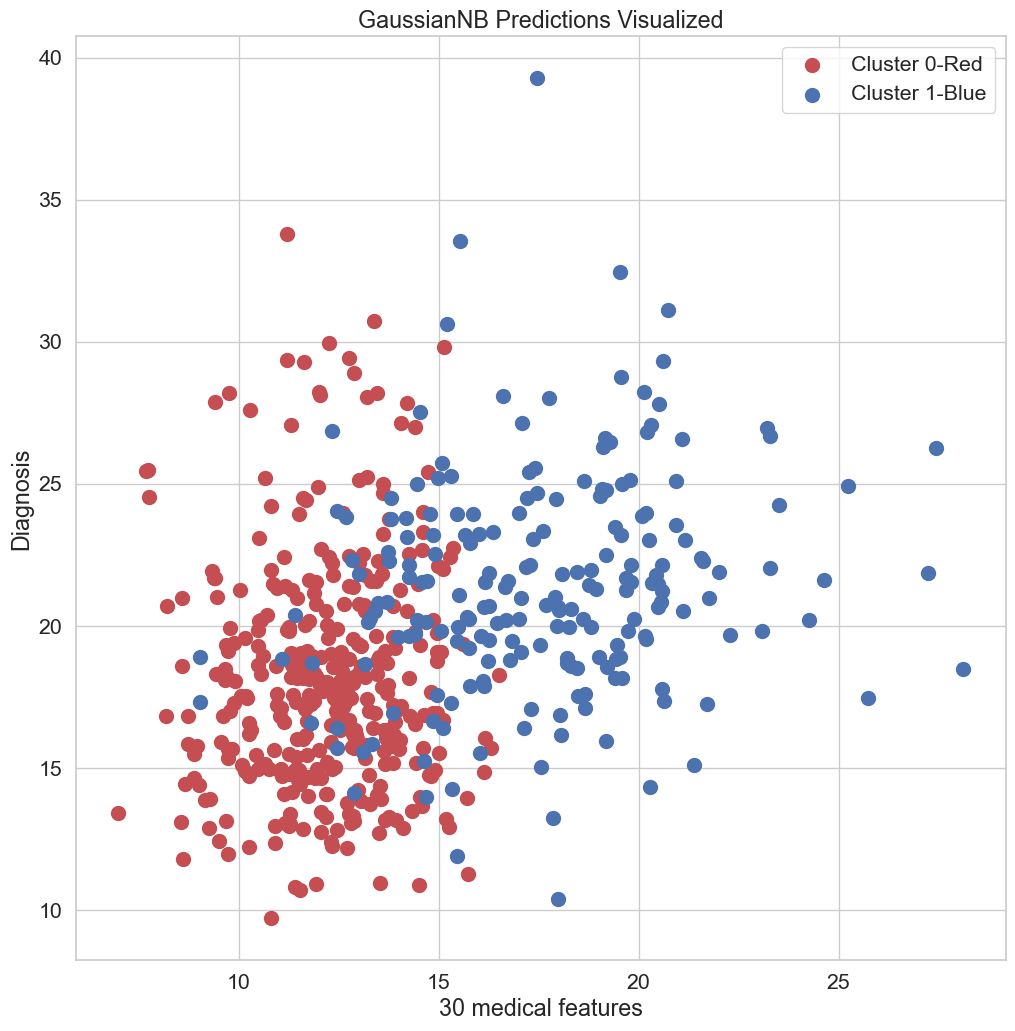

In [217]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_sc_train, y_train)
GNB_pred = GNB.predict(x_sc)
print("Confusion Matrix:\n", confusion_matrix(y, GNB_pred))
print("Accuracy:", accuracy_score(y, GNB_pred))
print("Classification Report:\n", classification_report(y, GNB_pred, zero_division=0))
plt.scatter(x_numpyArr[GNB_pred == 0, 0], x_numpyArr[GNB_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(x_numpyArr[GNB_pred == 1, 0], x_numpyArr[GNB_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("GaussianNB Predictions Visualized")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()


Confusion Matrix:
 [[337  20]
 [ 16 196]]
Accuracy: 0.9367311072056239
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       357
           1       0.91      0.92      0.92       212

    accuracy                           0.94       569
   macro avg       0.93      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569



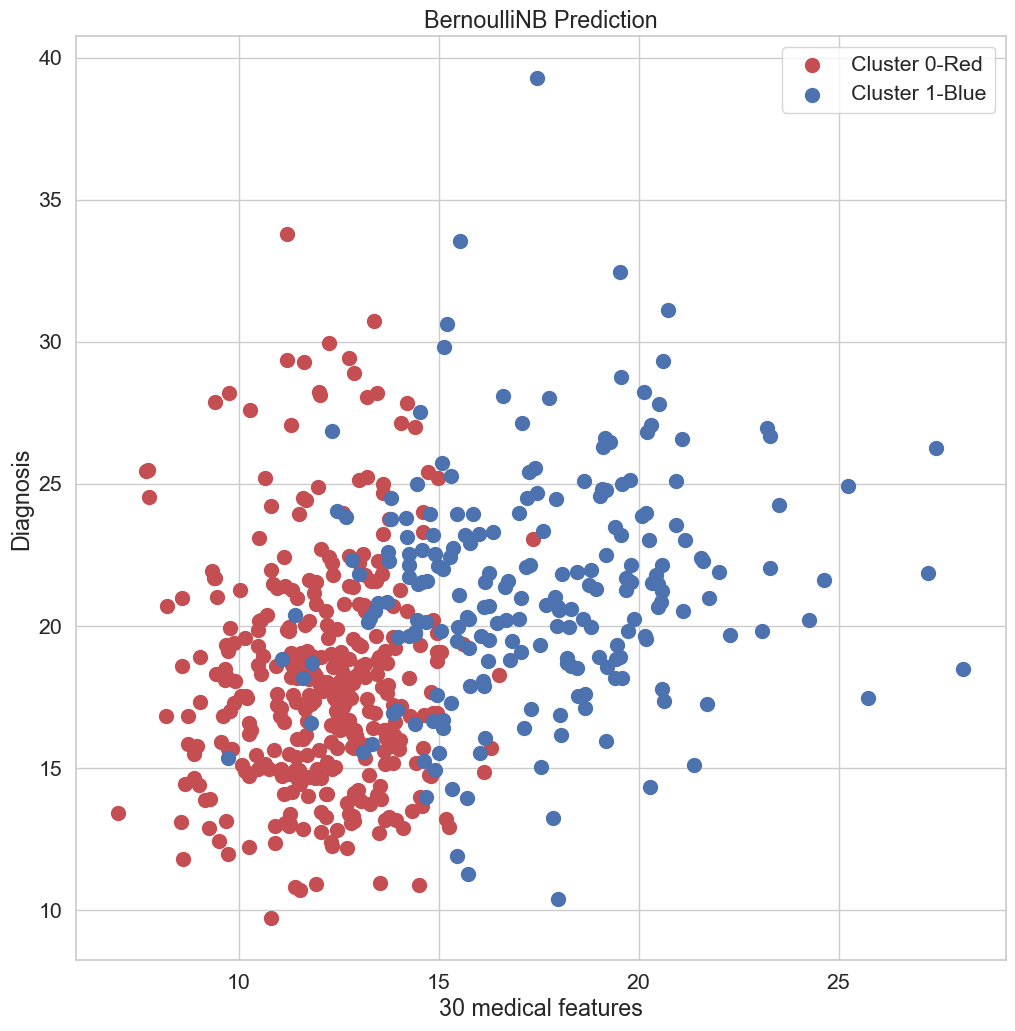

In [218]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(x_sc_train, y_train) 
BNB_pred = BNB.predict(x_sc)
print("Confusion Matrix:\n", confusion_matrix(y, BNB_pred))
print("Accuracy:", accuracy_score(y, BNB_pred))
print("Classification Report:\n", classification_report(y, BNB_pred, zero_division=0))
plt.scatter(x_numpyArr[BNB_pred == 0, 0], x_numpyArr[BNB_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(x_numpyArr[BNB_pred == 1, 0], x_numpyArr[BNB_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("BernoulliNB Prediction")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()


In [219]:
from sklearn.preprocessing import MinMaxScaler
minmax_x= MinMaxScaler()
minmax_x = minmax_x.fit_transform(x_sc)
print (minmax_x)

x_sc_minmax_train, x_sc_minmax_test, y_train, y_test = train_test_split (minmax_x,y,test_size = 0.2)


[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


MultinomialNB()
Confusion Matrix:
 [[356   1]
 [ 95 117]]
Accuracy: 0.8312829525483304
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       357
           1       0.99      0.55      0.71       212

    accuracy                           0.83       569
   macro avg       0.89      0.77      0.80       569
weighted avg       0.86      0.83      0.82       569



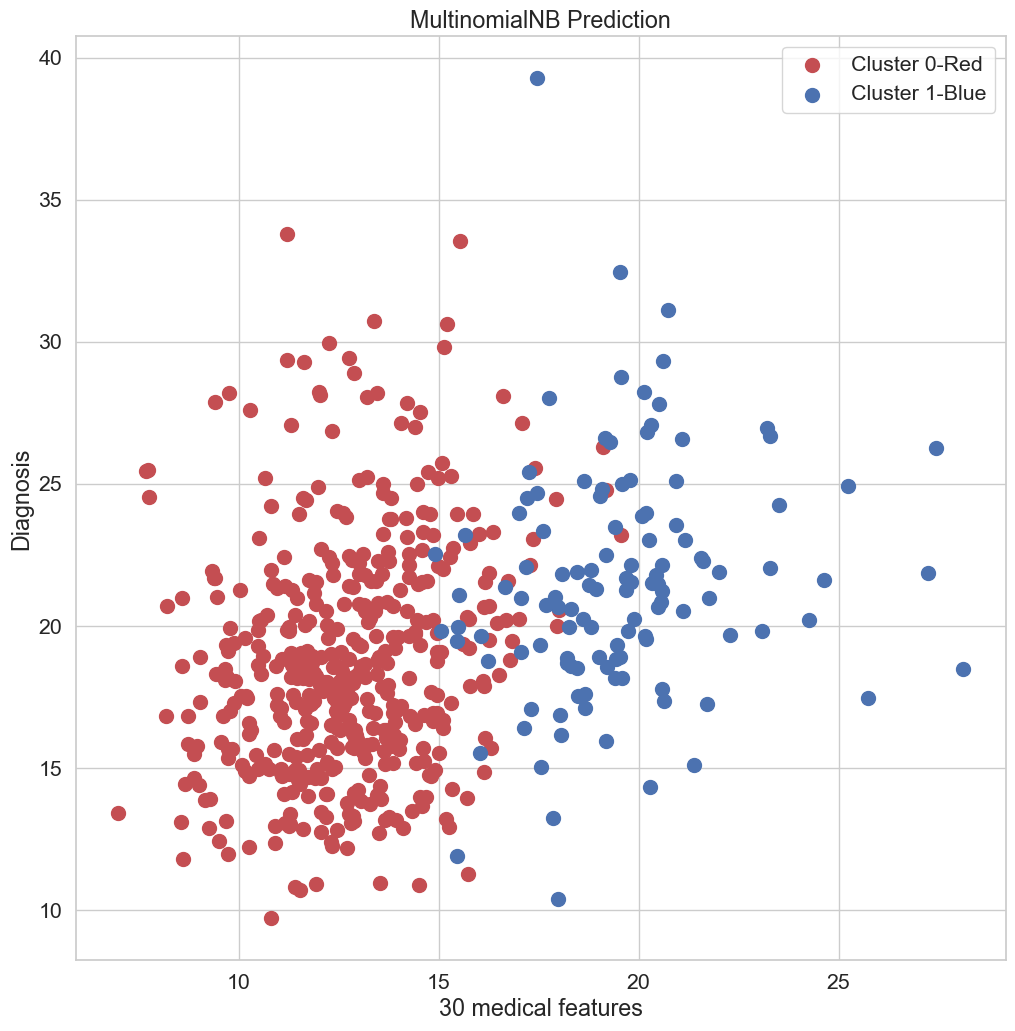

In [220]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(x_sc_minmax_train, y_train) 
print (MNB)
MNB_pred = MNB.predict(minmax_x)
print("Confusion Matrix:\n", confusion_matrix(y, MNB_pred))
print("Accuracy:", accuracy_score(y, MNB_pred))
print("Classification Report:\n", classification_report(y, MNB_pred, zero_division=0))
plt.scatter(x_numpyArr[MNB_pred == 0, 0], x_numpyArr[MNB_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(x_numpyArr[MNB_pred == 1, 0], x_numpyArr[MNB_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("MultinomialNB Prediction")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()

ComplementNB()
[1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0
 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0
 1 0 0 1 0

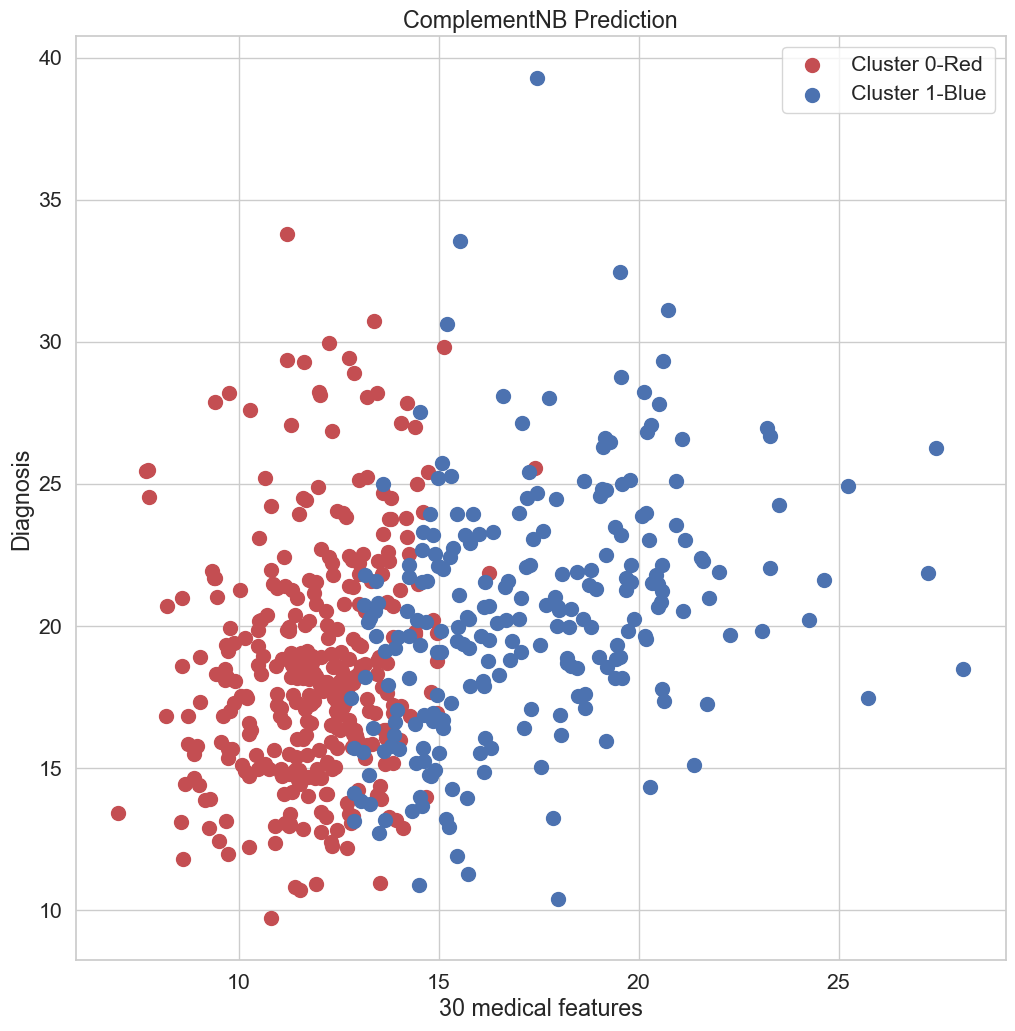

In [221]:
from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()
CNB.fit(x_sc_minmax_train,y_train)
print (CNB)
CNB_pred= CNB.predict(minmax_x)
print (CNB_pred)
print("Confusion Matrix:\n", confusion_matrix(y, CNB_pred))
print("Accuracy:", accuracy_score(y, CNB_pred))
print("Classification Report:\n", classification_report(y, CNB_pred, zero_division=0))
plt.scatter(x_numpyArr[CNB_pred == 0, 0], x_numpyArr[CNB_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(x_numpyArr[CNB_pred == 1, 0], x_numpyArr[CNB_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("ComplementNB Prediction")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()

CategoricalNB()
Confusion Matrix:
 [[357   0]
 [199  13]]
Accuracy: 0.6502636203866432
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       357
           1       1.00      0.06      0.12       212

    accuracy                           0.65       569
   macro avg       0.82      0.53      0.45       569
weighted avg       0.78      0.65      0.53       569



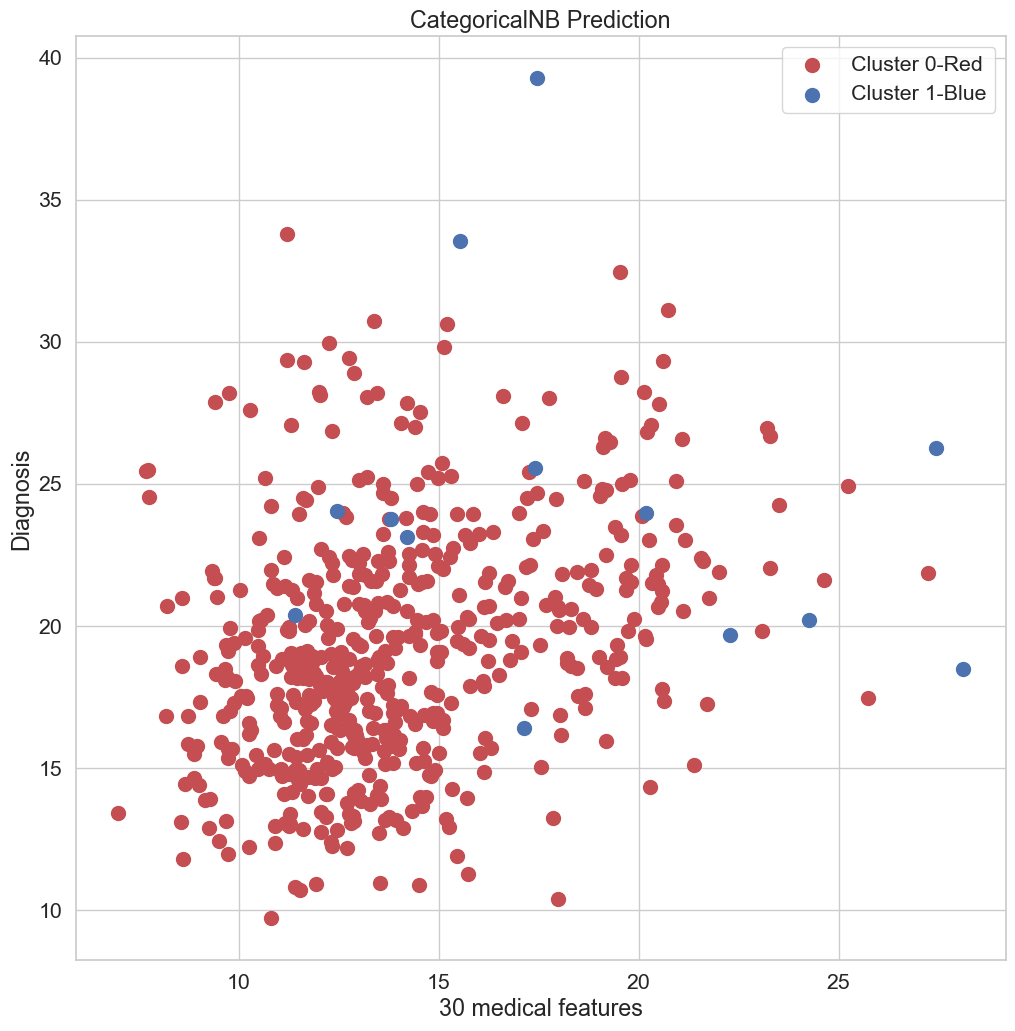

In [224]:
from sklearn.naive_bayes import CategoricalNB
CG_NB = CategoricalNB()
CG_NB.fit(minmax_x,y)
print (CG_NB)
CG_NB_pred = CG_NB.predict(minmax_x)
print("Confusion Matrix:\n", confusion_matrix(y, CG_NB_pred))
print("Accuracy:", accuracy_score(y, CG_NB_pred))
print("Classification Report:\n", classification_report(y, CG_NB_pred, zero_division=0))
plt.scatter(x_numpyArr[CG_NB_pred == 0, 0], x_numpyArr[CG_NB_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(x_numpyArr[CG_NB_pred == 1, 0], x_numpyArr[CG_NB_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("CategoricalNB Prediction")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Set 2

In [223]:
from imblearn.over_sampling import SMOTE

In [62]:
display (df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64

In [63]:
sm = SMOTE(random_state =42)
X_res, Y_res = sm.fit_resample (x, y)


In [64]:
display (Y_res.value_counts())

diagnosis
1    357
0    357
Name: count, dtype: int64

In [65]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res, Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 1000}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score 0.986013986013986
Confusion Matrix :
 [[66  2]
 [ 0 75]]


In [66]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (X_res, Y_res,'SVC',SVC(), param, cv =10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1]
Best Params : {'C': 100, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.95      0.97      0.96        75

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy Score 0.958041958041958
Confusion Matrix :
 [[64  4]
 [ 2 73]]


In [67]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res, Y_res,'XGBoost', XGBClassifier(),param, cv = 10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score 0.986013986013986
Confusion Matrix :
 [[66  2]
 [ 0 75]]


In [226]:
# Standard Scaling
X_res_sc = sc_x.fit_transform(X_res)
print (X_res_sc)


[[ 0.87910647 -2.23946858  1.04411586 ...  2.10218683  2.61981628
   1.93006086]
 [ 1.58648119 -0.46163572  1.44565184 ...  0.89778852 -0.33363075
   0.23574944]
 [ 1.34520609  0.37555756  1.33035933 ...  1.76240695  1.04336805
   0.15409588]
 ...
 [ 1.1505971   0.24875665  1.04173255 ...  0.22449865 -0.62232172
  -1.31568978]
 [ 0.20260073 -0.01027735  0.21298565 ...  0.36149189  0.20326971
   0.05580932]
 [-0.65652196  0.27622885 -0.68981094 ... -0.63238965 -0.7196375
  -0.4840665 ]]


In [235]:
#Train_Test_Split based on Over Sampled data
X_res_sc_train, X_res_sc_test, Y_res_train, Y_res_test = train_test_split (X_res_sc,Y_res,test_size = 0.2)
X_res_np = X_res.values

Confusion Matrix:
 [[  0 357]
 [  0 357]]
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       357
           1       0.50      1.00      0.67       357

    accuracy                           0.50       714
   macro avg       0.25      0.50      0.33       714
weighted avg       0.25      0.50      0.33       714



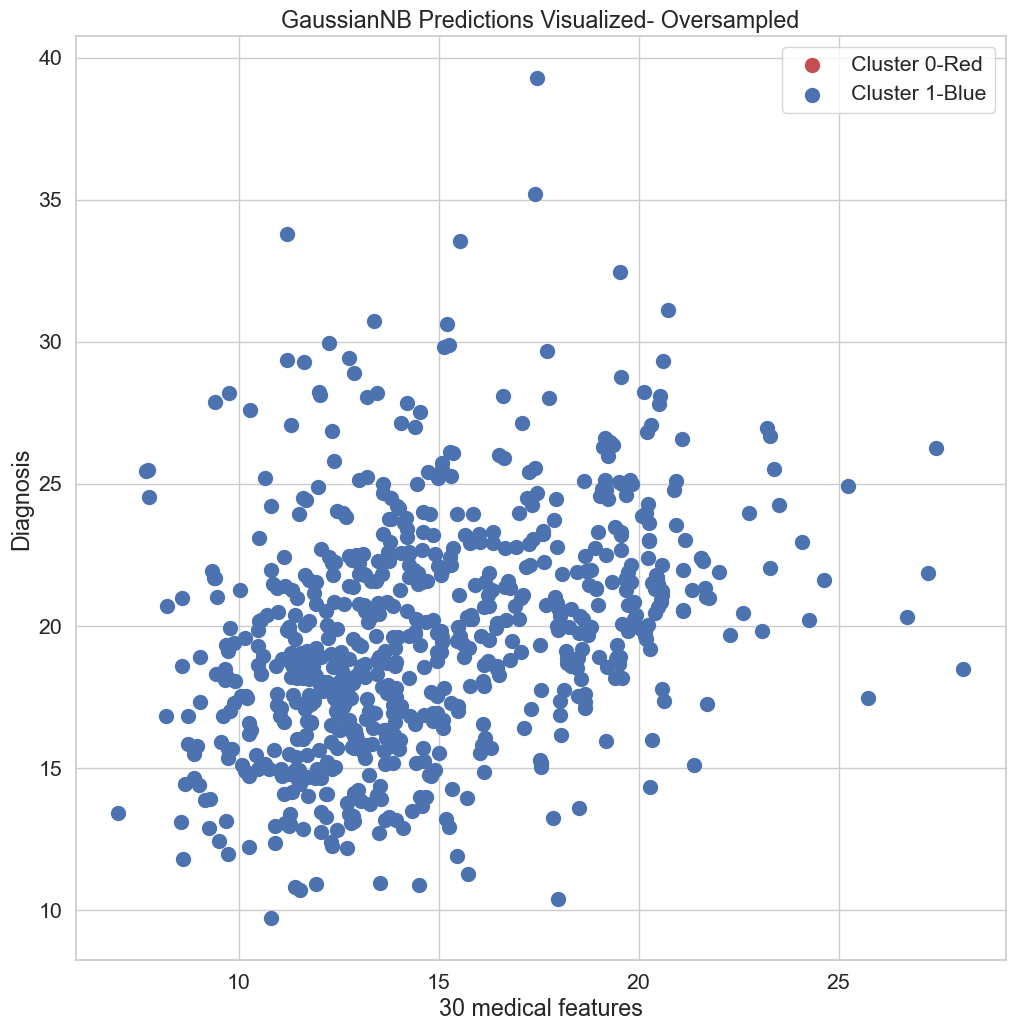

In [236]:
from sklearn.naive_bayes import GaussianNB
GNB_res = GaussianNB()
GNB_res.fit(X_res_sc_train, Y_res_train)
GNB_res_pred = GNB_res.predict(X_res)
print("Confusion Matrix:\n", confusion_matrix(Y_res, GNB_res_pred))
print("Accuracy:", accuracy_score(Y_res, GNB_res_pred))
print("Classification Report:\n", classification_report(Y_res, GNB_res_pred, zero_division=0)) 
plt.scatter(X_res_np[GNB_res_pred == 0, 0], X_res_np[GNB_res_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(X_res_np[GNB_res_pred == 1, 0], X_res_np[GNB_res_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("GaussianNB Predictions Visualized- Oversampled")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()


Confusion Matrix:
 [[  0 357]
 [  0 357]]
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       357
           1       0.50      1.00      0.67       357

    accuracy                           0.50       714
   macro avg       0.25      0.50      0.33       714
weighted avg       0.25      0.50      0.33       714



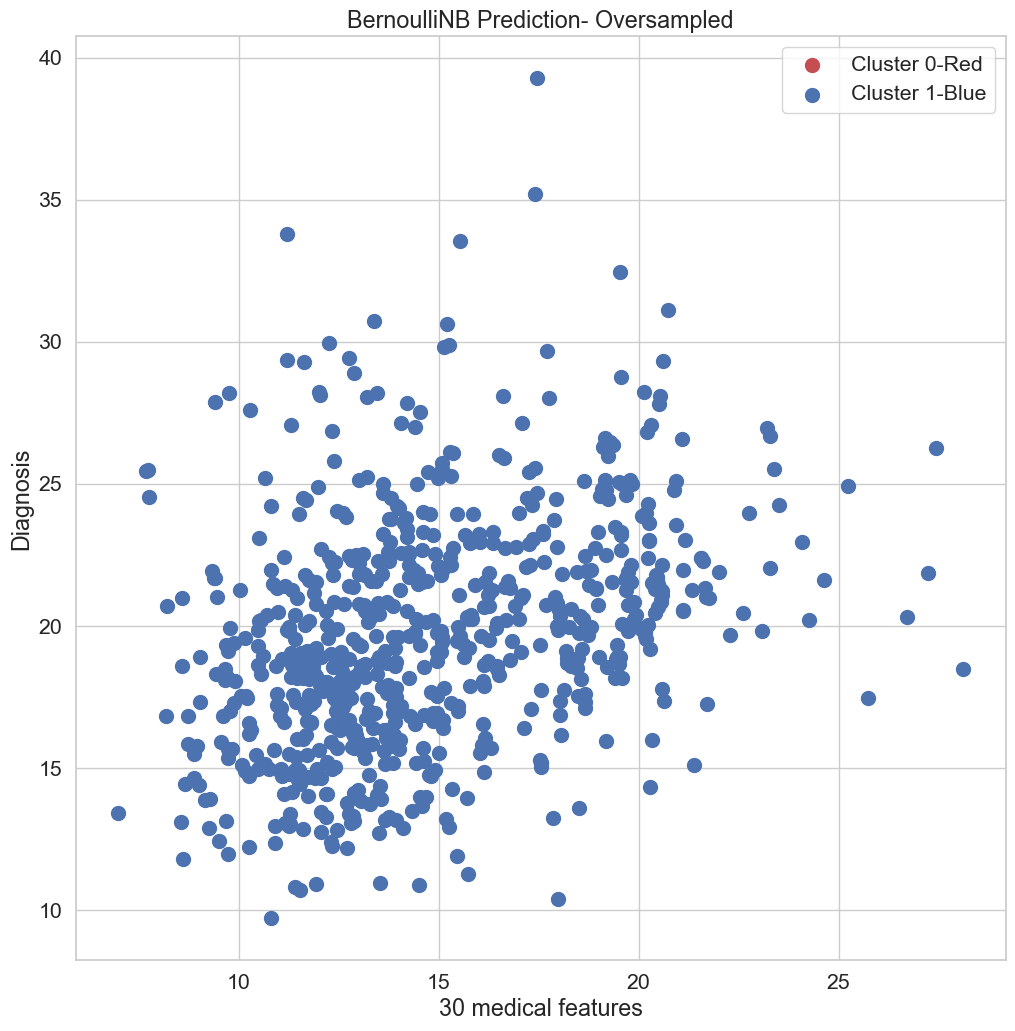

In [237]:
from sklearn.naive_bayes import BernoulliNB
BNB_res = BernoulliNB()
BNB_res.fit(X_res_sc_train, Y_res_train) 
BNB_res_pred = BNB_res.predict(X_res)
print("Confusion Matrix:\n", confusion_matrix(Y_res, BNB_res_pred))
print("Accuracy:", accuracy_score(Y_res, BNB_res_pred))
print("Classification Report:\n", classification_report(Y_res, BNB_res_pred, zero_division=0))
plt.scatter(X_res_np[BNB_res_pred == 0, 0], X_res_np[BNB_res_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(X_res_np[BNB_res_pred == 1, 0], X_res_np[BNB_res_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("BernoulliNB Prediction- Oversampled")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()



In [238]:
from sklearn.preprocessing import MinMaxScaler
minmax_res_x= MinMaxScaler()
minmax_res_x = minmax_res_x.fit_transform(X_res_sc)
print (minmax_res_x)


[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.56790216 0.3724356  0.54557426 ... 0.48664379 0.19792432 0.04341873]
 [0.40425899 0.33602239 0.40152193 ... 0.51767913 0.299919   0.20206395]
 [0.25595719 0.37629746 0.24459833 ... 0.29251874 0.18590179 0.13961497]]


In [268]:
X_res_sc_minmax_train, X_res_sc_minmax_test, Y_res_train, Y_res_test = train_test_split (minmax_res_x,Y_res,test_size = 0.2)

MultinomialNB()
Confusion Matrix:
 [[316  41]
 [ 60 297]]
Accuracy: 0.8585434173669467
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       357
           1       0.88      0.83      0.85       357

    accuracy                           0.86       714
   macro avg       0.86      0.86      0.86       714
weighted avg       0.86      0.86      0.86       714



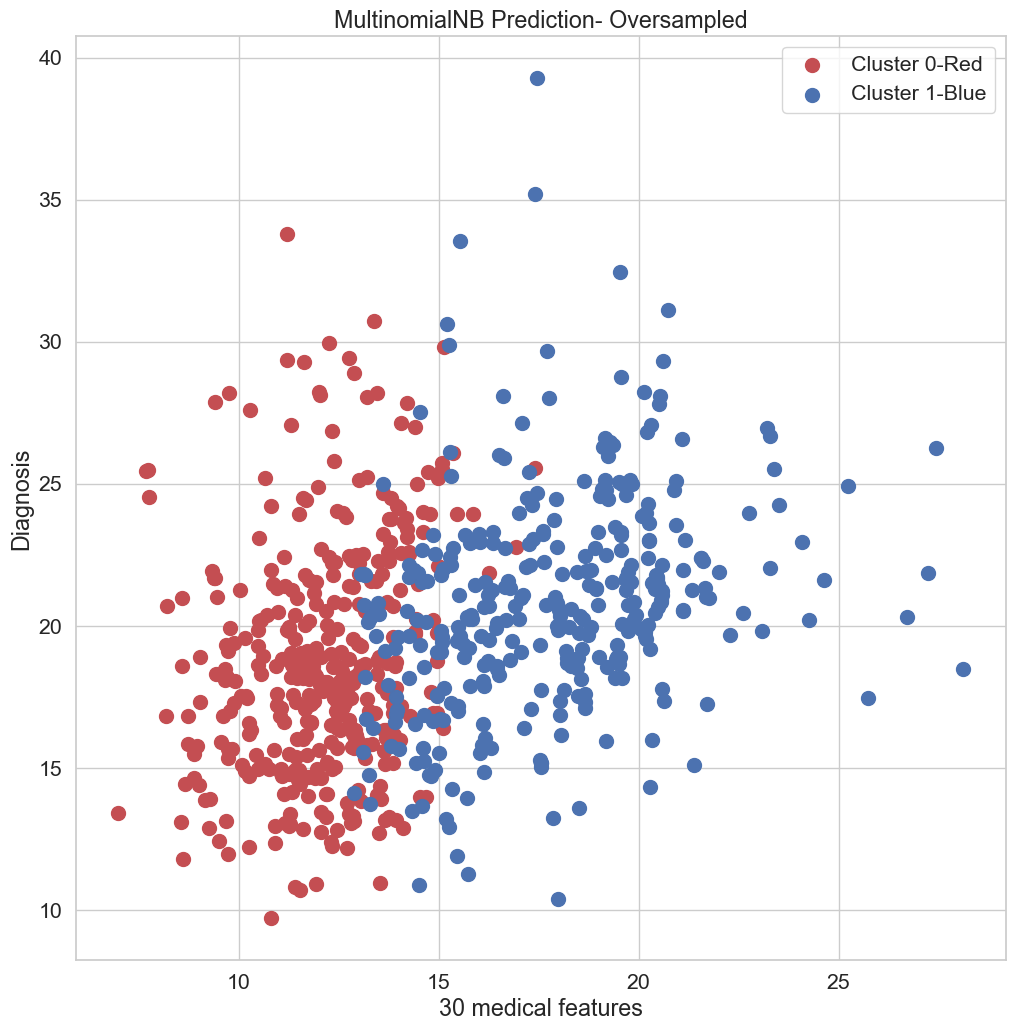

In [241]:
from sklearn.naive_bayes import MultinomialNB
MNB_res = MultinomialNB()
MNB_res.fit(X_res_sc_minmax_train, Y_res_train) 
print (MNB_res)
MNB_res_pred = MNB_res.predict(minmax_res_x)
print("Confusion Matrix:\n", confusion_matrix(Y_res, MNB_res_pred))
print("Accuracy:", accuracy_score(Y_res, MNB_res_pred))
print("Classification Report:\n", classification_report(Y_res, MNB_res_pred, zero_division=0))
plt.scatter(X_res_np[MNB_res_pred == 0, 0], X_res_np[MNB_res_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(X_res_np[MNB_res_pred == 1, 0], X_res_np[MNB_res_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("MultinomialNB Prediction- Oversampled")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()



ComplementNB()
[1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0
 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0
 1 0 0 1 0

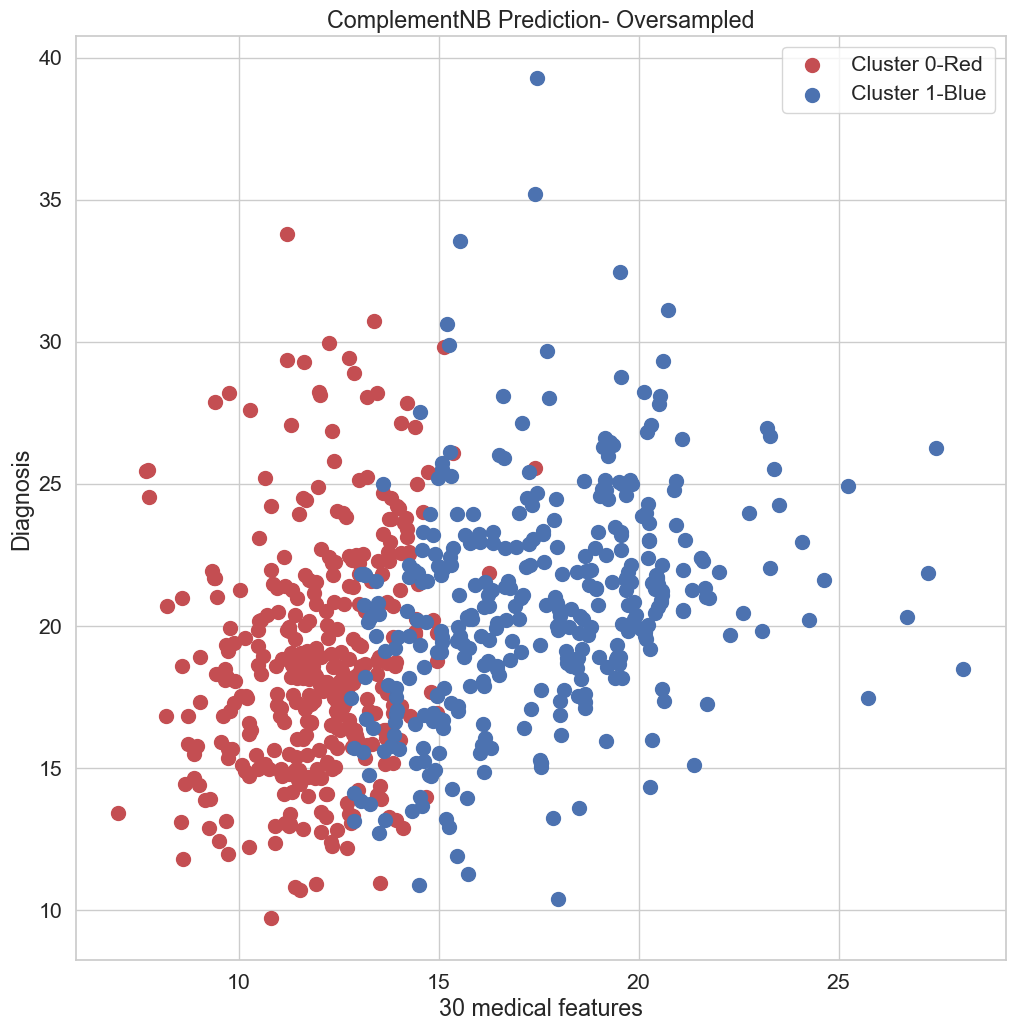

In [245]:
from sklearn.naive_bayes import ComplementNB
CNB_res = ComplementNB()
CNB_res.fit(X_res_sc_minmax_train, Y_res_train)
print (CNB_res)
CNB_res_pred= CNB.predict(minmax_res_x)
print (CNB_res_pred)
print("Confusion Matrix:\n", confusion_matrix(Y_res, CNB_res_pred))
print("Accuracy:", accuracy_score(Y_res, CNB_res_pred))
print("Classification Report:\n", classification_report(Y_res, CNB_res_pred, zero_division=0))
plt.scatter(X_res_np[CNB_res_pred == 0, 0], X_res_np[CNB_res_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(X_res_np[CNB_res_pred == 1, 0], X_res_np[CNB_res_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("ComplementNB Prediction- Oversampled")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()



CategoricalNB()
Confusion Matrix:
 [[357   0]
 [346  11]]
Accuracy: 0.5154061624649859
Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67       357
           1       1.00      0.03      0.06       357

    accuracy                           0.52       714
   macro avg       0.75      0.52      0.37       714
weighted avg       0.75      0.52      0.37       714



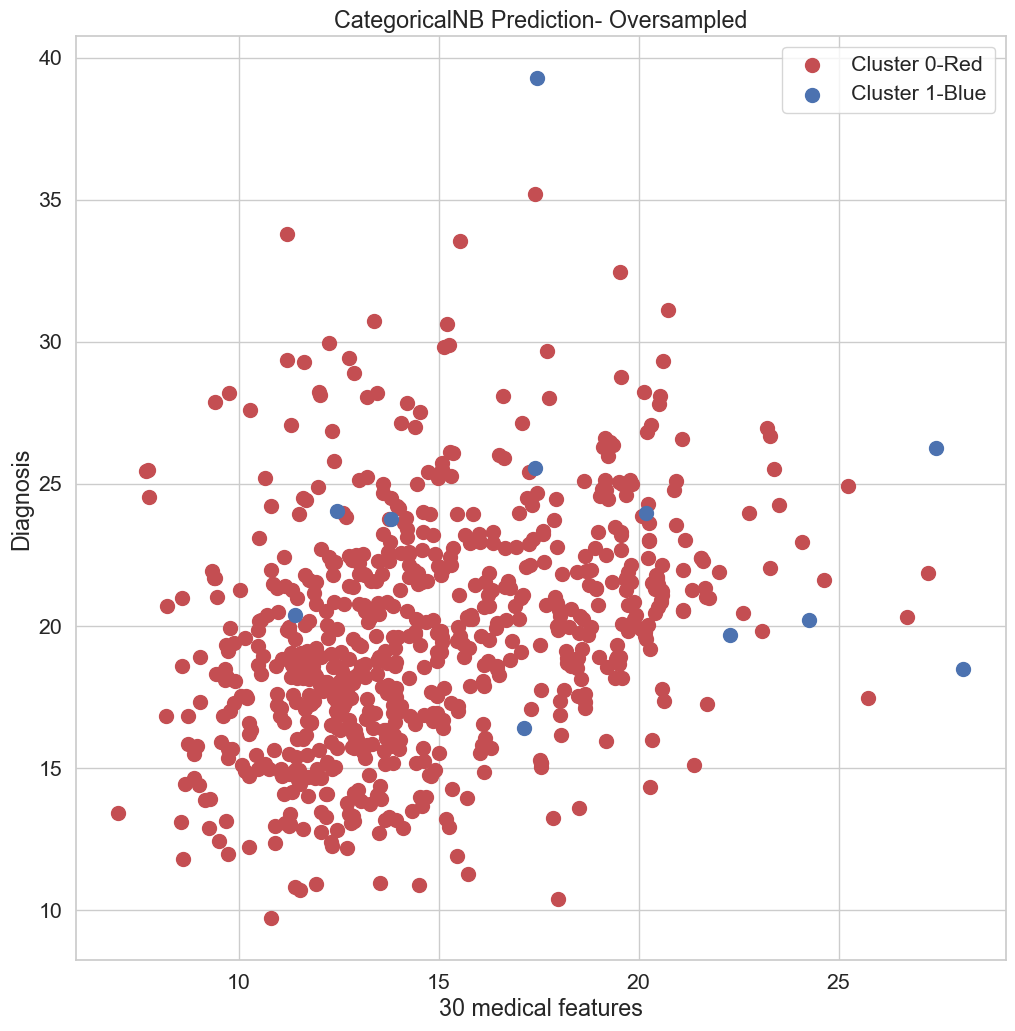

In [247]:
from sklearn.naive_bayes import CategoricalNB
CG_NB_res = CategoricalNB()
CG_NB_res.fit(minmax_res_x, Y_res)
print (CG_NB_res)
CG_NB_res_pred = CG_NB_res.predict(minmax_res_x)
print("Confusion Matrix:\n", confusion_matrix(Y_res, CG_NB_res_pred))
print("Accuracy:", accuracy_score(Y_res, CG_NB_res_pred))
print("Classification Report:\n", classification_report(Y_res, CG_NB_res_pred, zero_division=0))
plt.scatter(X_res_np[CG_NB_res_pred == 0, 0], X_res_np[CG_NB_res_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(X_res_np[CG_NB_res_pred == 1, 0], X_res_np[CG_NB_res_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("CategoricalNB Prediction- Oversampled")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()



In [ ]:
#Set 3

In [69]:
#Feature Importance /Feature Selection 
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x.shape[1]):
    print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))


Feature Ranking:
Feature radius_mean (0.139416)
Feature texture_mean (0.137679)
Feature perimeter_mean (0.118768)
Feature area_mean (0.117989)
Feature smoothness_mean (0.077427)
Feature compactness_mean (0.057240)
Feature concavity_mean (0.048971)
Feature concave points_mean (0.045257)
Feature symmetry_mean (0.035983)
Feature fractal_dimension_mean (0.033661)
Feature radius_se (0.030638)
Feature texture_se (0.017393)
Feature perimeter_se (0.015467)
Feature area_se (0.014069)
Feature smoothness_se (0.013795)
Feature compactness_se (0.011398)
Feature concavity_se (0.011063)
Feature concave points_se (0.010804)
Feature symmetry_se (0.008930)
Feature fractal_dimension_se (0.008089)
Feature radius_worst (0.006387)
Feature texture_worst (0.005603)
Feature perimeter_worst (0.005135)
Feature area_worst (0.004920)
Feature smoothness_worst (0.004529)
Feature compactness_worst (0.004402)
Feature concavity_worst (0.004330)
Feature concave points_worst (0.003980)
Feature symmetry_worst (0.003718)
F

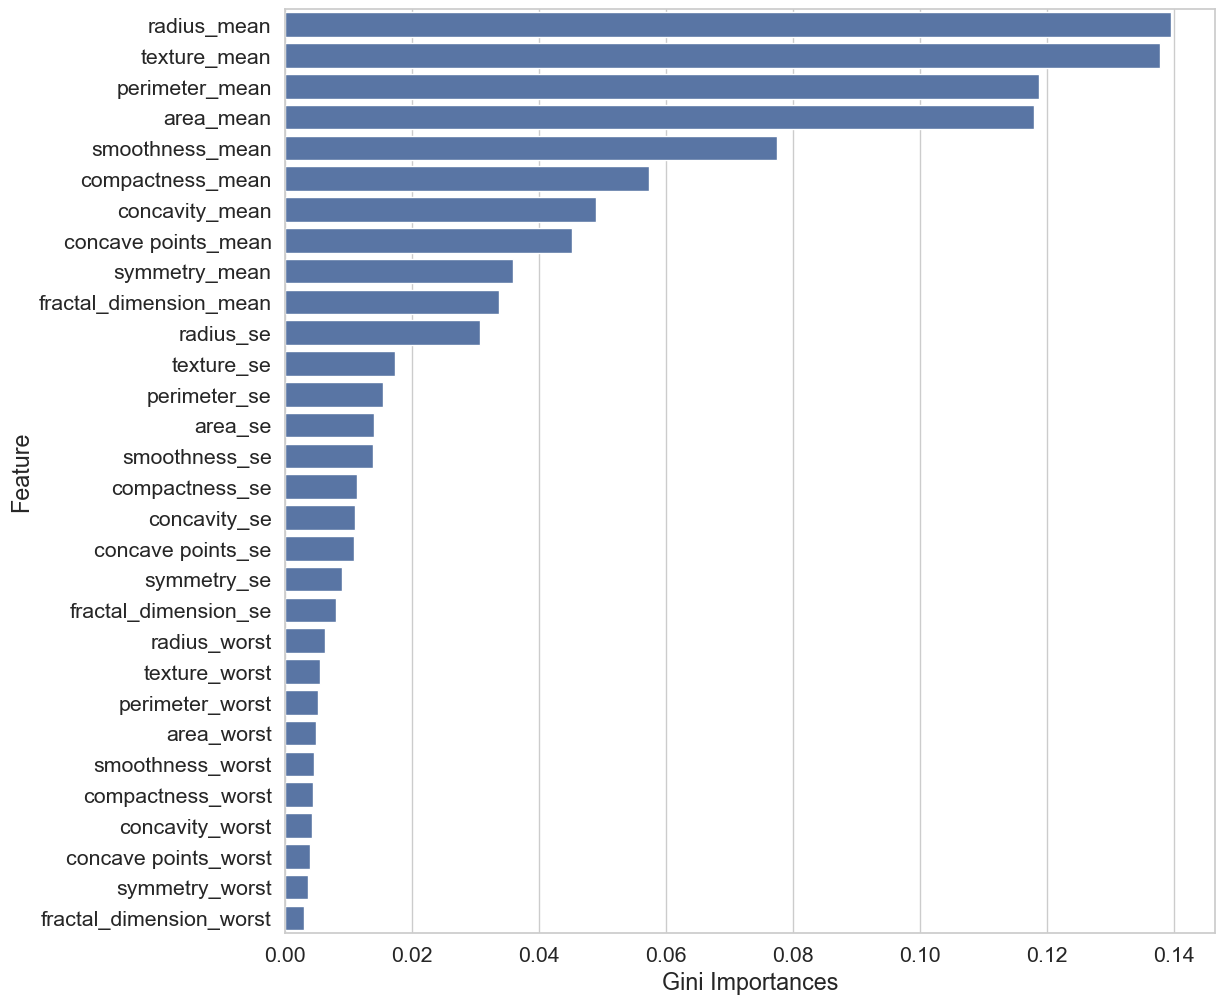

In [256]:
feat_imp = pd.DataFrame({'Feature': list(x), 'Gini importance': importances[indices]})
plt.rcParams['figure.figsize']= (12,12)
s.set_style ('whitegrid')
ax= s.barplot(x ='Gini importance', y = 'Feature', data = feat_imp  )
ax.set (xlabel = 'Gini Importances')
plt.show()

feat_imp.index = feat_imp.Feature


In [257]:
feat_to_keep = feat_imp.iloc[:15].index
display (type(feat_to_keep),feat_to_keep)


pandas.core.indexes.base.Index

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se'],
      dtype='object', name='Feature')

In [73]:
X_res = pd.DataFrame(X_res)
Y_res = pd.DataFrame(Y_res)
X_res.columns = x.columns
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res [feat_to_keep], Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.96      0.99      0.97        75

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Accuracy Score 0.972027972027972
Confusion Matrix :
 [[65  3]
 [ 1 74]]


In [74]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (X_res [feat_to_keep], Y_res,'SVC',SVC(), param, cv =10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0]
Best Params : {'C': 100, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.91      0.91        68
           1       0.92      0.91      0.91        75

    accuracy                           0.91       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.91      0.91      0.91       143

Accuracy Score 0.9090909090909091
Confusion Matrix :
 [[62  6]
 [ 7 68]]


In [75]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res [feat_to_keep], Y_res,'XGBoost', XGBClassifier(),param, cv = 10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 2000}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score 0.986013986013986
Confusion Matrix :
 [[66  2]
 [ 0 75]]


In [253]:
X_sc_feat_to_keep = sc_x.fit_transform(X_res [feat_to_keep])
print (X_sc_feat_to_keep)


[[ 0.87910647 -2.23946858  1.04411586 ...  2.71997336  2.42918434
  -0.18721873]
 [ 1.58648119 -0.46163572  1.44565184 ...  0.15112512  0.64947142
  -0.60100453]
 [ 1.34520609  0.37555756  1.33035933 ...  0.73853079  1.0970921
  -0.2749808 ]
 ...
 [ 1.1505971   0.24875665  1.04173255 ... -0.01731756 -0.01617049
   0.5232993 ]
 [ 0.20260073 -0.01027735  0.21298565 ... -0.09009615 -0.0067929
  -0.3553836 ]
 [-0.65652196  0.27622885 -0.68981094 ... -0.30908489 -0.31943816
  -0.05245265]]


In [263]:
X_sc_feat_to_keep_train, X_sc_feat_to_keep_test, Y_res_train, Y_res_test = train_test_split (X_sc_feat_to_keep,Y_res,test_size = 0.2)
feat_to_keep_np = (X_res [feat_to_keep]).values
print(feat_to_keep_np)


[[1.79900000e+01 1.03800000e+01 1.22800000e+02 ... 8.58900000e+00
  1.53400000e+02 6.39900000e-03]
 [2.05700000e+01 1.77700000e+01 1.32900000e+02 ... 3.39800000e+00
  7.40800000e+01 5.22500000e-03]
 [1.96900000e+01 2.12500000e+01 1.30000000e+02 ... 4.58500000e+00
  9.40300000e+01 6.15000000e-03]
 ...
 [1.89802048e+01 2.07229208e+01 1.22740052e+02 ... 3.05761947e+00
  4.44130151e+01 8.41489365e-03]
 [1.55225881e+01 1.96461822e+01 1.01894239e+02 ... 2.91055213e+00
  4.48309650e+01 5.92187981e-03]
 [1.23891194e+01 2.08371158e+01 7.91858240e+01 ... 2.46803063e+00
  3.08966825e+01 6.78136058e-03]]


Confusion Matrix:
 [[  0 357]
 [  0 357]]
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       357
           1       0.50      1.00      0.67       357

    accuracy                           0.50       714
   macro avg       0.25      0.50      0.33       714
weighted avg       0.25      0.50      0.33       714



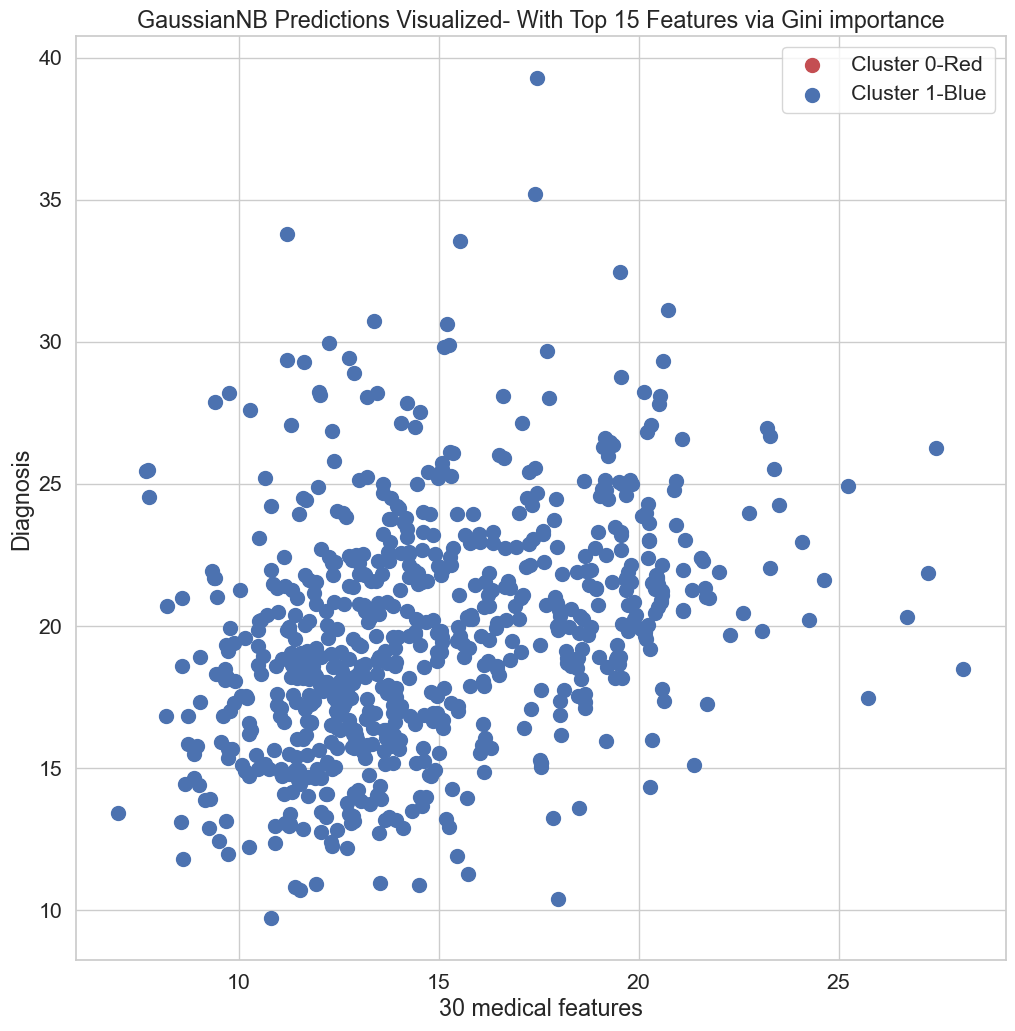

In [264]:
from sklearn.naive_bayes import GaussianNB
GNB_feat_to_keep = GaussianNB()
GNB_feat_to_keep.fit(X_sc_feat_to_keep_train, Y_res_train)
GNB_feat_to_keep_pred = GNB_feat_to_keep.predict(X_res [feat_to_keep])
print("Confusion Matrix:\n", confusion_matrix(Y_res, GNB_feat_to_keep_pred))
print("Accuracy:", accuracy_score(Y_res, GNB_feat_to_keep_pred))
print("Classification Report:\n", classification_report(Y_res, GNB_feat_to_keep_pred, zero_division=0))
plt.scatter(feat_to_keep_np[GNB_feat_to_keep_pred == 0, 0], feat_to_keep_np[GNB_feat_to_keep_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(feat_to_keep_np[GNB_feat_to_keep_pred == 1, 0], feat_to_keep_np[GNB_feat_to_keep_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("GaussianNB Predictions Visualized- With Top 15 Features via Gini importance")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()

Confusion Matrix:
 [[357   0]
 [357   0]]
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       357
           1       0.00      0.00      0.00       357

    accuracy                           0.50       714
   macro avg       0.25      0.50      0.33       714
weighted avg       0.25      0.50      0.33       714



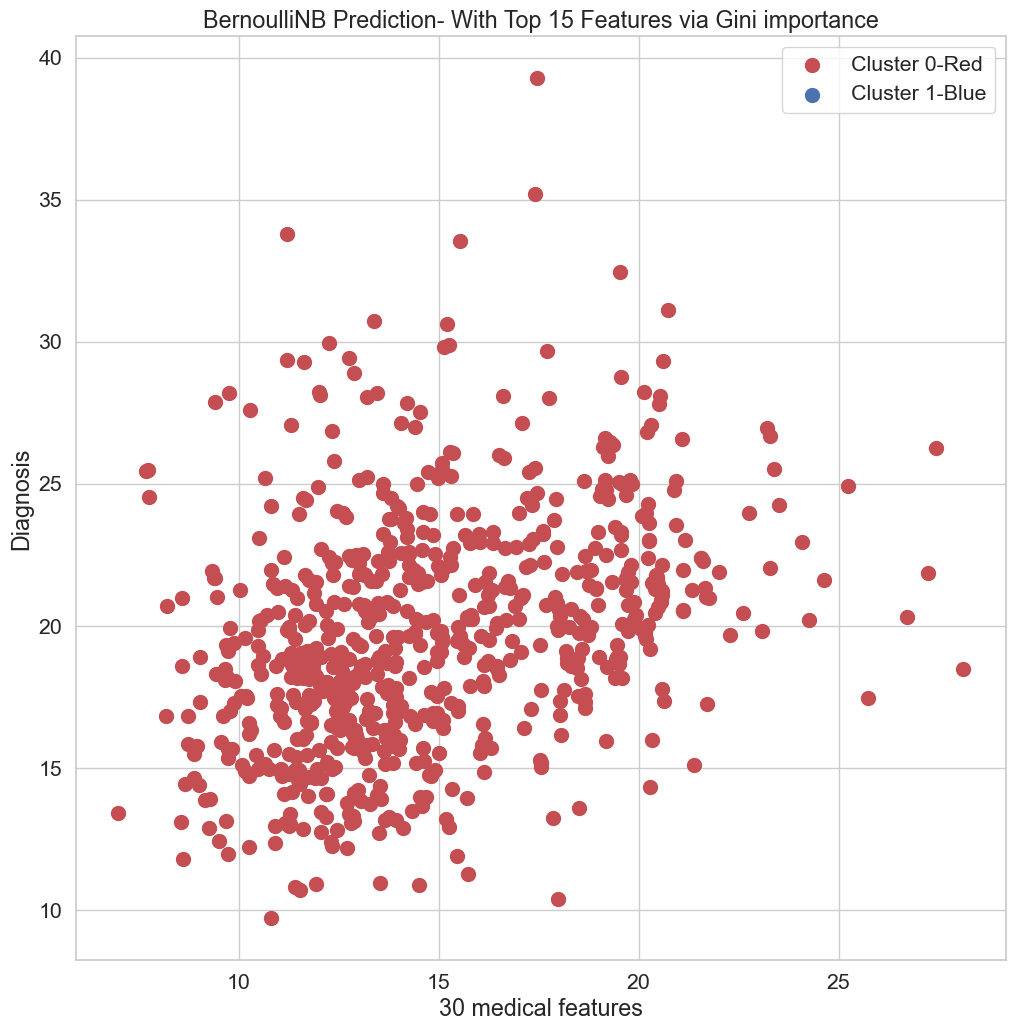

In [271]:
from sklearn.naive_bayes import BernoulliNB
BNB_feat_to_keep = BernoulliNB()
BNB_feat_to_keep.fit(X_sc_feat_to_keep_train, Y_res_train) 
BNB_feat_to_keep_pred = BNB_feat_to_keep.predict(X_res [feat_to_keep])
print("Confusion Matrix:\n", confusion_matrix(Y_res, BNB_feat_to_keep_pred))
print("Accuracy:", accuracy_score(Y_res, BNB_feat_to_keep_pred))
print("Classification Report:\n", classification_report(Y_res, BNB_feat_to_keep_pred, zero_division=0))
plt.scatter(feat_to_keep_np[BNB_feat_to_keep_pred == 0, 0], feat_to_keep_np[BNB_feat_to_keep_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(feat_to_keep_np[BNB_feat_to_keep_pred == 1, 0], feat_to_keep_np[BNB_feat_to_keep_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("BernoulliNB Prediction- With Top 15 Features via Gini importance")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()

In [270]:
from sklearn.preprocessing import MinMaxScaler
minmax_feat_to_keep_x= MinMaxScaler()
minmax_feat_to_keep_x = minmax_feat_to_keep_x.fit_transform(X_sc_feat_to_keep)
print (minmax_feat_to_keep_x)

X_res_sc_minmax_feat_to_keep_train, X_res_sc_minmax_feat_to_keep_test, Y_res_train, Y_res_test = train_test_split (minmax_feat_to_keep_x,Y_res,test_size = 0.2)


[[0.52103744 0.0226581  0.54598853 ... 0.3690336  0.27381126 0.15929565]
 [0.64314449 0.27257355 0.61578329 ... 0.12444047 0.12565979 0.11938675]
 [0.60149557 0.3902604  0.59574321 ... 0.18037035 0.16292179 0.15083115]
 ...
 [0.56790216 0.3724356  0.54557426 ... 0.10840218 0.0702487  0.22782383]
 [0.40425899 0.33602239 0.40152193 ... 0.10147256 0.07102934 0.14307645]
 [0.25595719 0.37629746 0.24459833 ... 0.08062153 0.04500331 0.17229359]]


MultinomialNB()
Confusion Matrix:
 [[312  45]
 [ 53 304]]
Accuracy: 0.8627450980392157
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       357
           1       0.87      0.85      0.86       357

    accuracy                           0.86       714
   macro avg       0.86      0.86      0.86       714
weighted avg       0.86      0.86      0.86       714



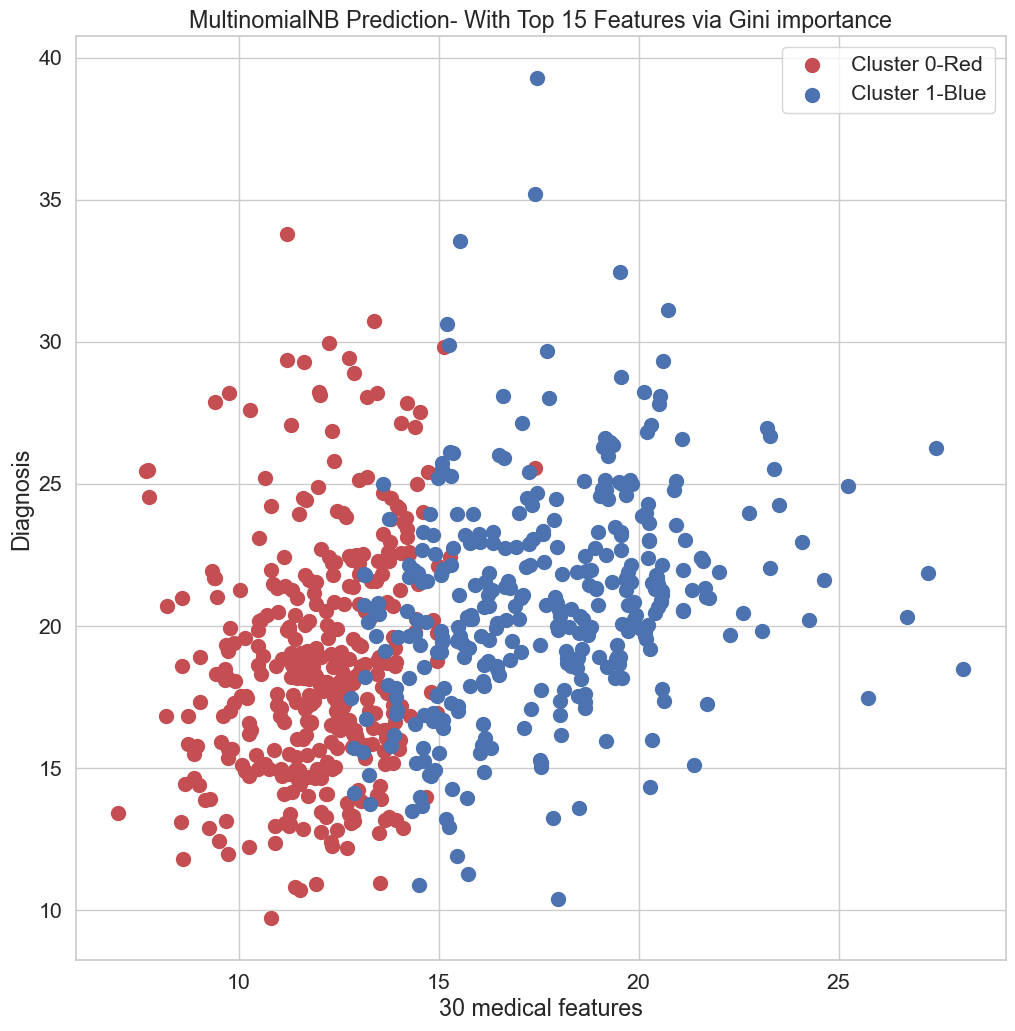

In [273]:
from sklearn.naive_bayes import MultinomialNB
MNB_feat_to_keep = MultinomialNB()
MNB_feat_to_keep.fit(X_res_sc_minmax_feat_to_keep_train, Y_res_train) 
print (MNB_feat_to_keep)
MNB_feat_to_keep_pred = MNB_feat_to_keep.predict(minmax_feat_to_keep_x)
print("Confusion Matrix:\n", confusion_matrix(Y_res, MNB_feat_to_keep_pred))
print("Accuracy:", accuracy_score(Y_res, MNB_feat_to_keep_pred))
print("Classification Report:\n", classification_report(Y_res, MNB_feat_to_keep_pred, zero_division=0))
plt.scatter(feat_to_keep_np[MNB_feat_to_keep_pred == 0, 0], feat_to_keep_np[MNB_feat_to_keep_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(feat_to_keep_np[MNB_feat_to_keep_pred == 1, 0], feat_to_keep_np[MNB_feat_to_keep_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("MultinomialNB Prediction- With Top 15 Features via Gini importance")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()


ComplementNB()
[1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 0

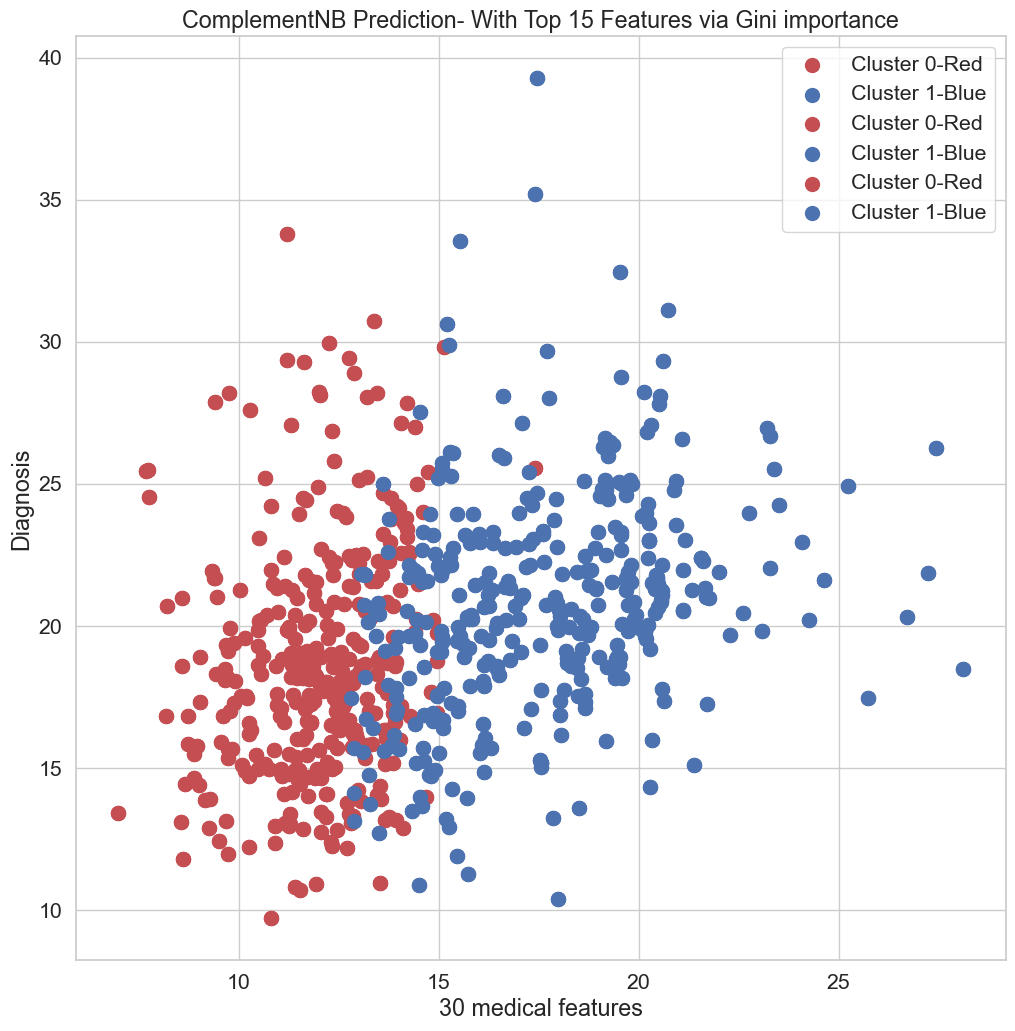

In [276]:
from sklearn.naive_bayes import ComplementNB
CNB_feat_to_keep = ComplementNB()
CNB_feat_to_keep.fit(X_res_sc_minmax_feat_to_keep_train,Y_res_train)
print (CNB_feat_to_keep)
CNB_feat_to_keep_pred= CNB_feat_to_keep.predict(minmax_feat_to_keep_x)
print (CNB_feat_to_keep_pred)
print("Confusion Matrix:\n", confusion_matrix(Y_res, CNB_feat_to_keep_pred))
print("Accuracy:", accuracy_score(Y_res, CNB_feat_to_keep_pred))
print("Classification Report:\n", classification_report(Y_res, CNB_feat_to_keep_pred, zero_division=0))
plt.scatter(feat_to_keep_np[CNB_feat_to_keep_pred == 0, 0], feat_to_keep_np[CNB_feat_to_keep_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(feat_to_keep_np[CNB_feat_to_keep_pred == 1, 0], feat_to_keep_np[CNB_feat_to_keep_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("ComplementNB Prediction- With Top 15 Features via Gini importance")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()



CategoricalNB()
Confusion Matrix:
 [[357   0]
 [349   8]]
Accuracy: 0.511204481792717
Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67       357
           1       1.00      0.02      0.04       357

    accuracy                           0.51       714
   macro avg       0.75      0.51      0.36       714
weighted avg       0.75      0.51      0.36       714



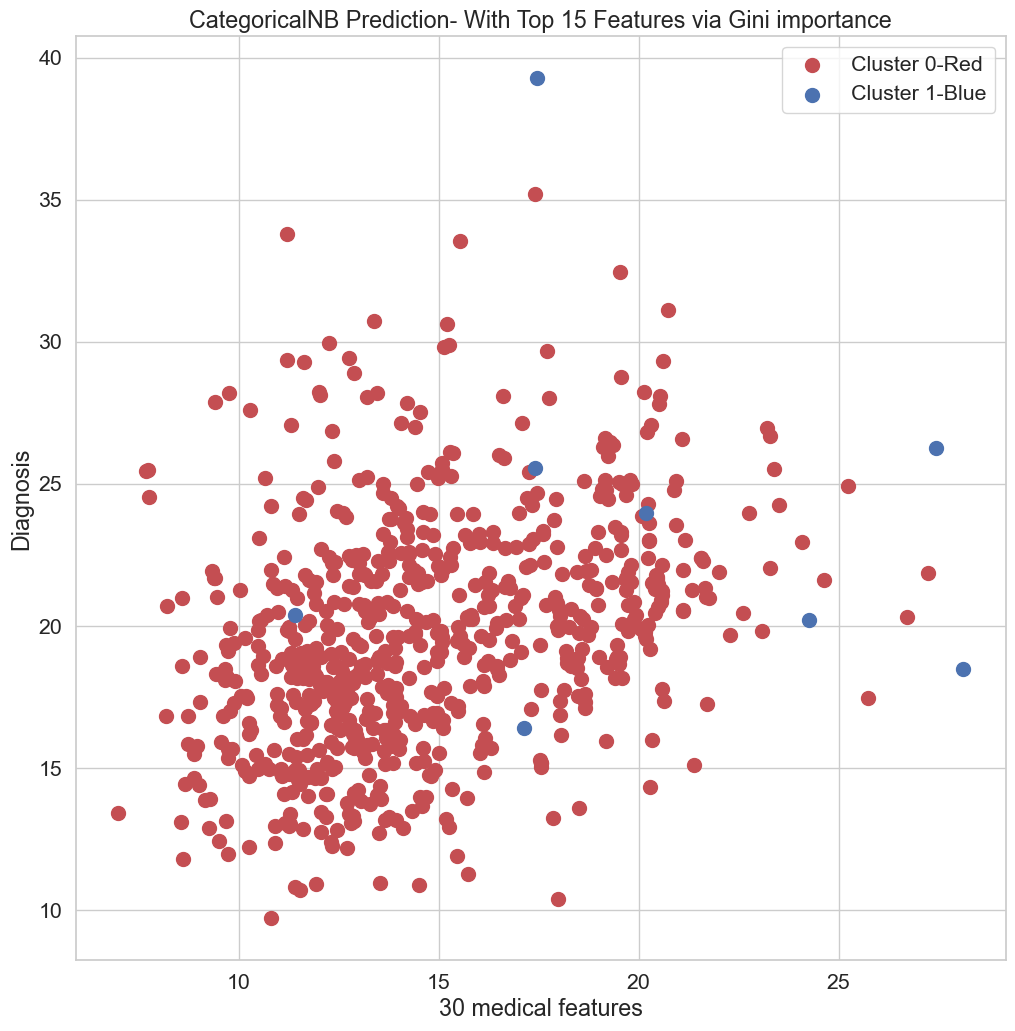

In [304]:
from sklearn.naive_bayes import CategoricalNB
CG_NB_feat_to_keep = CategoricalNB()
CG_NB_feat_to_keep.fit(minmax_feat_to_keep_x,Y_res)
print (CG_NB_feat_to_keep)
CG_NB_feat_to_keep_pred = CG_NB_feat_to_keep.predict(minmax_feat_to_keep_x)
print("Confusion Matrix:\n", confusion_matrix(Y_res, CG_NB_feat_to_keep_pred))
print("Accuracy:", accuracy_score(Y_res, CG_NB_feat_to_keep_pred))
print("Classification Report:\n", classification_report(Y_res, CG_NB_feat_to_keep_pred, zero_division=0))
plt.scatter(feat_to_keep_np[CG_NB_feat_to_keep_pred == 0, 0], feat_to_keep_np[CG_NB_feat_to_keep_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(feat_to_keep_np[CG_NB_feat_to_keep_pred == 1, 0], feat_to_keep_np[CG_NB_feat_to_keep_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("CategoricalNB Prediction- With Top 15 Features via Gini importance")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()




In [ ]:
#Set 4

In [97]:
pca = PCA()
pca.fit(X_res)
print (pca)
PCA1 = pca.transform(X_res)
display (pd.DataFrame(PCA1))
print (pd.DataFrame(pca.explained_variance_ratio_)) #keeping the first three columns as they give around 99.97% of the data's informationprint (pca.explained_variance_ratio_)

PCA()


0           1          2          3          4         5   \
0    1043.209458 -298.463598  50.250497  11.623086 -30.138360 -1.297199   
1    1152.880765   11.765281 -31.031953 -17.656309   2.107441  0.257173   
2     879.502223   35.386303   2.382204  -4.117797  -0.089985  2.631937   
3    -523.666391  -69.079135   8.737421  11.425329  -5.623498 -1.344968   
4     814.274346  185.622700   6.787884  -7.609230  -8.775739 -1.024990   
..           ...         ...        ...        ...        ...       ...   
709  -193.017820  -19.567826  -1.087566   1.349364  -6.806092  0.477824   
710   433.692815   80.822485  -2.201372  -2.504701  -3.814370  1.968403   
711   444.174320  200.189546 -23.560149  -5.144744   3.622811 -0.557249   
712   157.239797  -55.074722  -9.303897   2.727817  -3.143662  1.038134   
713  -435.249484  -15.910800   9.066628   1.244966   5.248397  0.387282   

           6         7         8         9   ...        20        21  \
0   -1.148435  0.034733 -0.761514  0.638074  ...  0.020889 -0.000783   
1   -0.013861  0.133637  0.483415 -0.073985  ...  0.005336  0.021647   
2    0.774982 -0.358670  0.139115 -0.172720  ... -0.008271 -0.001614   
3    1.293821 -0.039157  0.313702 -0.163099  ...  0.015635  0.005705   
4    0.220810  0.130721 -0.048341 -0.116694  ... -0.009919  0.010935   
..        ...       ...       ...       ...  ...       ...       ...   
709  0.298381 -0.453280  0.032266  0.088327  ... -0.005135 -0.010724   
710 -0.667303 -0.322509 -0.012117  0.196830  ...  0.016314  0.001267   
711  0.484297  0.214824  0.283529  0.039574  ... -0.001946 -0.000452   
712 -0.185170 -0.365159  0.348898 -0.089645  ... -0.008143 -0.002103   
713 -1.076494  0.155426  0.292795 -0.030616  ... -0.000741  0.004191   

           22        23        24        25        26        27        28  \
0   -0.004603 -0.011123  0.006883  0.002533 -0.001830  0.001615  0.001762   
1   -0.003045 -0.007137 -0.007744  0.001016 -0.000238 -0.001217  0.000819   
2    0.004568  0.003696  0.001065 -0.002999  0.000412 -0.000139 -0.000869   
3   -0.002485 -0.007087 -0.009290 -0.002837 -0.000875  0.001667 -0.002069   
4   -0.002623 -0.002383  0.002178  0.001365  0.003251  0.000222  0.001908   
..        ...       ...       ...       ...       ...       ...       ...   
709 -0.003095  0.000379 -0.002903 -0.000408  0.000530 -0.000886 -0.001387   
710  0.000617 -0.002161  0.001699 -0.000685 -0.001860 -0.001885 -0.000643   
711 -0.000558 -0.001868 -0.001389  0.000452  0.003384  0.000320 -0.000426   
712  0.002454  0.001300  0.000770  0.000770  0.001425 -0.002598 -0.000404   
713 -0.000634  0.003056  0.001549 -0.001259  0.000099  0.001383 -0.000605   

           29  
0    0.000724  
1   -0.001024  
2    0.000396  
3   -0.001622  
4    0.000383  
..        ...  
709  0.000065  
710  0.000098  
711  0.000428  
712  0.000411  
713 -0.000281  

[714 rows x 30 columns]

               0
0   9.833746e-01
1   1.513875e-02
2   1.286541e-03
3   1.133769e-04
4   7.599754e-05
5   5.797590e-06
6   3.579349e-06
7   7.605053e-07
8   3.099506e-07
9   1.540622e-07
10  6.149516e-08
11  1.497958e-08
12  6.131901e-09
13  4.484488e-09
14  2.800278e-09
15  1.313899e-09
16  7.080694e-10
17  4.434836e-10
18  3.451705e-10
19  3.221434e-10
20  1.481740e-10
21  1.124816e-10
22  6.234195e-11
23  5.379832e-11
24  3.068083e-11
25  2.540866e-11
26  7.299457e-12
27  5.305228e-12
28  3.793245e-12
29  1.248740e-12


In [287]:
pca3 = PCA(n_components = 3)
PCA_X = pca3.fit_transform(X_res)
print (pd.DataFrame(PCA_X))
print(PCA_X)

               0           1          2
0    1043.209458 -298.463598  50.250497
1    1152.880765   11.765281 -31.031953
2     879.502223   35.386303   2.382204
3    -523.666391  -69.079135   8.737421
4     814.274346  185.622700   6.787884
..           ...         ...        ...
709  -193.017820  -19.567826  -1.087566
710   433.692815   80.822485  -2.201372
711   444.174320  200.189546 -23.560149
712   157.239797  -55.074722  -9.303897
713  -435.249484  -15.910800   9.066628

[714 rows x 3 columns]
[[1043.20945762 -298.46359816   50.2504969 ]
 [1152.88076481   11.7652807   -31.03195314]
 [ 879.50222341   35.38630266    2.38220411]
 ...
 [ 444.17431967  200.18954626  -23.56014912]
 [ 157.23979651  -55.07472207   -9.30389724]
 [-435.24948431  -15.91080007    9.06662751]]


In [288]:
print (pca.explained_variance_ratio_)

[0.98337463 0.01513875 0.00128654]


In [289]:
PCA_X_train,PCA_X_test, y_train,y_test = train_test_split(PCA_X,Y_res,test_size=0.2,random_state=42)
print (PCA_X.shape)
print (PCA_X_train.shape)
print (PCA_X_test.shape)


(714, 3)
(571, 3)
(143, 3)


In [290]:
print (pd.DataFrame(PCA_X_train))

               0           1          2
0     500.868750  -57.460242 -26.797255
1    1225.452613 -235.365720  -8.117779
2    -380.054895  -44.643941   5.234086
3     532.490029  143.205301  34.433073
4    -484.896143    2.769550  -9.790579
..           ...         ...        ...
566  -841.133459  -43.595341  26.558701
567  -550.253057  -22.811324   4.792509
568  -297.061761   80.850905 -17.737265
569  -155.499262  -43.594628 -19.005407
570  -504.364009    3.030319  -3.355205

[571 rows x 3 columns]


In [291]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (PCA_X_train, y_train ,'Random Forest',RandomForestClassifier(), param, cv =10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.94      0.96        47

    accuracy                           0.97       115
   macro avg       0.97      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115

Accuracy Score 0.9652173913043478
Confusion Matrix :
 [[67  1]
 [ 3 44]]


In [292]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (PCA_X_train, y_train,'SVC',SVC(), param, cv =10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1]
Best Params : {'C': 1, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.94      0.96        47

    accuracy                           0.97       115
   macro avg       0.97      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115

Accuracy Score 0.9652173913043478
Confusion Matrix :
 [[67  1]
 [ 3 44]]


In [306]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (PCA_X_train, y_train,'XGBoost', XGBClassifier(),param, cv = 10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1]
Best Params : {'n_estimators': 1000}
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.99      0.96        68
           1       0.98      0.91      0.95        47

    accuracy                           0.96       115
   macro avg       0.96      0.95      0.95       115
weighted avg       0.96      0.96      0.96       115

Accuracy Score 0.9565217391304348
Confusion Matrix :
 [[67  1]
 [ 4 43]]


In [307]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_sc_pca3 = sc_x.fit_transform(PCA_X)
print (x_sc_pca3)


[[ 1.50572326 -3.47199776  2.0052182 ]
 [ 1.66401806  0.13686436 -1.23831287]
 [ 1.26943534  0.41164539  0.09506053]
 ...
 [ 0.64110194  2.32878535 -0.94015468]
 [ 0.2269531  -0.64067884 -0.37126686]
 [-0.62822022 -0.18508878  0.36179874]]


In [308]:
x_sc_pca3_train, x_sc_pca3_test, Y_res_train, Y_res_test = train_test_split (x_sc_pca3,Y_res,test_size = 0.2)

Confusion Matrix:
 [[339  18]
 [ 75 282]]
Accuracy: 0.8697478991596639
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       357
           1       0.94      0.79      0.86       357

    accuracy                           0.87       714
   macro avg       0.88      0.87      0.87       714
weighted avg       0.88      0.87      0.87       714



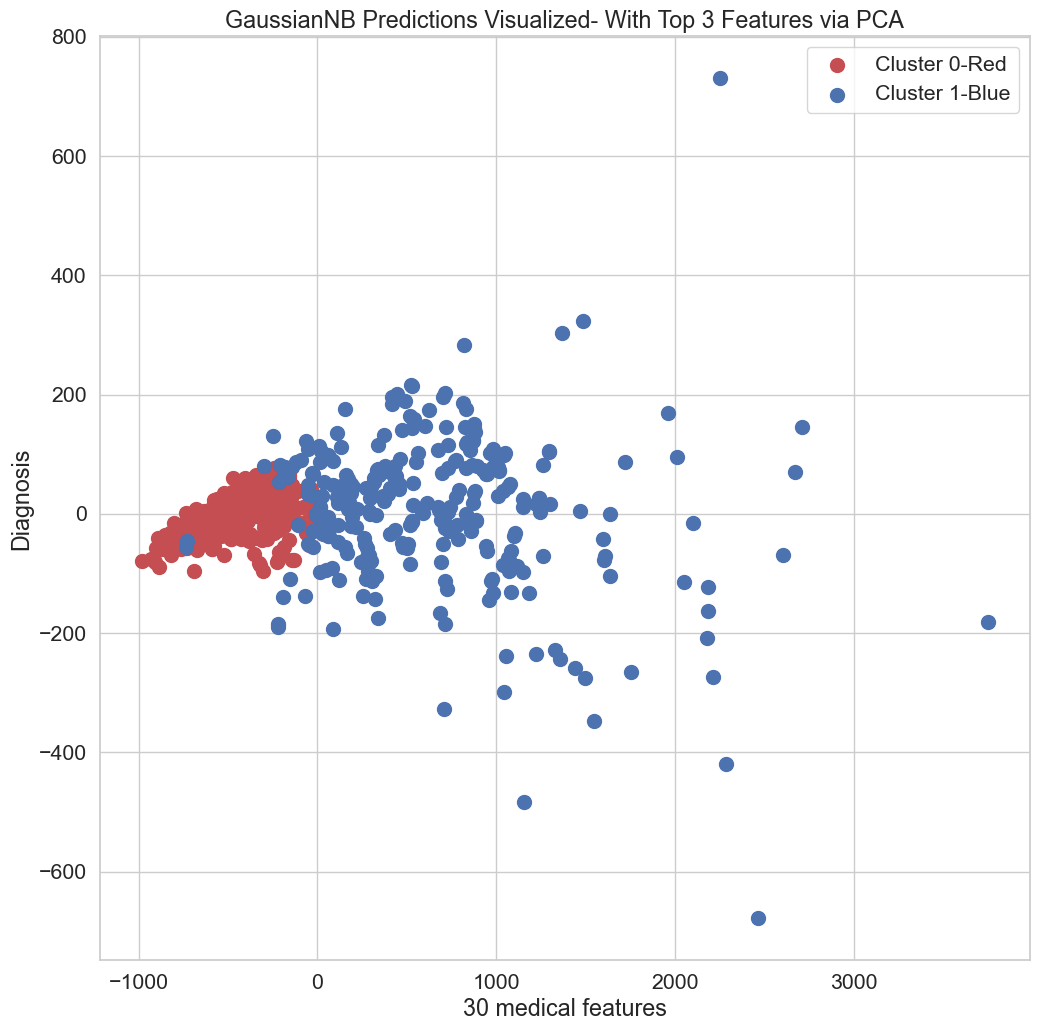

In [309]:
from sklearn.naive_bayes import GaussianNB
GNB_pca3 = GaussianNB()
GNB_pca3.fit(x_sc_pca3_train, Y_res_train)
GNB_pca3_pred = GNB_pca3.predict(x_sc_pca3)
print("Confusion Matrix:\n", confusion_matrix(Y_res, GNB_pca3_pred))
print("Accuracy:", accuracy_score(Y_res, GNB_pca3_pred))
print("Classification Report:\n", classification_report(Y_res, GNB_pca3_pred, zero_division=0))
plt.scatter(PCA_X[GNB_pca3_pred == 0, 0], PCA_X[GNB_pca3_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X[GNB_pca3_pred == 1, 0], PCA_X[GNB_pca3_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("GaussianNB Predictions Visualized- With Top 3 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()




Confusion Matrix:
 [[352   5]
 [ 94 263]]
Accuracy: 0.8613445378151261
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       357
           1       0.98      0.74      0.84       357

    accuracy                           0.86       714
   macro avg       0.89      0.86      0.86       714
weighted avg       0.89      0.86      0.86       714



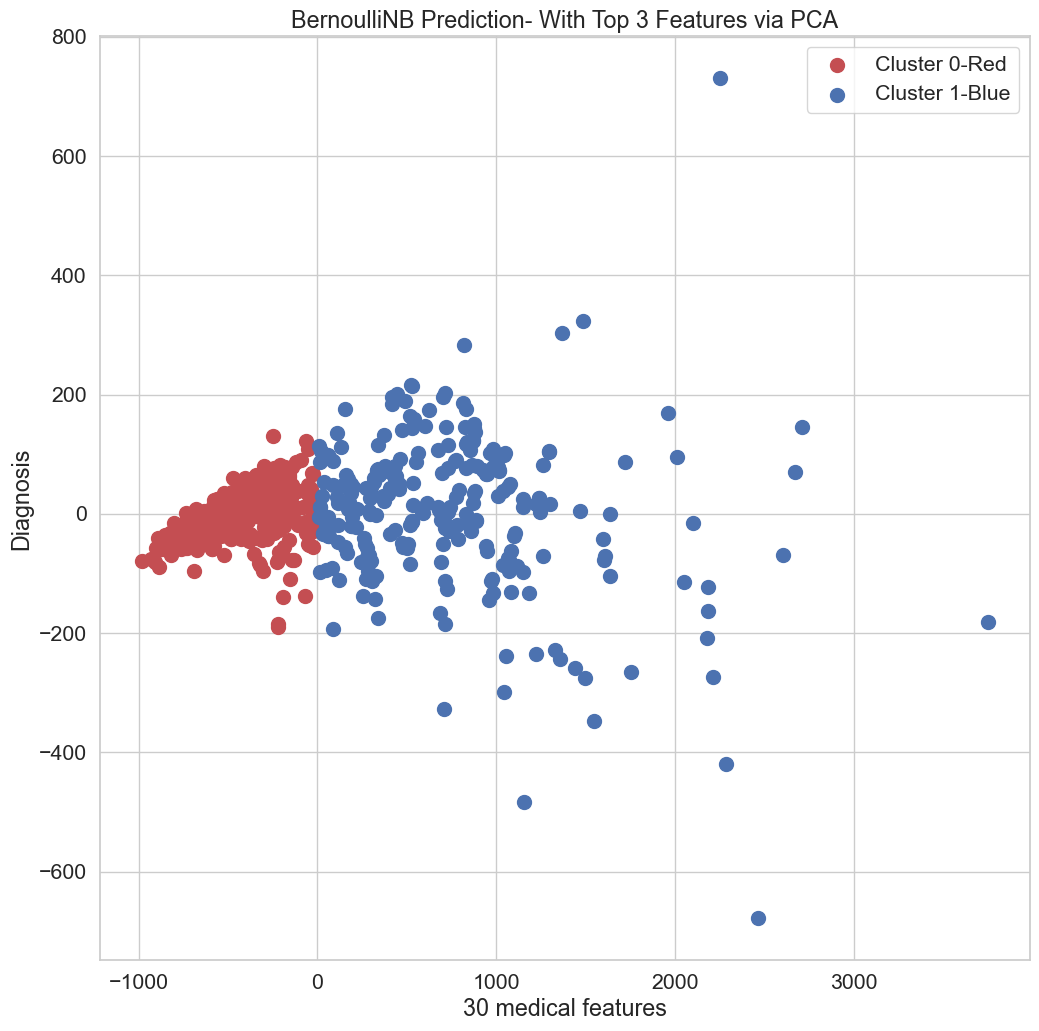

In [310]:
from sklearn.naive_bayes import BernoulliNB
BNB_pca3 = BernoulliNB()
BNB_pca3.fit(x_sc_pca3_train, Y_res_train) 
BNB_pca3_pred = BNB_pca3.predict(x_sc_pca3)
print("Confusion Matrix:\n", confusion_matrix(Y_res, BNB_pca3_pred))
print("Accuracy:", accuracy_score(Y_res, BNB_pca3_pred))
print("Classification Report:\n", classification_report(Y_res, BNB_pca3_pred, zero_division=0))
plt.scatter(PCA_X[BNB_pca3_pred == 0, 0], PCA_X[BNB_pca3_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X[BNB_pca3_pred == 1, 0], PCA_X[BNB_pca3_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("BernoulliNB Prediction- With Top 3 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()




In [312]:
from sklearn.preprocessing import MinMaxScaler
minmax_pca3_x= MinMaxScaler()
minmax_pca3_x = minmax_pca3_x.fit_transform(x_sc_pca3)
print (minmax_pca3_x)


[[0.42770668 0.26945866 0.25450594]
 [0.45089526 0.48974815 0.06230777]
 [0.3930929  0.50652113 0.14131794]
 ...
 [0.30104843 0.62354577 0.07997539]
 [0.24037983 0.44228593 0.11368531]
 [0.11510562 0.47009573 0.15712373]]


In [313]:
X_res_sc_minmax_pca3_train, X_res_sc_minmax_pca3_test, Y_res_train, Y_res_test = train_test_split (minmax_pca3_x,Y_res,test_size = 0.2)

MultinomialNB()
Confusion Matrix:
 [[319  38]
 [ 29 328]]
Accuracy: 0.9061624649859944
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       357
           1       0.90      0.92      0.91       357

    accuracy                           0.91       714
   macro avg       0.91      0.91      0.91       714
weighted avg       0.91      0.91      0.91       714



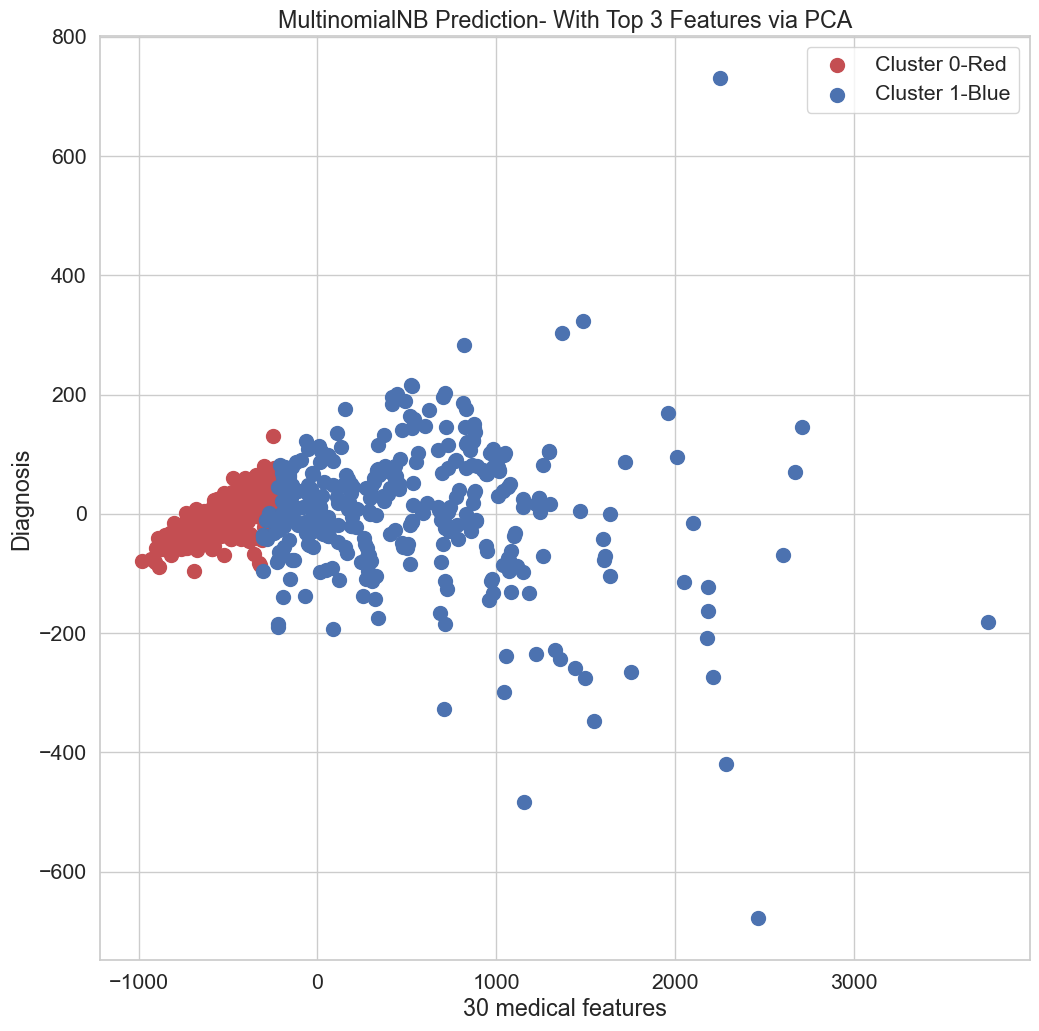

In [314]:
from sklearn.naive_bayes import MultinomialNB
MNB_pca3 = MultinomialNB()
MNB_pca3.fit(X_res_sc_minmax_pca3_train, Y_res_train) 
print (MNB_pca3)
MNB_pca3_pred = MNB_pca3.predict(minmax_pca3_x)
print("Confusion Matrix:\n", confusion_matrix(Y_res, MNB_pca3_pred))
print("Accuracy:", accuracy_score(Y_res, MNB_pca3_pred))
print("Classification Report:\n", classification_report(Y_res, MNB_pca3_pred, zero_division=0))
plt.scatter(PCA_X[MNB_pca3_pred == 0, 0], PCA_X[MNB_pca3_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X[MNB_pca3_pred == 1, 0], PCA_X[MNB_pca3_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("MultinomialNB Prediction- With Top 3 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()




ComplementNB()
[1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0

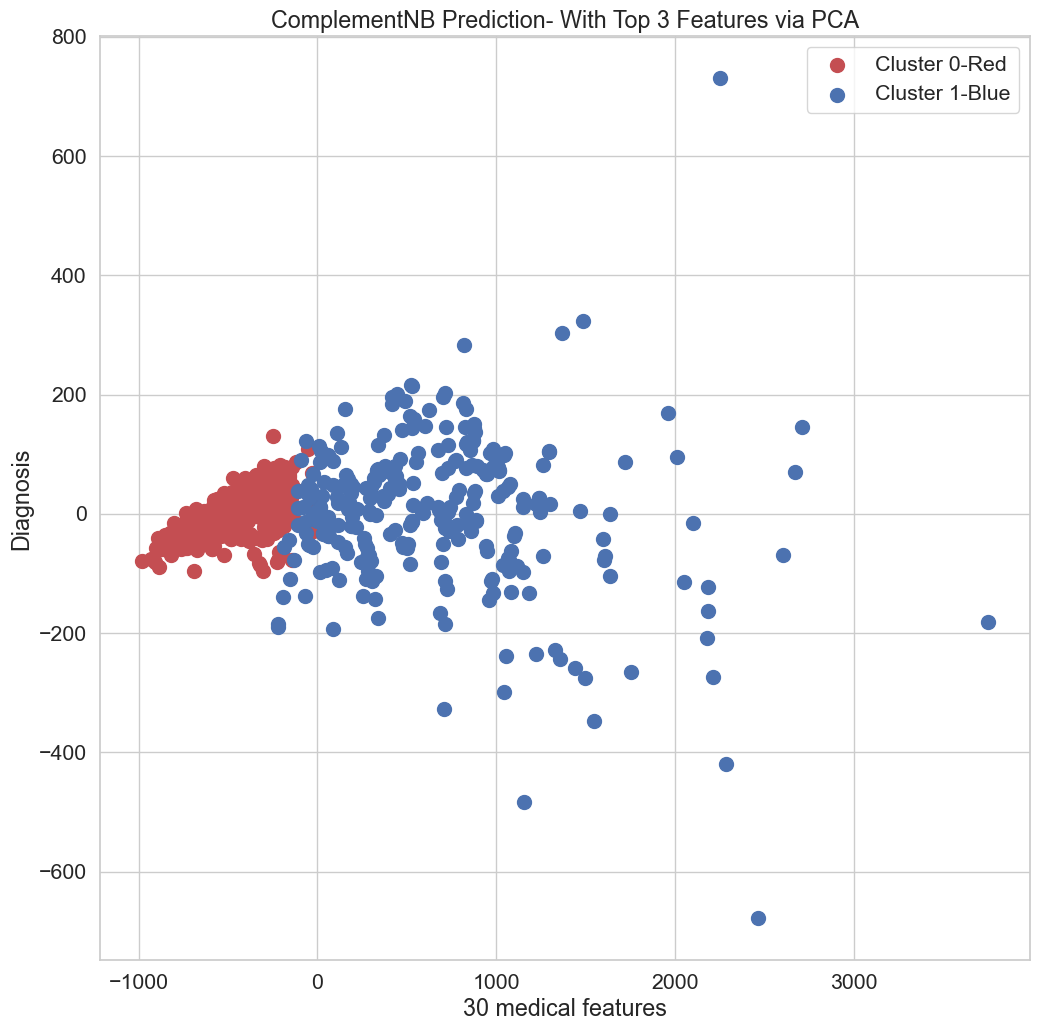

In [315]:
from sklearn.naive_bayes import ComplementNB
CNB_pca3 = ComplementNB()
CNB_pca3.fit(X_res_sc_minmax_pca3_train,Y_res_train)
print (CNB_pca3)
CNB_pca3_pred= CNB_pca3.predict(minmax_pca3_x)
print (CNB_pca3_pred)
print("Confusion Matrix:\n", confusion_matrix(Y_res, CNB_pca3_pred))
print("Accuracy:", accuracy_score(Y_res, CNB_pca3_pred))
print("Classification Report:\n", classification_report(Y_res, CNB_pca3_pred, zero_division=0))
plt.scatter(PCA_X[CNB_pca3_pred == 0, 0], PCA_X[CNB_pca3_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X[CNB_pca3_pred == 1, 0], PCA_X[CNB_pca3_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("ComplementNB Prediction- With Top 3 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()




CategoricalNB()
Confusion Matrix:
 [[357   0]
 [355   2]]
Accuracy: 0.5028011204481793
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       357
           1       1.00      0.01      0.01       357

    accuracy                           0.50       714
   macro avg       0.75      0.50      0.34       714
weighted avg       0.75      0.50      0.34       714



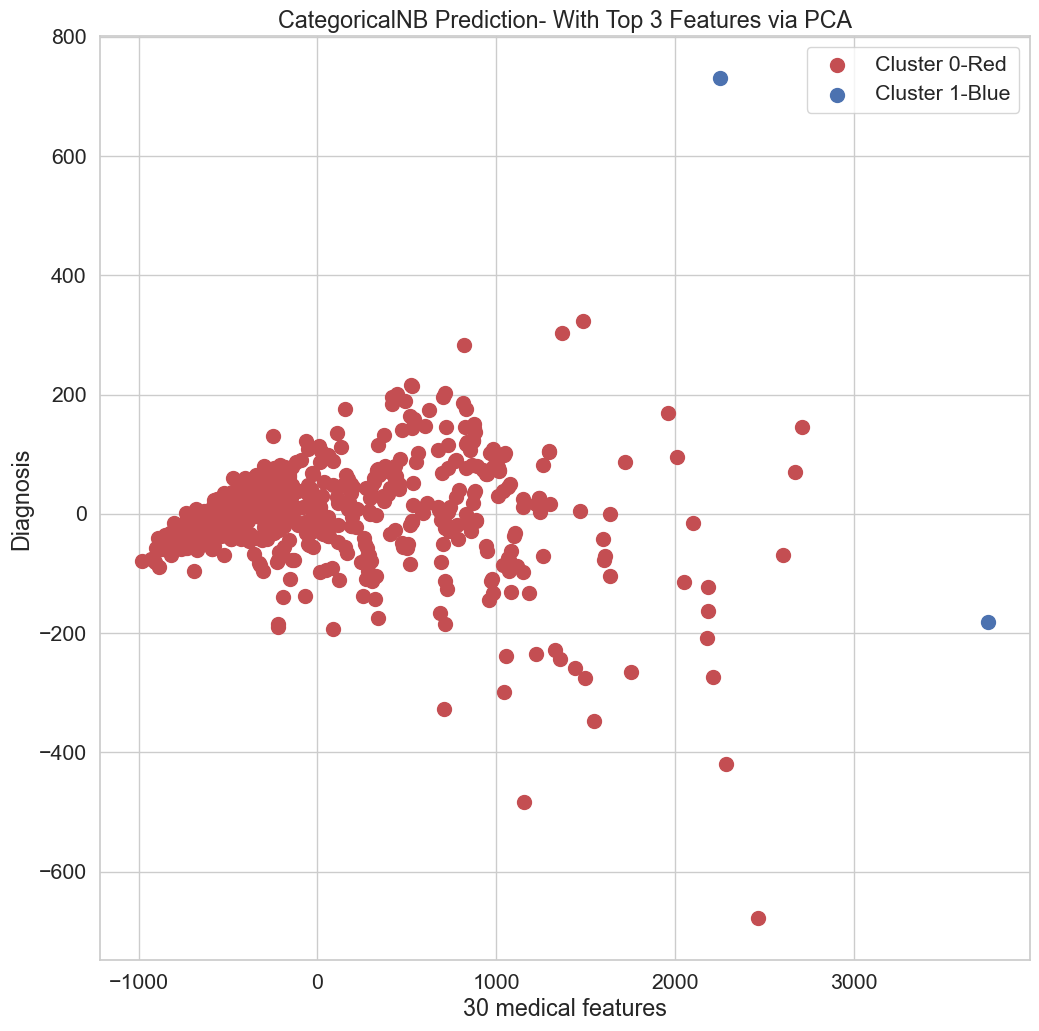

In [317]:
from sklearn.naive_bayes import CategoricalNB
CG_NB_pca3 = CategoricalNB()
CG_NB_pca3.fit(minmax_pca3_x,Y_res)
print (CG_NB_pca3)
CG_NB_pca3_pred = CG_NB_pca3.predict(minmax_pca3_x)
print("Confusion Matrix:\n", confusion_matrix(Y_res, CG_NB_pca3_pred))
print("Accuracy:", accuracy_score(Y_res, CG_NB_pca3_pred))
print("Classification Report:\n", classification_report(Y_res, CG_NB_pca3_pred, zero_division=0))
plt.scatter(PCA_X[CG_NB_pca3_pred == 0, 0], PCA_X[CG_NB_pca3_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X[CG_NB_pca3_pred == 1, 0], PCA_X[CG_NB_pca3_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("CategoricalNB Prediction- With Top 3 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()




In [ ]:
#Set 5

In [364]:
pca = PCA(n_components = 10)
PCA_X_10 = pca.fit_transform(X_res)
print (pd.DataFrame(PCA_X_10))

               0           1          2          3          4         5  \
0    1043.209458 -298.463598  50.250497  11.623086 -30.138360 -1.297199   
1    1152.880765   11.765281 -31.031953 -17.656309   2.107441  0.257173   
2     879.502223   35.386303   2.382204  -4.117797  -0.089985  2.631937   
3    -523.666391  -69.079135   8.737421  11.425329  -5.623498 -1.344968   
4     814.274346  185.622700   6.787884  -7.609230  -8.775739 -1.024990   
..           ...         ...        ...        ...        ...       ...   
709  -193.017820  -19.567826  -1.087566   1.349364  -6.806092  0.477824   
710   433.692815   80.822485  -2.201372  -2.504701  -3.814370  1.968403   
711   444.174320  200.189546 -23.560149  -5.144744   3.622811 -0.557249   
712   157.239797  -55.074722  -9.303897   2.727817  -3.143662  1.038134   
713  -435.249484  -15.910800   9.066628   1.244966   5.248397  0.387282   

            6         7         8         9  
0   -1.148435  0.034733 -0.761514  0.638074  
1   -0.

In [365]:
print (pca.explained_variance_ratio_)

[9.83374634e-01 1.51387549e-02 1.28654130e-03 1.13376862e-04
 7.59975448e-05 5.79759037e-06 3.57934853e-06 7.60505281e-07
 3.09950556e-07 1.54062171e-07]


In [366]:
PCA_X_10_train,PCA_X_10_test, y_10_train,y_10_test = train_test_split(PCA_X_10,Y_res,test_size=0.2,random_state=42)
print (PCA_X_10.shape)
print (PCA_X_10_train.shape)
print (PCA_X_10_test.shape)


(714, 10)
(571, 10)
(143, 10)


In [367]:
print (pd.DataFrame(PCA_X_10_train))

               0           1          2          3         4         5  \
0     500.868750  -57.460242 -26.797255   0.194893  0.582561 -0.317430   
1    1225.452613 -235.365720  -8.117779  -6.743114 -3.010645  1.958978   
2    -380.054895  -44.643941   5.234086   0.990064 -1.901443  0.245984   
3     532.490029  143.205301  34.433073  13.945247 -3.432700  1.068186   
4    -484.896143    2.769550  -9.790579  -7.968501 -4.947738 -0.305964   
..           ...         ...        ...        ...       ...       ...   
566  -841.133459  -43.595341  26.558701 -11.800812 -1.866280  0.047812   
567  -550.253057  -22.811324   4.792509   1.453803  3.257223 -0.557649   
568  -297.061761   80.850905 -17.737265  -8.045443 -0.415289  1.016518   
569  -155.499262  -43.594628 -19.005407   7.096207 -1.146885 -1.846355   
570  -504.364009    3.030319  -3.355205   0.289452  9.003707 -0.222009   

            6         7         8         9  
0    0.897179 -0.405104  0.445989  0.019077  
1   -1.363212  0.36

In [120]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (PCA_X_10_train, y_10_train ,'Random Forest',RandomForestClassifier(), param, cv =10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.91      0.94        68
           1       0.88      0.96      0.92        47

    accuracy                           0.93       115
   macro avg       0.93      0.93      0.93       115
weighted avg       0.93      0.93      0.93       115

Accuracy Score 0.9304347826086956
Confusion Matrix :
 [[62  6]
 [ 2 45]]


In [121]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (PCA_X_10_train, y_10_train,'SVC',SVC(), param, cv =10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1]
Best Params : {'C': 1, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96        68
           1       0.96      0.94      0.95        47

    accuracy                           0.96       115
   macro avg       0.96      0.95      0.95       115
weighted avg       0.96      0.96      0.96       115

Accuracy Score 0.9565217391304348
Confusion Matrix :
 [[66  2]
 [ 3 44]]


In [122]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (PCA_X_10_train, y_10_train,'XGBoost', XGBClassifier(),param, cv = 10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1]
Best Params : {'n_estimators': 1000}
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.96      0.96        68
           1       0.94      0.96      0.95        47

    accuracy                           0.96       115
   macro avg       0.95      0.96      0.96       115
weighted avg       0.96      0.96      0.96       115

Accuracy Score 0.9565217391304348
Confusion Matrix :
 [[65  3]
 [ 2 45]]


In [368]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_sc_pca10 = sc_x.fit_transform(PCA_X_10)
print (x_sc_pca10)


[[ 1.50572326 -3.47199776  2.0052182  ...  0.05700629 -1.95778511
   2.3267849 ]
 [ 1.66401806  0.13686436 -1.23831287 ...  0.21933588  1.24281673
  -0.26979176]
 [ 1.26943534  0.41164539  0.09506053 ... -0.58867775  0.35765219
  -0.62983627]
 ...
 [ 0.64110194  2.32878535 -0.94015468 ...  0.35258632  0.72892711
   0.14431026]
 [ 0.2269531  -0.64067884 -0.37126686 ... -0.59932721  0.89698599
  -0.32689676]
 [-0.62822022 -0.18508878  0.36179874 ...  0.25509688  0.75274913
  -0.11164444]]


In [369]:
x_sc_pca10_train, x_sc_pca10_test, Y_res_train, Y_res_test = train_test_split (x_sc_pca10,Y_res,test_size = 0.2)


Confusion Matrix:
 [[336  21]
 [ 52 305]]
Accuracy: 0.8977591036414566
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       357
           1       0.94      0.85      0.89       357

    accuracy                           0.90       714
   macro avg       0.90      0.90      0.90       714
weighted avg       0.90      0.90      0.90       714



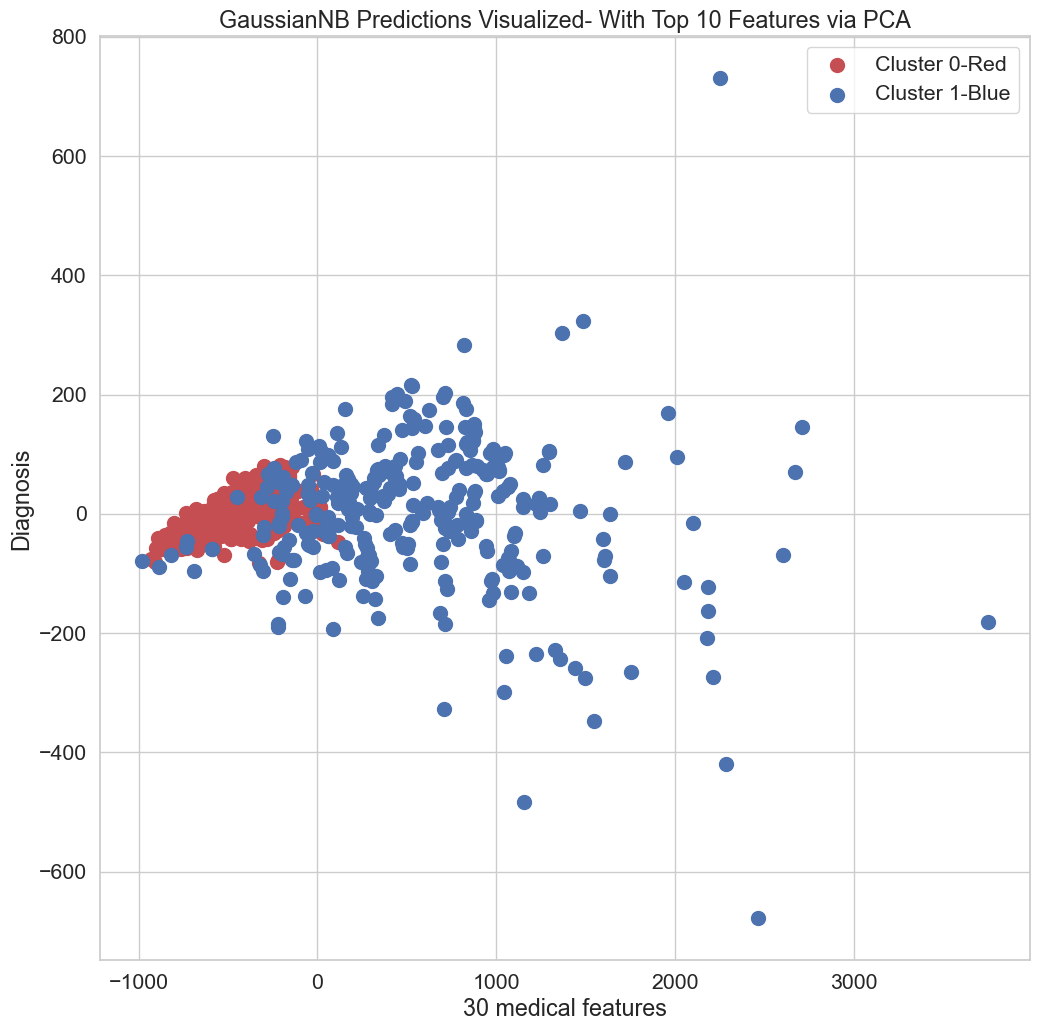

In [340]:
from sklearn.naive_bayes import GaussianNB
GNB_pca10 = GaussianNB()
GNB_pca10.fit(x_sc_pca10_train, Y_res_train)
GNB_pca10_pred = GNB_pca10.predict(x_sc_pca10)
print("Confusion Matrix:\n", confusion_matrix(Y_res, GNB_pca10_pred))
print("Accuracy:", accuracy_score(Y_res, GNB_pca10_pred))
print("Classification Report:\n", classification_report(Y_res, GNB_pca10_pred, zero_division=0))
plt.scatter(PCA_X_10[GNB_pca10_pred == 0, 0], PCA_X_10[GNB_pca10_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X_10[GNB_pca10_pred == 1, 0], PCA_X_10[GNB_pca10_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("GaussianNB Predictions Visualized- With Top 10 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()

Confusion Matrix:
 [[334  23]
 [ 66 291]]
Accuracy: 0.8753501400560224
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       357
           1       0.93      0.82      0.87       357

    accuracy                           0.88       714
   macro avg       0.88      0.88      0.87       714
weighted avg       0.88      0.88      0.87       714



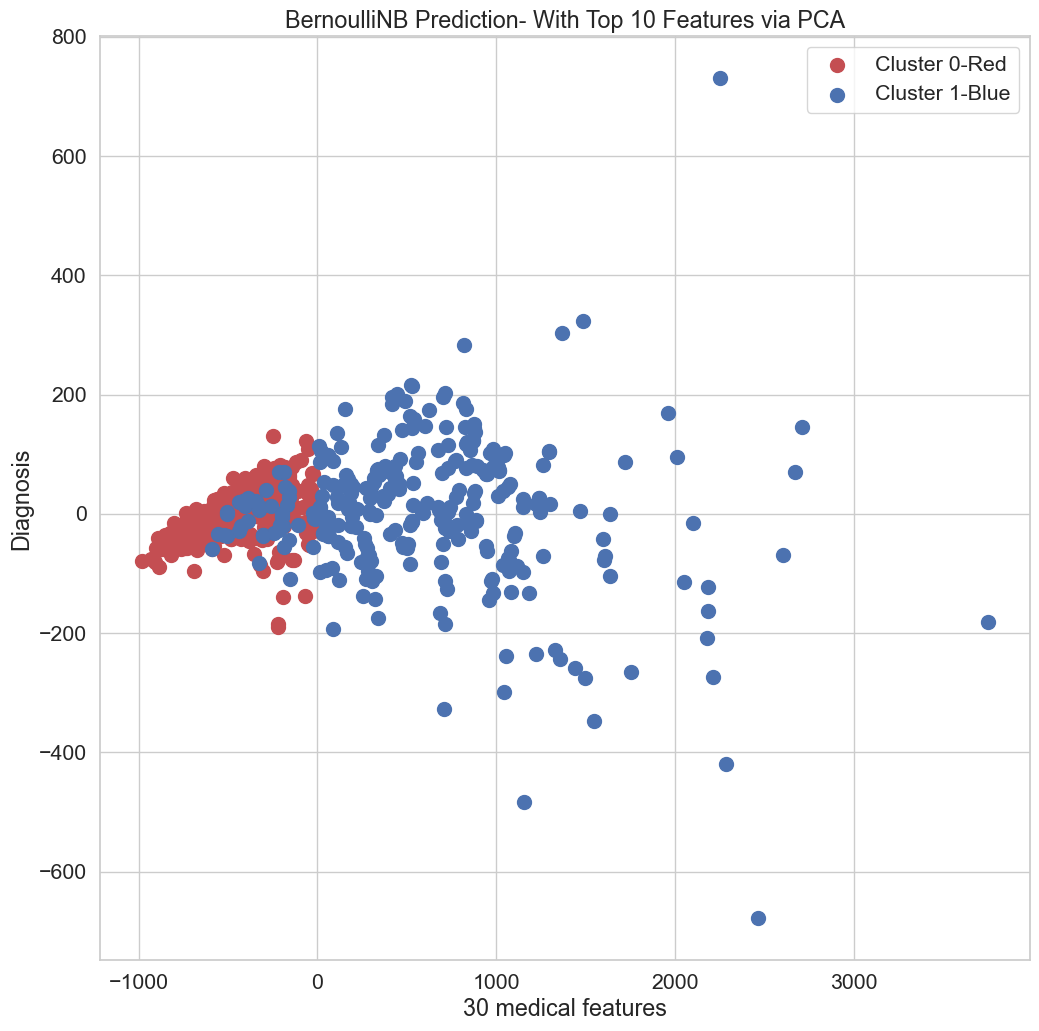

In [341]:
from sklearn.naive_bayes import BernoulliNB
BNB_pca10 = BernoulliNB()
BNB_pca10.fit(x_sc_pca10_train, Y_res_train) 
BNB_pca10_pred = BNB_pca10.predict(x_sc_pca10)
print("Confusion Matrix:\n", confusion_matrix(Y_res, BNB_pca10_pred))
print("Accuracy:", accuracy_score(Y_res, BNB_pca10_pred))
print("Classification Report:\n", classification_report(Y_res, BNB_pca10_pred, zero_division=0))
plt.scatter(PCA_X_10[BNB_pca10_pred == 0, 0], PCA_X_10[BNB_pca10_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X_10[BNB_pca10_pred == 1, 0], PCA_X_10[BNB_pca10_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("BernoulliNB Prediction- With Top 10 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()


In [370]:
from sklearn.preprocessing import MinMaxScaler
minmax_pca10_x= MinMaxScaler()
minmax_pca10_x = minmax_pca10_x.fit_transform(x_sc_pca10)
print (minmax_pca10_x)


[[0.42770668 0.26945866 0.25450594 ... 0.51540168 0.43721739 0.43527532]
 [0.45089526 0.48974815 0.06230777 ... 0.52697823 0.7328315  0.23693238]
 [0.3930929  0.50652113 0.14131794 ... 0.46935466 0.6510759  0.20942991]
 ...
 [0.30104843 0.62354577 0.07997539 ... 0.536481   0.6853676  0.26856411]
 [0.24037983 0.44228593 0.11368531 ... 0.4685952  0.70088987 0.23257034]
 [0.11510562 0.47009573 0.15712373 ... 0.52952853 0.68756786 0.24901268]]


In [371]:
X_res_sc_minmax_pca10_train, X_res_sc_minmax_pca10_test, Y_res_train, Y_res_test = train_test_split (minmax_pca10_x,Y_res,test_size = 0.2)

MultinomialNB()
Confusion Matrix:
 [[327  30]
 [ 29 328]]
Accuracy: 0.9173669467787114
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       357
           1       0.92      0.92      0.92       357

    accuracy                           0.92       714
   macro avg       0.92      0.92      0.92       714
weighted avg       0.92      0.92      0.92       714



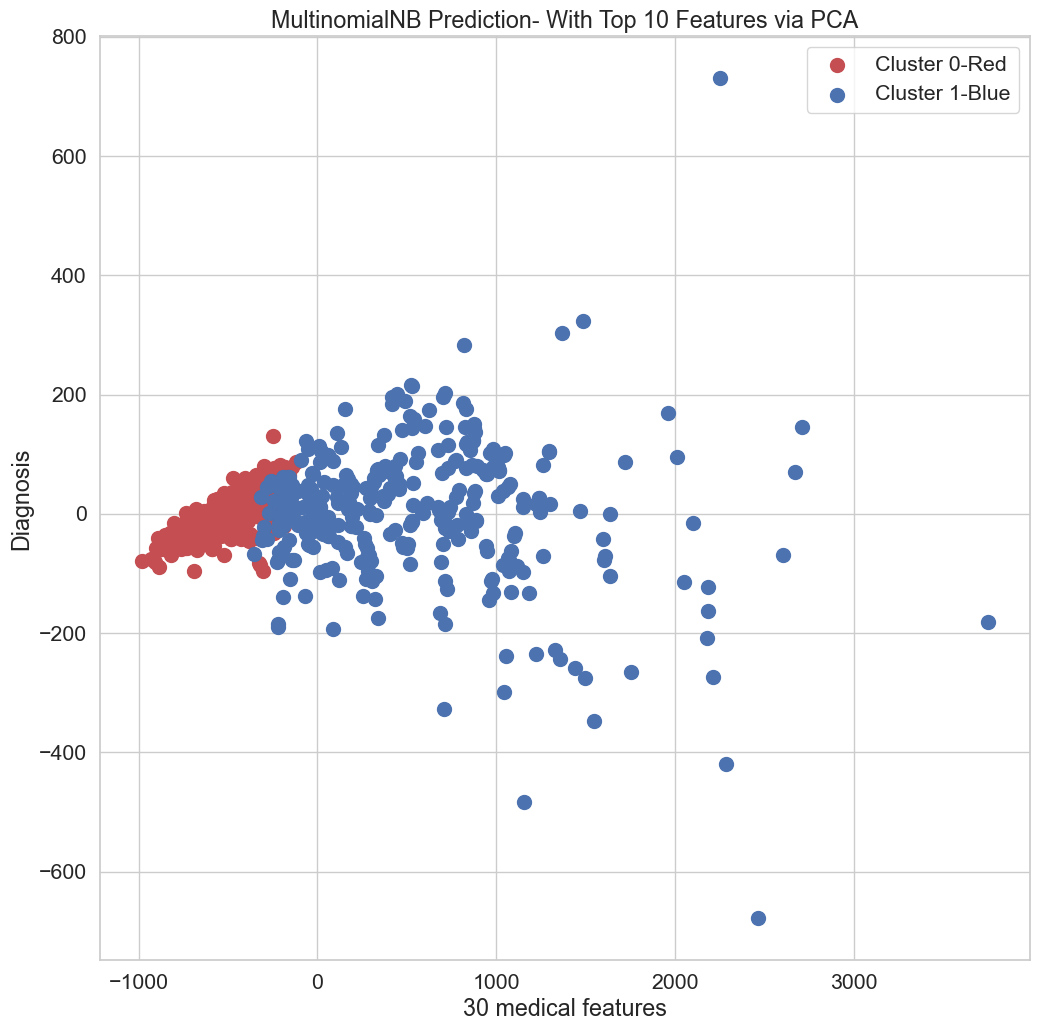

In [344]:
from sklearn.naive_bayes import MultinomialNB
MNB_pca10 = MultinomialNB()
MNB_pca10.fit(X_res_sc_minmax_pca10_train, Y_res_train) 
print (MNB_pca10)
MNB_pca10_pred = MNB_pca10.predict(minmax_pca10_x)
print("Confusion Matrix:\n", confusion_matrix(Y_res, MNB_pca10_pred))
print("Accuracy:", accuracy_score(Y_res, MNB_pca10_pred))
print("Classification Report:\n", classification_report(Y_res, MNB_pca10_pred, zero_division=0))
plt.scatter(PCA_X_10[MNB_pca10_pred == 0, 0], PCA_X_10[MNB_pca10_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X_10[MNB_pca10_pred == 1, 0], PCA_X_10[MNB_pca10_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("MultinomialNB Prediction- With Top 10 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()


ComplementNB()
[1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0

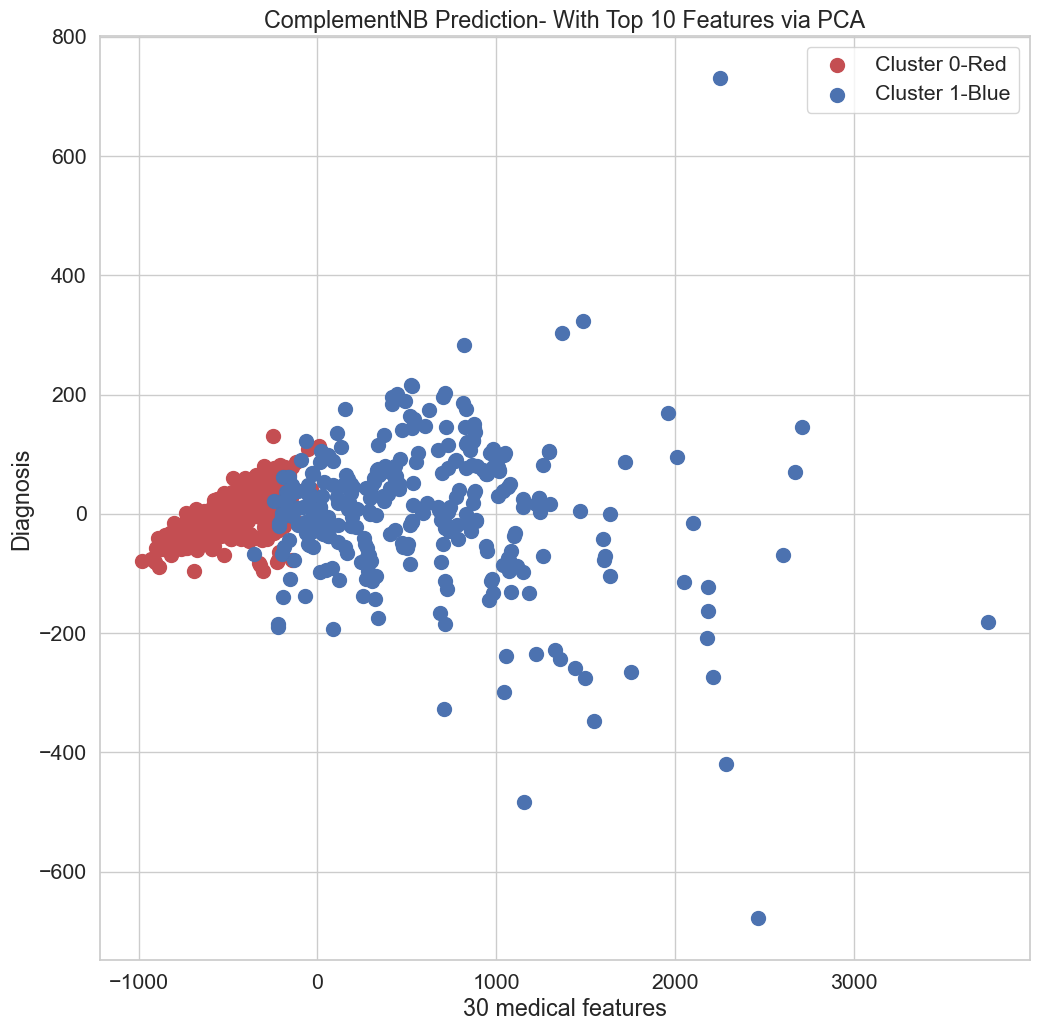

In [372]:
from sklearn.naive_bayes import ComplementNB
CNB_pca10 = ComplementNB()
CNB_pca10.fit(X_res_sc_minmax_pca10_train,Y_res_train)
print (CNB_pca10)
CNB_pca10_pred= CNB_pca10.predict(minmax_pca10_x)
print (CNB_pca10_pred)
print("Confusion Matrix:\n", confusion_matrix(Y_res, CNB_pca10_pred))
print("Accuracy:", accuracy_score(Y_res, CNB_pca10_pred))
print("Classification Report:\n", classification_report(Y_res, CNB_pca10_pred, zero_division=0))
plt.scatter(PCA_X_10[CNB_pca10_pred == 0, 0], PCA_X_10[CNB_pca10_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X_10[CNB_pca10_pred == 1, 0], PCA_X_10[CNB_pca10_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("ComplementNB Prediction- With Top 10 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()


CategoricalNB()
Confusion Matrix:
 [[357   0]
 [351   6]]
Accuracy: 0.5084033613445378
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       357
           1       1.00      0.02      0.03       357

    accuracy                           0.51       714
   macro avg       0.75      0.51      0.35       714
weighted avg       0.75      0.51      0.35       714



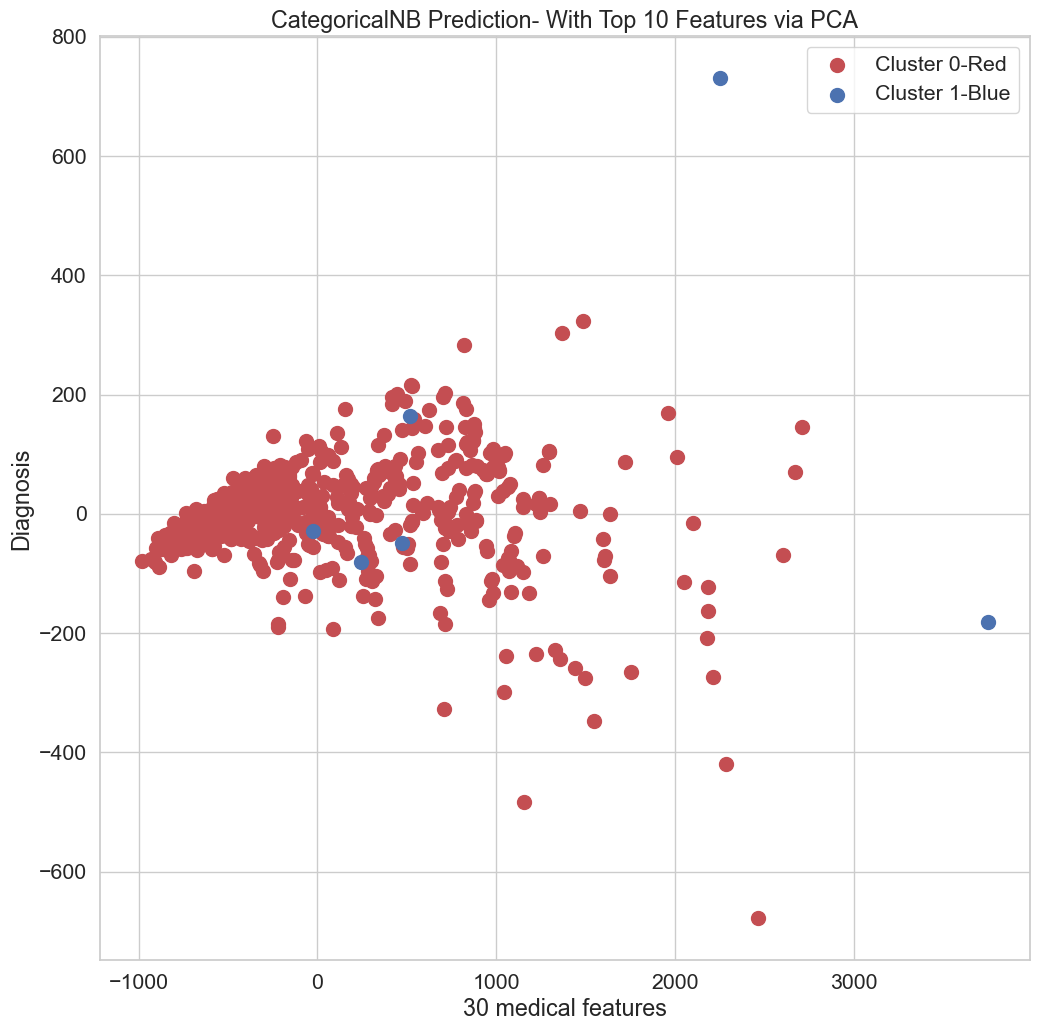

In [374]:
from sklearn.naive_bayes import CategoricalNB
CG_NB_pca10 = CategoricalNB()
CG_NB_pca10.fit(minmax_pca10_x,Y_res)
print (CG_NB_pca10)
CG_NB_pca10_pred = CG_NB_pca10.predict(minmax_pca10_x)
print("Confusion Matrix:\n", confusion_matrix(Y_res, CG_NB_pca10_pred))
print("Accuracy:", accuracy_score(Y_res, CG_NB_pca10_pred))
print("Classification Report:\n", classification_report(Y_res, CG_NB_pca10_pred, zero_division=0))
plt.scatter(PCA_X_10[CG_NB_pca10_pred == 0, 0], PCA_X_10[CG_NB_pca10_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X_10[CG_NB_pca10_pred == 1, 0], PCA_X_10[CG_NB_pca10_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("CategoricalNB Prediction- With Top 10 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()



In [347]:
#Set 6

In [376]:
pca15 = PCA(n_components = 15)
PCA_X_15 = pca15.fit_transform(X_res)
print (pd.DataFrame(PCA_X_15))


              0           1          2          3          4         5   \
0    1043.209458 -298.463598  50.250497  11.623086 -30.138360 -1.297199   
1    1152.880765   11.765281 -31.031953 -17.656309   2.107441  0.257173   
2     879.502223   35.386303   2.382204  -4.117797  -0.089985  2.631937   
3    -523.666391  -69.079135   8.737421  11.425329  -5.623498 -1.344968   
4     814.274346  185.622700   6.787884  -7.609230  -8.775739 -1.024990   
..           ...         ...        ...        ...        ...       ...   
709  -193.017820  -19.567826  -1.087566   1.349364  -6.806092  0.477824   
710   433.692815   80.822485  -2.201372  -2.504701  -3.814370  1.968403   
711   444.174320  200.189546 -23.560149  -5.144744   3.622811 -0.557249   
712   157.239797  -55.074722  -9.303897   2.727817  -3.143662  1.038134   
713  -435.249484  -15.910800   9.066628   1.244966   5.248397  0.387282   

           6         7         8         9         10        11        12  \
0   -1.148435  0.03473

In [377]:
print (pca15.explained_variance_ratio_)


[9.83374634e-01 1.51387549e-02 1.28654130e-03 1.13376862e-04
 7.59975448e-05 5.79759037e-06 3.57934853e-06 7.60505281e-07
 3.09950556e-07 1.54062171e-07 6.14951553e-08 1.49795847e-08
 6.13190061e-09 4.48448847e-09 2.80027849e-09]


In [378]:
PCA_X_15_train,PCA_X_15_test, y_15_train,y_15_test = train_test_split(PCA_X_15,Y_res,test_size=0.2,random_state=42)
print (PCA_X_15.shape)
print (PCA_X_15_train.shape)
print (PCA_X_15_test.shape)


(714, 15)
(571, 15)
(143, 15)


In [379]:
print (pd.DataFrame(PCA_X_15_train))

              0           1          2          3         4         5   \
0     500.868750  -57.460242 -26.797255   0.194893  0.582561 -0.317430   
1    1225.452613 -235.365720  -8.117779  -6.743114 -3.010645  1.958978   
2    -380.054895  -44.643941   5.234086   0.990064 -1.901443  0.245984   
3     532.490029  143.205301  34.433073  13.945247 -3.432700  1.068186   
4    -484.896143    2.769550  -9.790579  -7.968501 -4.947738 -0.305964   
..           ...         ...        ...        ...       ...       ...   
566  -841.133459  -43.595341  26.558701 -11.800812 -1.866280  0.047812   
567  -550.253057  -22.811324   4.792509   1.453803  3.257223 -0.557649   
568  -297.061761   80.850905 -17.737265  -8.045443 -0.415289  1.016518   
569  -155.499262  -43.594628 -19.005407   7.096207 -1.146885 -1.846355   
570  -504.364009    3.030319  -3.355205   0.289452  9.003707 -0.222009   

           6         7         8         9         10        11        12  \
0    0.897179 -0.405104  0.445989 

In [353]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (PCA_X_15_train, y_15_train ,'Random Forest',RandomForestClassifier(), param, cv =10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1]
Best Params : {'n_estimators': 2000}
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.90      0.94      0.92        47

    accuracy                           0.93       115
   macro avg       0.93      0.93      0.93       115
weighted avg       0.93      0.93      0.93       115

Accuracy Score 0.9304347826086956
Confusion Matrix :
 [[63  5]
 [ 3 44]]


In [354]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (PCA_X_15_train, y_15_train,'SVC',SVC(), param, cv =10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1]
Best Params : {'C': 1, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96        68
           1       0.96      0.94      0.95        47

    accuracy                           0.96       115
   macro avg       0.96      0.95      0.95       115
weighted avg       0.96      0.96      0.96       115

Accuracy Score 0.9565217391304348
Confusion Matrix :
 [[66  2]
 [ 3 44]]


In [355]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (PCA_X_15_train, y_15_train,'XGBoost', XGBClassifier(),param, cv = 10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 1 1]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.92      0.94      0.93        47

    accuracy                           0.94       115
   macro avg       0.94      0.94      0.94       115
weighted avg       0.94      0.94      0.94       115

Accuracy Score 0.9391304347826087
Confusion Matrix :
 [[64  4]
 [ 3 44]]


In [380]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_sc_pca15 = sc_x.fit_transform(PCA_X_15)
print (x_sc_pca15)


[[ 1.50572326 -3.47199776  2.0052182  ...  0.73246967  1.31165787
   0.6658032 ]
 [ 1.66401806  0.13686436 -1.23831287 ...  0.82439176 -0.14064391
  -0.71419821]
 [ 1.26943534  0.41164539  0.09506053 ...  1.57467893  0.41944104
   0.77290527]
 ...
 [ 0.64110194  2.32878535 -0.94015468 ...  0.14502054  0.47131967
  -0.49128303]
 [ 0.2269531  -0.64067884 -0.37126686 ... -1.40079369  0.14526632
  -1.00332816]
 [-0.62822022 -0.18508878  0.36179874 ... -0.86904467 -0.02962294
   0.30177484]]


In [381]:
x_sc_pca15_train, x_sc_pca15_test, Y_res_train, Y_res_test = train_test_split (x_sc_pca15,Y_res,test_size = 0.2)

Confusion Matrix:
 [[331  26]
 [ 50 307]]
Accuracy: 0.8935574229691877
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       357
           1       0.92      0.86      0.89       357

    accuracy                           0.89       714
   macro avg       0.90      0.89      0.89       714
weighted avg       0.90      0.89      0.89       714



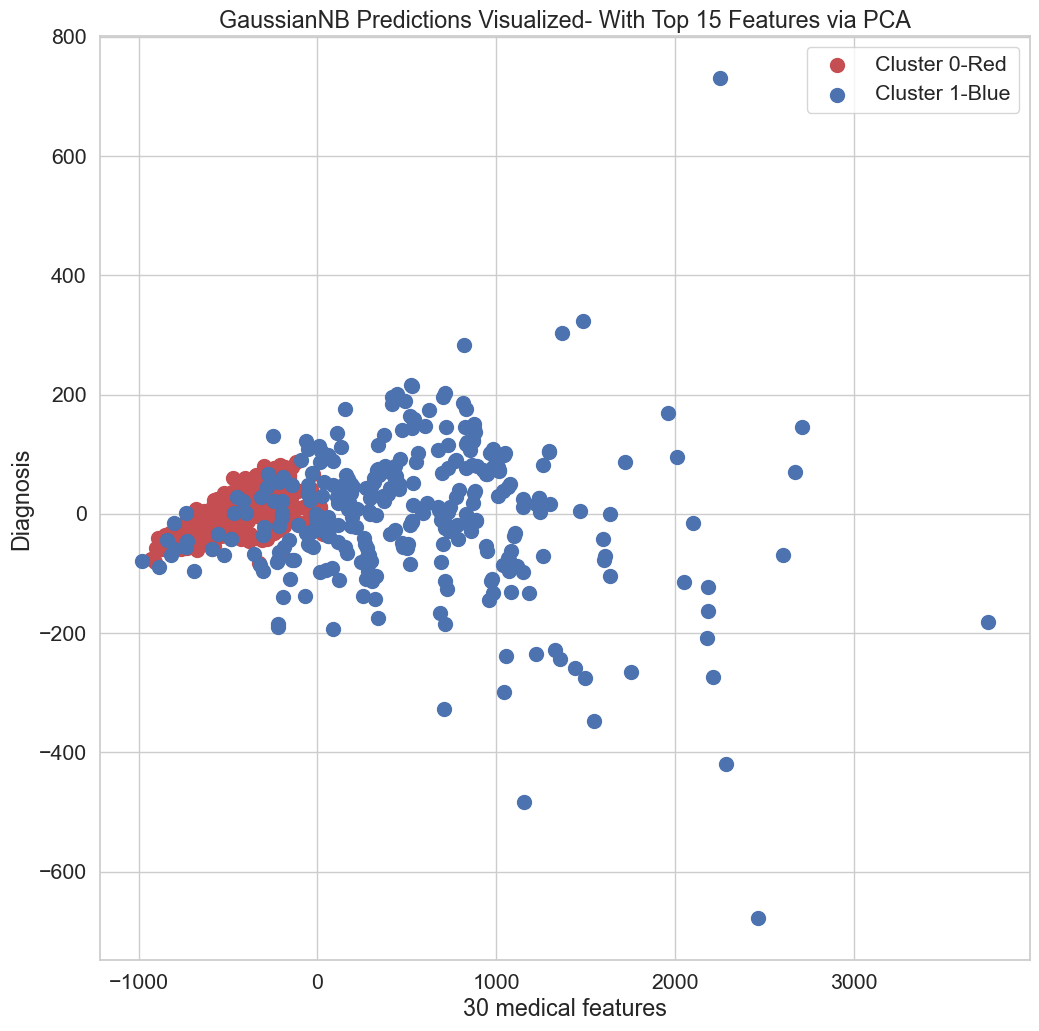

In [382]:
from sklearn.naive_bayes import GaussianNB
GNB_pca15 = GaussianNB()
GNB_pca15.fit(x_sc_pca15_train, Y_res_train)
GNB_pca15_pred = GNB_pca15.predict(x_sc_pca15)
print("Confusion Matrix:\n", confusion_matrix(Y_res, GNB_pca15_pred))
print("Accuracy:", accuracy_score(Y_res, GNB_pca15_pred))
print("Classification Report:\n", classification_report(Y_res, GNB_pca15_pred, zero_division=0))
plt.scatter(PCA_X_15[GNB_pca15_pred == 0, 0], PCA_X_15[GNB_pca15_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X_15[GNB_pca15_pred == 1, 0], PCA_X_15[GNB_pca15_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("GaussianNB Predictions Visualized- With Top 15 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()



Confusion Matrix:
 [[345  12]
 [ 49 308]]
Accuracy: 0.9145658263305322
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       357
           1       0.96      0.86      0.91       357

    accuracy                           0.91       714
   macro avg       0.92      0.91      0.91       714
weighted avg       0.92      0.91      0.91       714



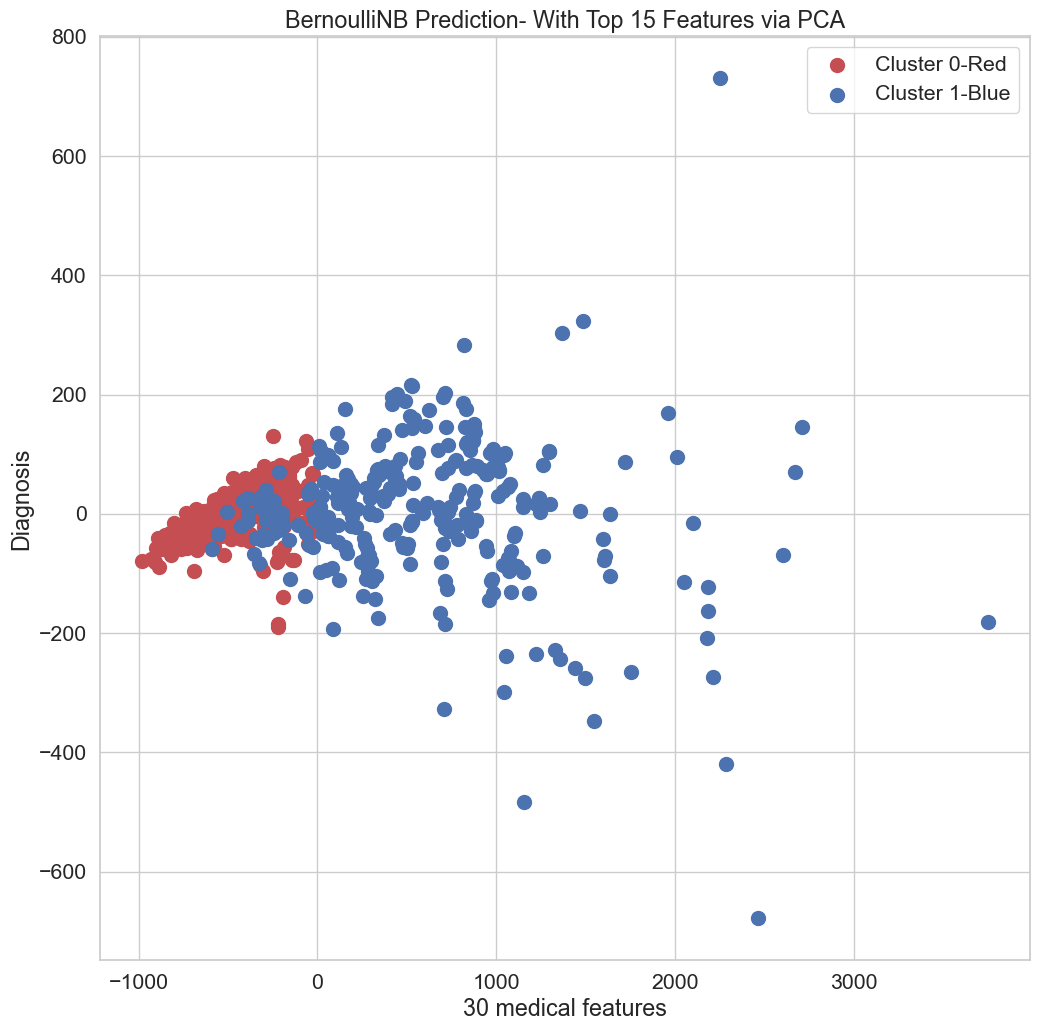

In [383]:
from sklearn.naive_bayes import BernoulliNB
BNB_pca15 = BernoulliNB()
BNB_pca15.fit(x_sc_pca15_train, Y_res_train) 
BNB_pca15_pred = BNB_pca15.predict(x_sc_pca15)
print("Confusion Matrix:\n", confusion_matrix(Y_res, BNB_pca15_pred))
print("Accuracy:", accuracy_score(Y_res, BNB_pca15_pred))
print("Classification Report:\n", classification_report(Y_res, BNB_pca15_pred, zero_division=0))
plt.scatter(PCA_X_15[BNB_pca15_pred == 0, 0], PCA_X_15[BNB_pca15_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X_15[BNB_pca15_pred == 1, 0], PCA_X_15[BNB_pca15_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("BernoulliNB Prediction- With Top 15 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()


In [384]:
from sklearn.preprocessing import MinMaxScaler
minmax_pca15_x= MinMaxScaler()
minmax_pca15_x = minmax_pca15_x.fit_transform(x_sc_pca15)
print (minmax_pca15_x)


[[0.42770668 0.26945866 0.25450594 ... 0.508519   0.59349874 0.65350064]
 [0.45089526 0.48974815 0.06230777 ... 0.51702516 0.40706407 0.54696155]
 [0.3930929  0.50652113 0.14131794 ... 0.58645425 0.47896321 0.66176915]
 ...
 [0.30104843 0.62354577 0.07997539 ... 0.4541584  0.48562297 0.56417108]
 [0.24037983 0.44228593 0.11368531 ... 0.31111387 0.44376689 0.52464009]
 [0.11510562 0.47009573 0.15712373 ... 0.36032017 0.42131603 0.62539686]]


In [385]:
X_res_sc_minmax_pca15_train, X_res_sc_minmax_pca15_test, Y_res_train, Y_res_test = train_test_split (minmax_pca15_x,Y_res,test_size = 0.2)


MultinomialNB()
Confusion Matrix:
 [[356   1]
 [ 92 265]]
Accuracy: 0.8697478991596639
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       357
           1       1.00      0.74      0.85       357

    accuracy                           0.87       714
   macro avg       0.90      0.87      0.87       714
weighted avg       0.90      0.87      0.87       714



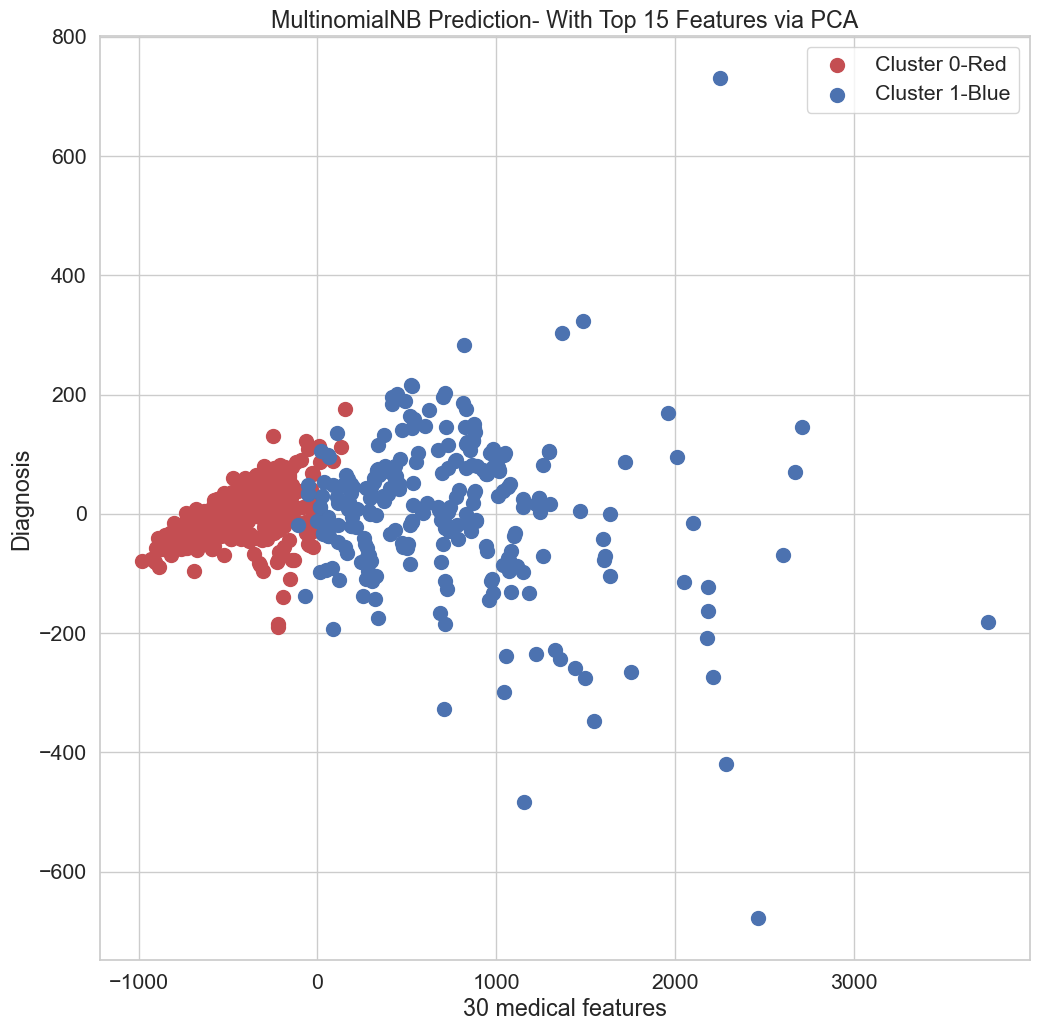

In [386]:
from sklearn.naive_bayes import MultinomialNB
MNB_pca15 = MultinomialNB()
MNB_pca15.fit(X_res_sc_minmax_pca15_train, Y_res_train) 
print (MNB_pca15)
MNB_pca15_pred = MNB_pca15.predict(minmax_pca15_x)
print("Confusion Matrix:\n", confusion_matrix(Y_res, MNB_pca15_pred))
print("Accuracy:", accuracy_score(Y_res, MNB_pca15_pred))
print("Classification Report:\n", classification_report(Y_res, MNB_pca15_pred, zero_division=0))
plt.scatter(PCA_X_15[MNB_pca15_pred == 0, 0], PCA_X_15[MNB_pca15_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X_15[MNB_pca15_pred == 1, 0], PCA_X_15[MNB_pca15_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("MultinomialNB Prediction- With Top 15 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()


ComplementNB()
[1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0

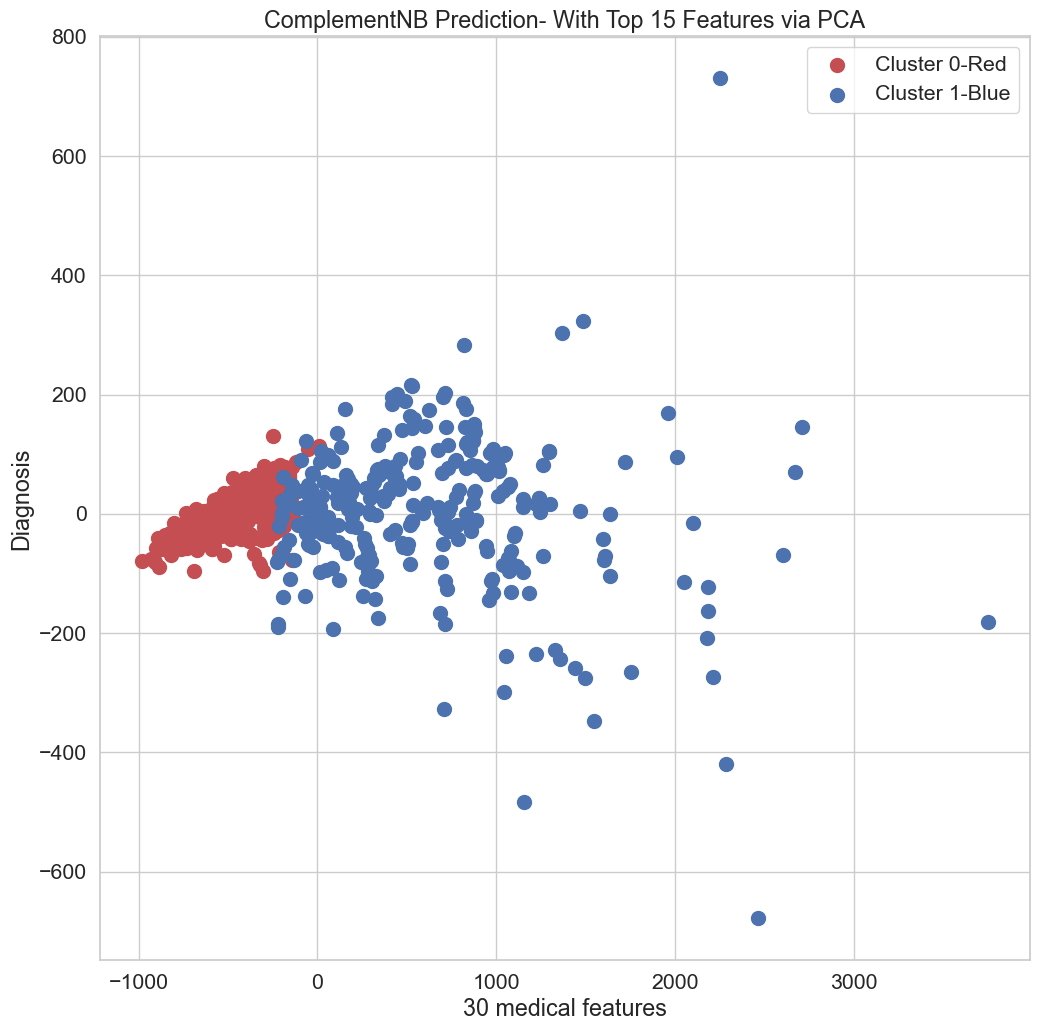

In [388]:
from sklearn.naive_bayes import ComplementNB
CNB_pca15 = ComplementNB()
CNB_pca15.fit(X_res_sc_minmax_pca15_train,Y_res_train)
print (CNB_pca15)
CNB_pca15_pred= CNB_pca15.predict(minmax_pca15_x)
print (CNB_pca15_pred)
print("Confusion Matrix:\n", confusion_matrix(Y_res, CNB_pca15_pred))
print("Accuracy:", accuracy_score(Y_res, CNB_pca15_pred))
print("Classification Report:\n", classification_report(Y_res, CNB_pca15_pred, zero_division=0))
plt.scatter(PCA_X_15[CNB_pca15_pred == 0, 0], PCA_X_15[CNB_pca15_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X_15[CNB_pca15_pred == 1, 0], PCA_X_15[CNB_pca15_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("ComplementNB Prediction- With Top 15 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()



CategoricalNB()
Confusion Matrix:
 [[357   0]
 [350   7]]
Accuracy: 0.5098039215686274
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       357
           1       1.00      0.02      0.04       357

    accuracy                           0.51       714
   macro avg       0.75      0.51      0.35       714
weighted avg       0.75      0.51      0.35       714



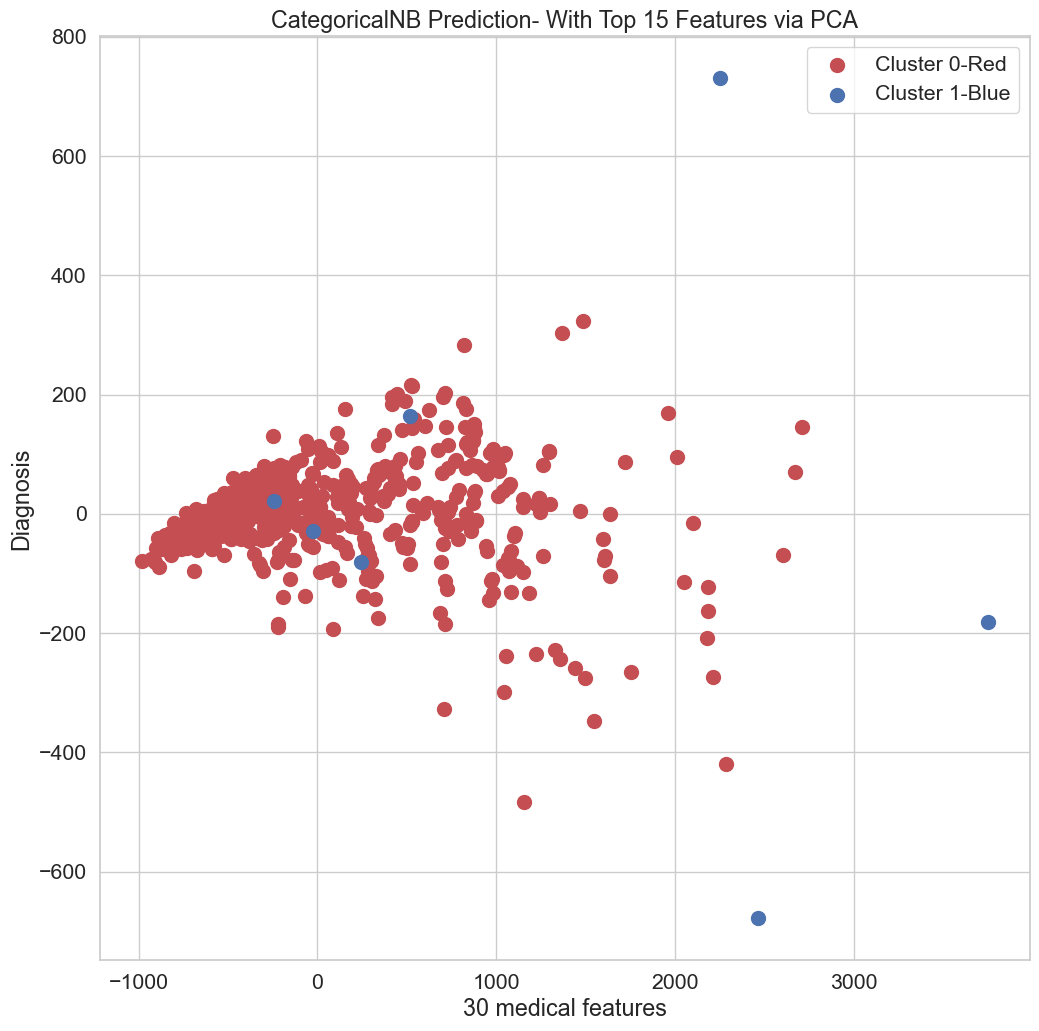

In [389]:
from sklearn.naive_bayes import CategoricalNB
CG_NB_pca15 = CategoricalNB()
CG_NB_pca15.fit(minmax_pca15_x,Y_res)
print (CG_NB_pca15)
CG_NB_pca15_pred = CG_NB_pca15.predict(minmax_pca15_x)
print("Confusion Matrix:\n", confusion_matrix(Y_res, CG_NB_pca15_pred))
print("Accuracy:", accuracy_score(Y_res, CG_NB_pca15_pred))
print("Classification Report:\n", classification_report(Y_res, CG_NB_pca15_pred, zero_division=0))
plt.scatter(PCA_X_15[CG_NB_pca15_pred == 0, 0], PCA_X_15[CG_NB_pca15_pred == 0, 1], s=100, c='r', label='Cluster 0-Red')
plt.scatter(PCA_X_15[CG_NB_pca15_pred == 1, 0], PCA_X_15[CG_NB_pca15_pred == 1, 1], s=100, c='b', label='Cluster 1-Blue')
plt.title("CategoricalNB Prediction- With Top 15 Features via PCA")
plt.xlabel("30 medical features")
plt.ylabel("Diagnosis")
plt.legend(loc='upper right')
plt.show()


In [ ]:
- Set 1- Random Forest, XGBoost and SVM consistently achieved the highest accuracy (often mid-90s% or better) on the breast‐cancer data, whereas all Naive Bayes variants (GaussianNB, BernoulliNB, MultinomialNB, etc.) lagged noticeably behind
- Set 2- Oversampling the minority class with SMOTE (Set 2) uniformly improved accuracy for all classifiers, with tree‐based models gaining the most – for example, RF accuracy jumped from ≈98% to ≈99% under SMOTE, SVM also shot from 93% to 96% while Naive Bayes saw only marginal gains. GaussianNB and BernoulliNB drastically decreased due to over sampling in terms of accuracy.
- Set 3- Selecting the top 15 features (Set 3) preserved most of the performance of RF/XGBoost/SVM with little loss.
- Set 4- Very aggressive but systematic dimensionality reduction using PCA with n = 3 was the extremely beneficial for Naive Bayes variants and SVM.
- Set 5 & 6- Moderate PCA reductions (Sets 5–6, using 10–15 components) retained most accuracy: SVM and XGBoost remained the most accurate among other even with fewer components, whereas Naive Bayes models – which assume feature independence – even though did show slighly better accuracies among each other, continued to perform worst in comparasion to RF, XG Boost and SVM.

Overall, In this Cancer Prediction Project, XGBoost (often with SMOTE) proved most effective with 99% accuracy in set 2 and set 3, followed by Random Forest (99% accuracy in set 2) and SVM (almost 97% accuracy in set 4). The various Naive Bayes variants were more accurate with PCA strategies while GaussianNB (94% accuracy in set 1) and BernoulliNB (94% accuracy in set 1) were most accurate in set 1.